# Steps
---
1. Data feature gathering
2. Understading data Dristribution
3. Oversampeling data target
4. standarize the data
5. Train model to predict normal or abnormal
6. K-mean clusterin to classifiy the model find types of abnormal
7. Pickel files 


---
# Machine Learning
---

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [68]:
dataset_org = pd.read_csv('./dataset/processed_data/pump_all.csv.xz')
dataset_org.head()

,Unnamed: 0,dataset,machine,SNR,machine_id,wavefile,is_normal,T_rms_mean,T_rms_std,T_zcr_mean,...,F_mfcc_mean,F_mfcc_std,F_flatness_mean,F_flatness_std,F_bandwidth_mean,F_bandwidth_std,F_contrast_mean,F_contrast_std,F_rolloff_mean,F_rolloff_std
0,0,0_dB_pump.zip,pump,0,0,<ZipInfo filename='pump/id_00/abnormal/0000000...,0,0.012497,0.005714,0.103556,...,0.415885,2.155657,0.029981,0.015729,1610.933357,151.745597,15.943189,3.897573,2974.540735,559.438575
1,1,0_dB_pump.zip,pump,0,0,<ZipInfo filename='pump/id_00/abnormal/0000000...,0,0.012792,0.005098,0.126817,...,0.368102,2.164471,0.062612,0.057969,1796.437902,251.053851,15.520992,3.845788,3682.333267,941.671955
2,2,0_dB_pump.zip,pump,0,0,<ZipInfo filename='pump/id_00/abnormal/0000000...,0,0.011871,0.003497,0.100751,...,0.707360,1.867119,0.030634,0.015412,1607.281122,135.964807,15.264451,3.367889,2970.297524,455.254023
3,3,0_dB_pump.zip,pump,0,0,<ZipInfo filename='pump/id_00/abnormal/0000000...,0,0.012309,0.005092,0.098201,...,0.752885,1.992444,0.029826,0.015724,1601.738958,154.796347,15.358550,3.592435,2939.496805,502.969920
4,4,0_dB_pump.zip,pump,0,0,<ZipInfo filename='pump/id_00/abnormal/0000000...,0,0.013240,0.004242,0.098981,...,0.707843,2.147740,0.028244,0.015744,1568.230910,129.651706,15.120233,3.263704,2861.396765,434.689661


In [69]:
dataset_org.columns[5:]

Index(['wavefile', 'is_normal', 'T_rms_mean', 'T_rms_std', 'T_zcr_mean',
       'T_zcr_std', 'F_mel_mean', 'F_mel_std', 'F_mel_rms_mean',
       'F_mel_rms_std', 'F_mfcc_mean', 'F_mfcc_std', 'F_flatness_mean',
       'F_flatness_std', 'F_bandwidth_mean', 'F_bandwidth_std',
       'F_contrast_mean', 'F_contrast_std', 'F_rolloff_mean', 'F_rolloff_std'],
      dtype='object')

In [70]:
dataset = dataset_org.iloc[:,5:].copy()
dataset.head()

,wavefile,is_normal,T_rms_mean,T_rms_std,T_zcr_mean,T_zcr_std,F_mel_mean,F_mel_std,F_mel_rms_mean,F_mel_rms_std,F_mfcc_mean,F_mfcc_std,F_flatness_mean,F_flatness_std,F_bandwidth_mean,F_bandwidth_std,F_contrast_mean,F_contrast_std,F_rolloff_mean,F_rolloff_std
0,<ZipInfo filename='pump/id_00/abnormal/0000000...,0,0.012497,0.005714,0.103556,0.103556,0.038337,0.061072,0.007550,0.003713,0.415885,2.155657,0.029981,0.015729,1610.933357,151.745597,15.943189,3.897573,2974.540735,559.438575
1,<ZipInfo filename='pump/id_00/abnormal/0000000...,0,0.012792,0.005098,0.126817,0.126817,0.040090,0.059717,0.007731,0.003367,0.368102,2.164471,0.062612,0.057969,1796.437902,251.053851,15.520992,3.845788,3682.333267,941.671955
2,<ZipInfo filename='pump/id_00/abnormal/0000000...,0,0.011871,0.003497,0.100751,0.100751,0.038190,0.052424,0.007174,0.002440,0.707360,1.867119,0.030634,0.015412,1607.281122,135.964807,15.264451,3.367889,2970.297524,455.254023
3,<ZipInfo filename='pump/id_00/abnormal/0000000...,0,0.012309,0.005092,0.098201,0.098201,0.039015,0.057805,0.007455,0.003315,0.752885,1.992444,0.029826,0.015724,1601.738958,154.796347,15.358550,3.592435,2939.496805,502.969920
4,<ZipInfo filename='pump/id_00/abnormal/0000000...,0,0.013240,0.004242,0.098981,0.098981,0.042505,0.059668,0.008016,0.002878,0.707843,2.147740,0.028244,0.015744,1568.230910,129.651706,15.120233,3.263704,2861.396765,434.689661


## Analysis missing data

,Column Name,Missing Count,Missing data %
0,wavefile,0,0.0
1,is_normal,0,0.0
2,F_rolloff_mean,0,0.0
3,F_contrast_std,0,0.0
4,F_contrast_mean,0,0.0
5,F_bandwidth_std,0,0.0
6,F_bandwidth_mean,0,0.0
7,F_flatness_std,0,0.0
8,F_flatness_mean,0,0.0
9,F_mfcc_std,0,0.0


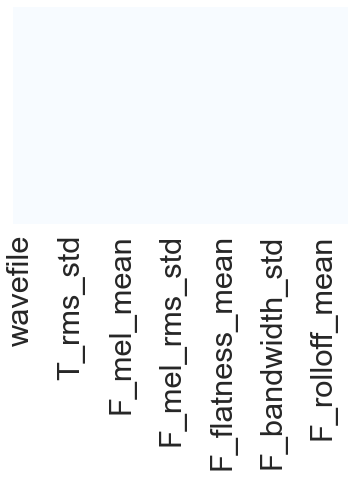

In [71]:
sn.heatmap(dataset.isnull(), yticklabels= False, cbar= False, cmap= 'Blues');

missing_df = dataset.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Count']

# % of data present out of total
missing_df['Missing data %'] = round(missing_df['Missing Count'] / dataset.shape[0] * 100, 2)
missing_df = missing_df.sort_values('Missing data %',ascending=False).reset_index(drop = True)
missing_df

# Analysing data Distributions and majorities

In [72]:
column_headers = dataset.columns
feature_col = dataset.shape[1]
plt_col = 4
plt_row = (len(column_headers)/plt_col) + 1

fig = plt.figure(figsize=(20, 15))
plt.suptitle('Subtitle for diagram', fontsize=20)

for i in range(feature_col):
    plt.subplot(plt_row, plt_col, i + 1)
    f = plt.gca()
    f.set_title(dataset.columns.values[i])

    vals = np.size(dataset.iloc[:, i].unique())
    
    # This help ploting process easier
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset.iloc[:, i], bins=vals, color='#3F5D7D');
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A23CF8FD30> (for post_execute):


KeyboardInterrupt: 

In [ ]:
corr = dataset.corr()
sn.set(font_scale=2.8) 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (50,40))
sn.heatmap(corr, annot=True,mask=mask);

## Funnel the dataset 

In [73]:
important_col =['is_normal', 'T_rms_mean', 'T_rms_std', 'T_zcr_mean',
               'F_mel_mean', 'F_mel_std', 'F_mel_rms_mean', 'F_mel_rms_std',
               'F_mfcc_mean', 'F_mfcc_std', 'F_flatness_mean',
               'F_bandwidth_mean', 'F_bandwidth_std', 'F_contrast_mean',
               'F_rolloff_mean', 'F_rolloff_std']
dataset = dataset_org[important_col]

## Split data

In [74]:
X = dataset.drop("is_normal", axis=1)
y = dataset["is_normal"]

from sklearn.model_selection import train_test_split

X_model, X_val, y_model, y_val  = train_test_split(X, y, test_size=0.1, random_state=1) # 0.25 x 0.8 = 0.2

In [75]:
print(X_model.shape)
print(y_model.shape)

(11353, 15)
(11353,)


## Resample over sample

In [76]:
from imblearn.over_sampling import BorderlineSMOTE
X_resample, y_resample = BorderlineSMOTE().fit_resample(X_model, y_model.ravel())

y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=1)

## Feature Scaling 

In [78]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
# reassingn index and columns
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train_scaled = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test_scaled = X_test2

## Data visualization after feature manupulation

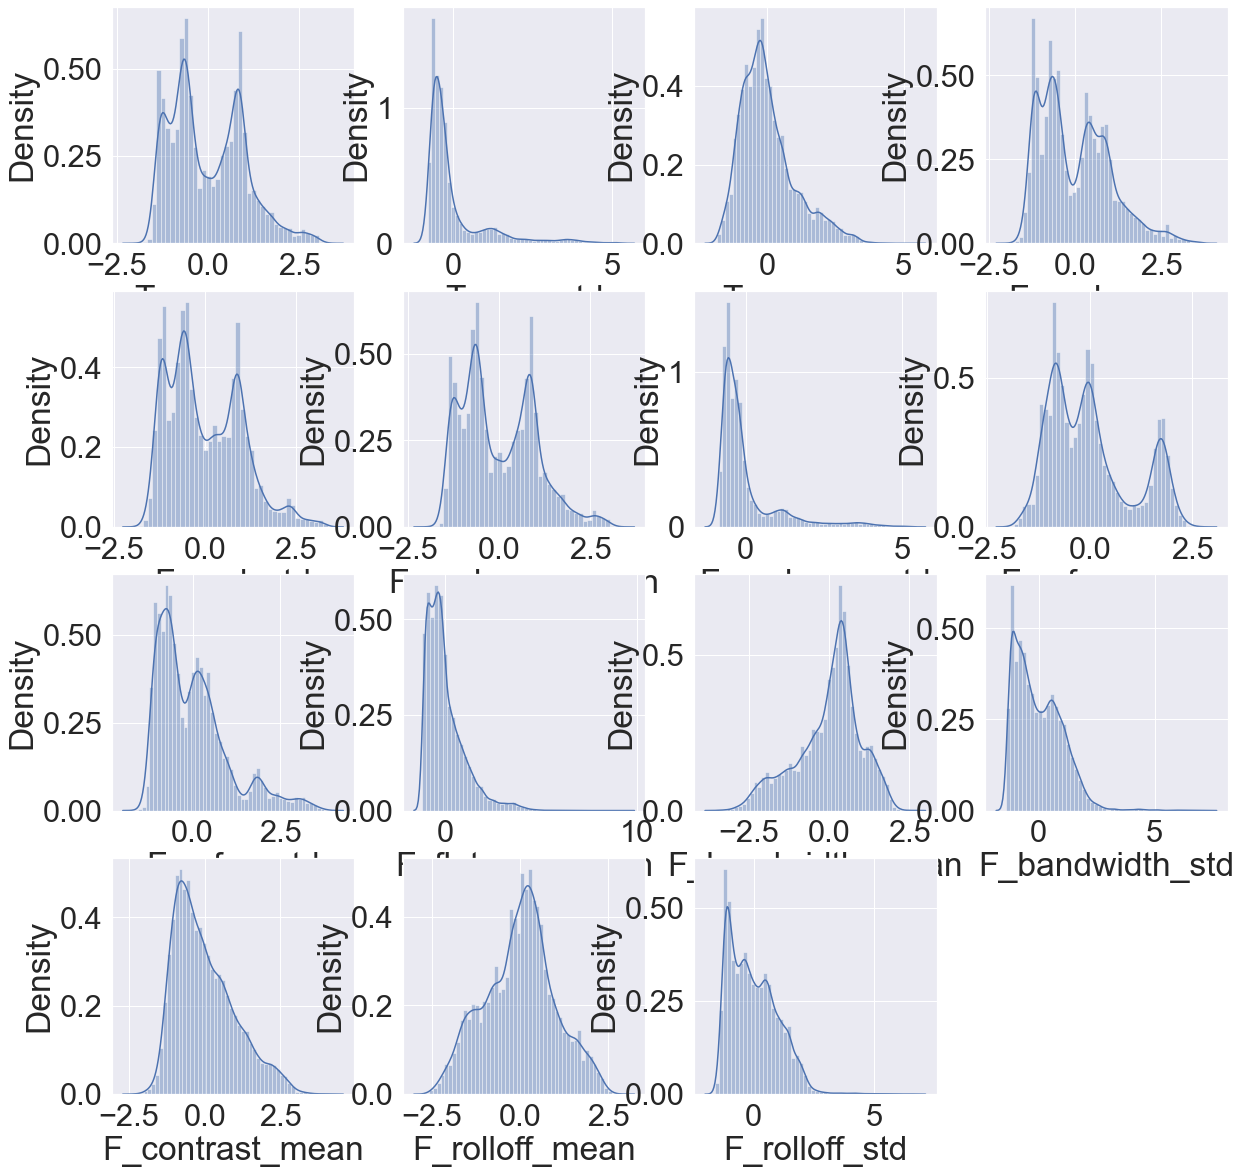

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

column_headers = X_train_scaled.columns
plt_col = 4
plt_row = int(len(column_headers)/plt_col) + 1 

i = 1
fig, ax = plt.subplots(2, plt_col, figsize = (20, 20))

for column_header in column_headers:
    plt.subplot(plt_row,plt_col,i)
    sn.distplot(X_train_scaled[column_header])
    i = i + 1

In [ ]:
sn.pairplot(dataset, hue="is_normal");

## Standarized the data point

In [ ]:
## Correlation every feature

corr = X_train_scaled.corr()
sn.set(font_scale=2.8)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (50,40))
sn.heatmap(corr, annot=True,mask=mask);

## Function to check perfomance

In [79]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

def perfomance_check(name: str):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='positive',
                                           average='micro')
    rec = recall_score(y_test, y_pred, pos_label='positive',
                                           average='micro')
    f1 = f1_score(y_test, y_pred, pos_label='positive',
                                           average='micro')

    model_results = pd.DataFrame([[name, acc, prec, rec, f1]],
                   columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    return results.append(model_results, ignore_index = True)

def class_report(y_test, y_pred):

    # This is the script to compare result with prediction
    comparision = pd.DataFrame(columns = ['Result', 'Prediction'])
    
    if type(y_pred) == list:
        comparision.Prediction = y_pred

    else:
        try:
            comparision.Prediction = y_pred.tolist() #pd.Series(y_pred)
        except:
            comparision.Prediction = pd.Series(y_pred.reshape(len(y_pred),))
    comparision.Result = pd.Series(y_test.values.reshape(len(y_test),))
    
    target_names = []
    for i in y.unique():
        target_names.append(f"class {i}")
    y_true = comparision.Result.tolist()
    y_pred = comparision.Prediction.tolist()
    print(classification_report(y_true, y_pred, target_names=target_names))

results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

## Logical Regression (Default)

In [80]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0)
LR_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = LR_classifier.predict(X_test_scaled)

results = perfomance_check('Logical Regression (Default)')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 0       0.82      0.81      0.82      1977
     class 1       0.82      0.83      0.83      2073

    accuracy                           0.82      4050
   macro avg       0.82      0.82      0.82      4050
weighted avg       0.82      0.82      0.82      4050



## Logical Regression

In [81]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0, penalty = 'l1', solver='saga')
LR_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = LR_classifier.predict(X_test_scaled)

results = perfomance_check('Logical Regression (Lasso)')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 0       0.82      0.82      0.82      1977
     class 1       0.83      0.83      0.83      2073

    accuracy                           0.82      4050
   macro avg       0.82      0.82      0.82      4050
weighted avg       0.82      0.82      0.82      4050



## KNN (K-Nearest Neighbours)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
no_neighbor = 5
for i in range(2,no_neighbor+1):
    KNN_classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
    KNN_classifier.fit(X_train_scaled, y_train.values.ravel())

    y_pred = KNN_classifier.predict(X_test_scaled)

    results = perfomance_check(f'K-Nearest Neighbours {i}')
    
    class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 0       0.93      0.99      0.96      1977
     class 1       0.99      0.93      0.96      2073

    accuracy                           0.96      4050
   macro avg       0.96      0.96      0.96      4050
weighted avg       0.96      0.96      0.96      4050

              precision    recall  f1-score   support

     class 0       0.94      0.98      0.96      1977
     class 1       0.98      0.95      0.96      2073

    accuracy                           0.96      4050
   macro avg       0.96      0.96      0.96      4050
weighted avg       0.96      0.96      0.96      4050

              precision    recall  f1-score   support

     class 0       0.93      0.98      0.96      1977
     class 1       0.98      0.93      0.96      2073

    accuracy                           0.96      4050
   macro avg       0.96      0.96      0.96      4050
weighted avg       0.96      0.96      0.96      4050

              preci

## SVM

from sklearn.svm import SVC
SVML_classifier = SVC(random_state = 0, kernel = 'linear')
SVML_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = SVML_classifier.predict(X_test_scaled)

results = perfomance_check('SVM (Linear)')

class_report(y_pred)

## Kernal SVM

In [83]:
from sklearn.svm import SVC
K_SVM_classifier = SVC(random_state=0, kernel = 'rbf')
K_SVM_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = K_SVM_classifier.predict(X_test_scaled)

results = perfomance_check('SVM (RBF)')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 0       0.91      0.92      0.91      1977
     class 1       0.92      0.91      0.92      2073

    accuracy                           0.91      4050
   macro avg       0.91      0.91      0.91      4050
weighted avg       0.91      0.91      0.91      4050



## Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train.values.ravel())

y_pred = NB_classifier.predict(X_test_scaled)

results = perfomance_check('Naive Bayes')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 0       0.88      0.25      0.39      1977
     class 1       0.58      0.97      0.72      2073

    accuracy                           0.62      4050
   macro avg       0.73      0.61      0.56      4050
weighted avg       0.72      0.62      0.56      4050



## Decision Tree Classification

In [85]:
from sklearn.tree import DecisionTreeClassifier
DTC_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTC_classifier.fit(X_train, y_train.values.ravel())

y_pred = DTC_classifier.predict(X_test)

results = perfomance_check('Decision Tree Classification')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 0       0.92      0.94      0.93      1977
     class 1       0.94      0.92      0.93      2073

    accuracy                           0.93      4050
   macro avg       0.93      0.93      0.93      4050
weighted avg       0.93      0.93      0.93      4050



## Random Forest Classification

In [86]:
from sklearn.ensemble import RandomForestClassifier

no_estimators = 100

RF_classifier = RandomForestClassifier(random_state = 0, n_estimators = no_estimators, criterion = 'entropy')
RF_classifier.fit(X_train, y_train.values.ravel())
y_pred = RF_classifier.predict(X_test)

results = perfomance_check(f'Random Forest (n={no_estimators})')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 0       0.96      0.97      0.96      1977
     class 1       0.97      0.96      0.97      2073

    accuracy                           0.96      4050
   macro avg       0.96      0.96      0.96      4050
weighted avg       0.96      0.96      0.96      4050



## XGBoost Classifier

In [87]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train.values.ravel())

y_pred = xgb_classifier.predict(X_test)

results = perfomance_check('XGBoost ')

class_report(y_test, y_pred)

[10:38:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

     class 0       0.96      0.97      0.97      1977
     class 1       0.97      0.96      0.97      2073

    accuracy                           0.97      4050
   macro avg       0.97      0.97      0.97      4050
weighted avg       0.97      0.97      0.97      4050



## CatBoost Classifier

In [88]:
from catboost import CatBoostClassifier
CB_classifier = CatBoostClassifier()
CB_classifier.fit(X_train, y_train.values.ravel())

y_pred = CB_classifier.predict(X_test)

results = perfomance_check('CatBoost')

class_report(y_test, y_pred)

Learning rate set to 0.033837
0:	learn: 0.6687483	total: 25.2ms	remaining: 25.2s
1:	learn: 0.6469997	total: 40.7ms	remaining: 20.3s
2:	learn: 0.6271219	total: 54.2ms	remaining: 18s
3:	learn: 0.6073807	total: 67.4ms	remaining: 16.8s
4:	learn: 0.5902676	total: 80.9ms	remaining: 16.1s
5:	learn: 0.5743098	total: 93.6ms	remaining: 15.5s
6:	learn: 0.5591514	total: 108ms	remaining: 15.3s
7:	learn: 0.5461361	total: 121ms	remaining: 15s
8:	learn: 0.5348361	total: 135ms	remaining: 14.8s
9:	learn: 0.5239730	total: 152ms	remaining: 15s
10:	learn: 0.5137723	total: 169ms	remaining: 15.2s
11:	learn: 0.5035976	total: 183ms	remaining: 15.1s
12:	learn: 0.4924968	total: 198ms	remaining: 15.1s
13:	learn: 0.4833518	total: 217ms	remaining: 15.3s
14:	learn: 0.4750003	total: 231ms	remaining: 15.2s
15:	learn: 0.4657088	total: 254ms	remaining: 15.6s
16:	learn: 0.4578207	total: 268ms	remaining: 15.5s
17:	learn: 0.4506744	total: 281ms	remaining: 15.3s
18:	learn: 0.4431714	total: 300ms	remaining: 15.5s
19:	learn: 

161:	learn: 0.2297739	total: 2.54s	remaining: 13.1s
162:	learn: 0.2289753	total: 2.55s	remaining: 13.1s
163:	learn: 0.2285074	total: 2.57s	remaining: 13.1s
164:	learn: 0.2277730	total: 2.59s	remaining: 13.1s
165:	learn: 0.2272295	total: 2.6s	remaining: 13.1s
166:	learn: 0.2267301	total: 2.61s	remaining: 13s
167:	learn: 0.2262639	total: 2.63s	remaining: 13s
168:	learn: 0.2257539	total: 2.65s	remaining: 13s
169:	learn: 0.2250448	total: 2.66s	remaining: 13s
170:	learn: 0.2246081	total: 2.68s	remaining: 13s
171:	learn: 0.2243038	total: 2.69s	remaining: 13s
172:	learn: 0.2236370	total: 2.7s	remaining: 12.9s
173:	learn: 0.2232707	total: 2.72s	remaining: 12.9s
174:	learn: 0.2227832	total: 2.74s	remaining: 12.9s
175:	learn: 0.2222500	total: 2.75s	remaining: 12.9s
176:	learn: 0.2217872	total: 2.77s	remaining: 12.9s
177:	learn: 0.2212371	total: 2.79s	remaining: 12.9s
178:	learn: 0.2206721	total: 2.8s	remaining: 12.9s
179:	learn: 0.2202963	total: 2.82s	remaining: 12.8s
180:	learn: 0.2197876	total

324:	learn: 0.1656455	total: 5.13s	remaining: 10.7s
325:	learn: 0.1654726	total: 5.15s	remaining: 10.6s
326:	learn: 0.1650963	total: 5.16s	remaining: 10.6s
327:	learn: 0.1648380	total: 5.17s	remaining: 10.6s
328:	learn: 0.1646083	total: 5.2s	remaining: 10.6s
329:	learn: 0.1643938	total: 5.21s	remaining: 10.6s
330:	learn: 0.1642035	total: 5.23s	remaining: 10.6s
331:	learn: 0.1638913	total: 5.25s	remaining: 10.6s
332:	learn: 0.1635478	total: 5.26s	remaining: 10.5s
333:	learn: 0.1633377	total: 5.28s	remaining: 10.5s
334:	learn: 0.1628908	total: 5.29s	remaining: 10.5s
335:	learn: 0.1625540	total: 5.31s	remaining: 10.5s
336:	learn: 0.1622358	total: 5.33s	remaining: 10.5s
337:	learn: 0.1619620	total: 5.35s	remaining: 10.5s
338:	learn: 0.1616193	total: 5.36s	remaining: 10.5s
339:	learn: 0.1613959	total: 5.39s	remaining: 10.5s
340:	learn: 0.1610857	total: 5.4s	remaining: 10.4s
341:	learn: 0.1607269	total: 5.42s	remaining: 10.4s
342:	learn: 0.1604221	total: 5.43s	remaining: 10.4s
343:	learn: 0.

485:	learn: 0.1256128	total: 7.76s	remaining: 8.21s
486:	learn: 0.1254800	total: 7.78s	remaining: 8.2s
487:	learn: 0.1253079	total: 7.79s	remaining: 8.18s
488:	learn: 0.1251169	total: 7.81s	remaining: 8.16s
489:	learn: 0.1249392	total: 7.82s	remaining: 8.14s
490:	learn: 0.1247175	total: 7.84s	remaining: 8.13s
491:	learn: 0.1244884	total: 7.85s	remaining: 8.11s
492:	learn: 0.1242351	total: 7.87s	remaining: 8.09s
493:	learn: 0.1240513	total: 7.88s	remaining: 8.07s
494:	learn: 0.1239261	total: 7.9s	remaining: 8.05s
495:	learn: 0.1236704	total: 7.91s	remaining: 8.04s
496:	learn: 0.1234685	total: 7.93s	remaining: 8.02s
497:	learn: 0.1233004	total: 7.94s	remaining: 8s
498:	learn: 0.1231388	total: 7.96s	remaining: 7.99s
499:	learn: 0.1229648	total: 7.97s	remaining: 7.97s
500:	learn: 0.1227522	total: 7.99s	remaining: 7.96s
501:	learn: 0.1225920	total: 8.01s	remaining: 7.94s
502:	learn: 0.1223779	total: 8.02s	remaining: 7.93s
503:	learn: 0.1221923	total: 8.04s	remaining: 7.91s
504:	learn: 0.122

645:	learn: 0.0999457	total: 10.4s	remaining: 5.68s
646:	learn: 0.0998459	total: 10.4s	remaining: 5.67s
647:	learn: 0.0997103	total: 10.4s	remaining: 5.65s
648:	learn: 0.0995015	total: 10.4s	remaining: 5.64s
649:	learn: 0.0993816	total: 10.4s	remaining: 5.62s
650:	learn: 0.0991835	total: 10.5s	remaining: 5.61s
651:	learn: 0.0990773	total: 10.5s	remaining: 5.59s
652:	learn: 0.0989800	total: 10.5s	remaining: 5.57s
653:	learn: 0.0987748	total: 10.5s	remaining: 5.56s
654:	learn: 0.0986526	total: 10.5s	remaining: 5.54s
655:	learn: 0.0984578	total: 10.5s	remaining: 5.53s
656:	learn: 0.0983252	total: 10.6s	remaining: 5.51s
657:	learn: 0.0982256	total: 10.6s	remaining: 5.49s
658:	learn: 0.0980617	total: 10.6s	remaining: 5.48s
659:	learn: 0.0978748	total: 10.6s	remaining: 5.46s
660:	learn: 0.0977287	total: 10.6s	remaining: 5.45s
661:	learn: 0.0975835	total: 10.6s	remaining: 5.43s
662:	learn: 0.0974858	total: 10.7s	remaining: 5.42s
663:	learn: 0.0974213	total: 10.7s	remaining: 5.4s
664:	learn: 0

806:	learn: 0.0817578	total: 13s	remaining: 3.1s
807:	learn: 0.0816564	total: 13s	remaining: 3.09s
808:	learn: 0.0815987	total: 13s	remaining: 3.07s
809:	learn: 0.0815376	total: 13s	remaining: 3.05s
810:	learn: 0.0814227	total: 13s	remaining: 3.04s
811:	learn: 0.0813217	total: 13.1s	remaining: 3.02s
812:	learn: 0.0812803	total: 13.1s	remaining: 3.01s
813:	learn: 0.0811698	total: 13.1s	remaining: 2.99s
814:	learn: 0.0810729	total: 13.1s	remaining: 2.97s
815:	learn: 0.0809570	total: 13.1s	remaining: 2.96s
816:	learn: 0.0808204	total: 13.1s	remaining: 2.94s
817:	learn: 0.0807368	total: 13.1s	remaining: 2.92s
818:	learn: 0.0806803	total: 13.2s	remaining: 2.91s
819:	learn: 0.0806084	total: 13.2s	remaining: 2.89s
820:	learn: 0.0805060	total: 13.2s	remaining: 2.88s
821:	learn: 0.0803833	total: 13.2s	remaining: 2.86s
822:	learn: 0.0802543	total: 13.2s	remaining: 2.84s
823:	learn: 0.0801904	total: 13.2s	remaining: 2.83s
824:	learn: 0.0800997	total: 13.3s	remaining: 2.81s
825:	learn: 0.0799881	t

966:	learn: 0.0685770	total: 15.6s	remaining: 531ms
967:	learn: 0.0685111	total: 15.6s	remaining: 515ms
968:	learn: 0.0684965	total: 15.6s	remaining: 499ms
969:	learn: 0.0684134	total: 15.6s	remaining: 483ms
970:	learn: 0.0683344	total: 15.6s	remaining: 467ms
971:	learn: 0.0682836	total: 15.7s	remaining: 451ms
972:	learn: 0.0681677	total: 15.7s	remaining: 435ms
973:	learn: 0.0680834	total: 15.7s	remaining: 419ms
974:	learn: 0.0680186	total: 15.7s	remaining: 402ms
975:	learn: 0.0679840	total: 15.7s	remaining: 386ms
976:	learn: 0.0679070	total: 15.7s	remaining: 370ms
977:	learn: 0.0678148	total: 15.7s	remaining: 354ms
978:	learn: 0.0677633	total: 15.8s	remaining: 338ms
979:	learn: 0.0676764	total: 15.8s	remaining: 322ms
980:	learn: 0.0675903	total: 15.8s	remaining: 306ms
981:	learn: 0.0675069	total: 15.8s	remaining: 290ms
982:	learn: 0.0674084	total: 15.8s	remaining: 274ms
983:	learn: 0.0673360	total: 15.8s	remaining: 258ms
984:	learn: 0.0672320	total: 15.9s	remaining: 241ms
985:	learn: 

In [89]:
class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 0       0.96      0.97      0.97      1977
     class 1       0.97      0.96      0.97      2073

    accuracy                           0.97      4050
   macro avg       0.97      0.97      0.97      4050
weighted avg       0.97      0.97      0.97      4050



In [90]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logical Regression (Default),0.821235,0.821235,0.821235,0.821235
1,Logical Regression (Lasso),0.822222,0.822222,0.822222,0.822222
2,K-Nearest Neighbours 2,0.957531,0.957531,0.957531,0.957531
3,K-Nearest Neighbours 3,0.961481,0.961481,0.961481,0.961481
4,K-Nearest Neighbours 4,0.955309,0.955309,0.955309,0.955309
5,K-Nearest Neighbours 5,0.958519,0.958519,0.958519,0.958519
6,SVM (RBF),0.914074,0.914074,0.914074,0.914074
7,Naive Bayes,0.619012,0.619012,0.619012,0.619012
8,Decision Tree Classification,0.930864,0.930864,0.930864,0.930864
9,Random Forest (n=100),0.964691,0.964691,0.964691,0.964691


---
# MODEL SELECTION
---

### K-fold Cross Validation
---
* Conside which model perform the best

In [28]:
from sklearn.model_selection import cross_val_score
model_lst = [LR_classifier,    # 0
             KNN_classifier,   # 1
             K_SVM_classifier, # 2
             NB_classifier,    # 3
             DTC_classifier,   # 4
             RF_classifier,    # 5
             xgb_classifier,   # 6
             CB_classifier]    # 7
#              SVML_classifier]  # 8
msg = []
for i in range(len(model_lst)):
    accuracies = cross_val_score(estimator =model_lst[i] , X = X_train, y = y_train, cv = 10)
    msg.append(f"Model Accuracy {i}: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))
    
for i in msg:
    print(i)    

[09:58:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:58:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:58:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:59:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

113:	learn: 0.2664773	total: 1.62s	remaining: 12.6s
114:	learn: 0.2655797	total: 1.63s	remaining: 12.5s
115:	learn: 0.2647963	total: 1.65s	remaining: 12.5s
116:	learn: 0.2639670	total: 1.66s	remaining: 12.5s
117:	learn: 0.2630681	total: 1.67s	remaining: 12.5s
118:	learn: 0.2622532	total: 1.69s	remaining: 12.5s
119:	learn: 0.2617583	total: 1.7s	remaining: 12.5s
120:	learn: 0.2610262	total: 1.72s	remaining: 12.5s
121:	learn: 0.2601370	total: 1.73s	remaining: 12.4s
122:	learn: 0.2591797	total: 1.74s	remaining: 12.4s
123:	learn: 0.2583848	total: 1.76s	remaining: 12.4s
124:	learn: 0.2573764	total: 1.77s	remaining: 12.4s
125:	learn: 0.2564925	total: 1.79s	remaining: 12.4s
126:	learn: 0.2554530	total: 1.8s	remaining: 12.4s
127:	learn: 0.2548077	total: 1.82s	remaining: 12.4s
128:	learn: 0.2537645	total: 1.83s	remaining: 12.4s
129:	learn: 0.2532052	total: 1.85s	remaining: 12.4s
130:	learn: 0.2527369	total: 1.86s	remaining: 12.3s
131:	learn: 0.2520800	total: 1.87s	remaining: 12.3s
132:	learn: 0.

274:	learn: 0.1847276	total: 4.01s	remaining: 10.6s
275:	learn: 0.1844260	total: 4.02s	remaining: 10.6s
276:	learn: 0.1840644	total: 4.04s	remaining: 10.5s
277:	learn: 0.1836566	total: 4.05s	remaining: 10.5s
278:	learn: 0.1833145	total: 4.08s	remaining: 10.5s
279:	learn: 0.1830197	total: 4.09s	remaining: 10.5s
280:	learn: 0.1827171	total: 4.11s	remaining: 10.5s
281:	learn: 0.1823420	total: 4.13s	remaining: 10.5s
282:	learn: 0.1820450	total: 4.14s	remaining: 10.5s
283:	learn: 0.1817615	total: 4.16s	remaining: 10.5s
284:	learn: 0.1815418	total: 4.18s	remaining: 10.5s
285:	learn: 0.1811480	total: 4.2s	remaining: 10.5s
286:	learn: 0.1807705	total: 4.21s	remaining: 10.5s
287:	learn: 0.1804030	total: 4.22s	remaining: 10.4s
288:	learn: 0.1801639	total: 4.24s	remaining: 10.4s
289:	learn: 0.1797897	total: 4.25s	remaining: 10.4s
290:	learn: 0.1795658	total: 4.28s	remaining: 10.4s
291:	learn: 0.1790958	total: 4.3s	remaining: 10.4s
292:	learn: 0.1788357	total: 4.32s	remaining: 10.4s
293:	learn: 0.

446:	learn: 0.1384037	total: 6.83s	remaining: 8.44s
447:	learn: 0.1381861	total: 6.85s	remaining: 8.44s
448:	learn: 0.1379401	total: 6.88s	remaining: 8.45s
449:	learn: 0.1378065	total: 6.9s	remaining: 8.43s
450:	learn: 0.1376168	total: 6.91s	remaining: 8.41s
451:	learn: 0.1374564	total: 6.92s	remaining: 8.4s
452:	learn: 0.1372424	total: 6.94s	remaining: 8.38s
453:	learn: 0.1370365	total: 6.96s	remaining: 8.37s
454:	learn: 0.1367517	total: 6.97s	remaining: 8.35s
455:	learn: 0.1365628	total: 6.99s	remaining: 8.33s
456:	learn: 0.1363495	total: 7s	remaining: 8.32s
457:	learn: 0.1361042	total: 7.01s	remaining: 8.3s
458:	learn: 0.1359619	total: 7.03s	remaining: 8.29s
459:	learn: 0.1357343	total: 7.04s	remaining: 8.27s
460:	learn: 0.1355238	total: 7.06s	remaining: 8.26s
461:	learn: 0.1353692	total: 7.08s	remaining: 8.24s
462:	learn: 0.1352013	total: 7.09s	remaining: 8.23s
463:	learn: 0.1349954	total: 7.11s	remaining: 8.21s
464:	learn: 0.1348020	total: 7.12s	remaining: 8.2s
465:	learn: 0.13463

607:	learn: 0.1107257	total: 9.23s	remaining: 5.95s
608:	learn: 0.1105533	total: 9.24s	remaining: 5.93s
609:	learn: 0.1103812	total: 9.26s	remaining: 5.92s
610:	learn: 0.1102053	total: 9.27s	remaining: 5.9s
611:	learn: 0.1099773	total: 9.29s	remaining: 5.89s
612:	learn: 0.1098708	total: 9.3s	remaining: 5.87s
613:	learn: 0.1097489	total: 9.32s	remaining: 5.86s
614:	learn: 0.1095855	total: 9.33s	remaining: 5.84s
615:	learn: 0.1094741	total: 9.34s	remaining: 5.82s
616:	learn: 0.1093946	total: 9.36s	remaining: 5.81s
617:	learn: 0.1092135	total: 9.38s	remaining: 5.8s
618:	learn: 0.1091251	total: 9.39s	remaining: 5.78s
619:	learn: 0.1090139	total: 9.4s	remaining: 5.76s
620:	learn: 0.1089012	total: 9.42s	remaining: 5.75s
621:	learn: 0.1086755	total: 9.43s	remaining: 5.73s
622:	learn: 0.1084843	total: 9.45s	remaining: 5.72s
623:	learn: 0.1082780	total: 9.46s	remaining: 5.7s
624:	learn: 0.1081087	total: 9.47s	remaining: 5.68s
625:	learn: 0.1079990	total: 9.49s	remaining: 5.67s
626:	learn: 0.107

775:	learn: 0.0893739	total: 11.8s	remaining: 3.4s
776:	learn: 0.0893211	total: 11.8s	remaining: 3.38s
777:	learn: 0.0891829	total: 11.8s	remaining: 3.37s
778:	learn: 0.0890684	total: 11.8s	remaining: 3.35s
779:	learn: 0.0889320	total: 11.8s	remaining: 3.34s
780:	learn: 0.0889082	total: 11.9s	remaining: 3.32s
781:	learn: 0.0888177	total: 11.9s	remaining: 3.31s
782:	learn: 0.0886986	total: 11.9s	remaining: 3.29s
783:	learn: 0.0886226	total: 11.9s	remaining: 3.28s
784:	learn: 0.0885180	total: 11.9s	remaining: 3.26s
785:	learn: 0.0884253	total: 11.9s	remaining: 3.25s
786:	learn: 0.0882961	total: 11.9s	remaining: 3.23s
787:	learn: 0.0881836	total: 12s	remaining: 3.22s
788:	learn: 0.0880809	total: 12s	remaining: 3.2s
789:	learn: 0.0879724	total: 12s	remaining: 3.19s
790:	learn: 0.0879468	total: 12s	remaining: 3.17s
791:	learn: 0.0879010	total: 12s	remaining: 3.16s
792:	learn: 0.0877102	total: 12s	remaining: 3.14s
793:	learn: 0.0876497	total: 12.1s	remaining: 3.13s
794:	learn: 0.0875320	tota

936:	learn: 0.0747681	total: 14.4s	remaining: 966ms
937:	learn: 0.0746470	total: 14.4s	remaining: 950ms
938:	learn: 0.0745904	total: 14.4s	remaining: 935ms
939:	learn: 0.0745240	total: 14.4s	remaining: 919ms
940:	learn: 0.0744775	total: 14.4s	remaining: 904ms
941:	learn: 0.0744075	total: 14.4s	remaining: 889ms
942:	learn: 0.0743198	total: 14.4s	remaining: 873ms
943:	learn: 0.0742225	total: 14.5s	remaining: 858ms
944:	learn: 0.0741976	total: 14.5s	remaining: 842ms
945:	learn: 0.0740925	total: 14.5s	remaining: 827ms
946:	learn: 0.0740293	total: 14.5s	remaining: 812ms
947:	learn: 0.0739486	total: 14.5s	remaining: 796ms
948:	learn: 0.0738738	total: 14.5s	remaining: 781ms
949:	learn: 0.0738291	total: 14.5s	remaining: 766ms
950:	learn: 0.0737879	total: 14.6s	remaining: 750ms
951:	learn: 0.0737056	total: 14.6s	remaining: 735ms
952:	learn: 0.0736741	total: 14.6s	remaining: 719ms
953:	learn: 0.0735996	total: 14.6s	remaining: 704ms
954:	learn: 0.0735200	total: 14.6s	remaining: 689ms
955:	learn: 

105:	learn: 0.2727019	total: 1.63s	remaining: 13.7s
106:	learn: 0.2718155	total: 1.65s	remaining: 13.7s
107:	learn: 0.2709767	total: 1.66s	remaining: 13.7s
108:	learn: 0.2702328	total: 1.67s	remaining: 13.7s
109:	learn: 0.2694683	total: 1.69s	remaining: 13.7s
110:	learn: 0.2688359	total: 1.7s	remaining: 13.6s
111:	learn: 0.2684058	total: 1.72s	remaining: 13.7s
112:	learn: 0.2678693	total: 1.74s	remaining: 13.6s
113:	learn: 0.2668943	total: 1.75s	remaining: 13.6s
114:	learn: 0.2662089	total: 1.76s	remaining: 13.6s
115:	learn: 0.2654581	total: 1.78s	remaining: 13.6s
116:	learn: 0.2644505	total: 1.79s	remaining: 13.5s
117:	learn: 0.2634855	total: 1.81s	remaining: 13.5s
118:	learn: 0.2624766	total: 1.82s	remaining: 13.5s
119:	learn: 0.2618072	total: 1.84s	remaining: 13.5s
120:	learn: 0.2611026	total: 1.85s	remaining: 13.5s
121:	learn: 0.2602948	total: 1.86s	remaining: 13.4s
122:	learn: 0.2597402	total: 1.88s	remaining: 13.4s
123:	learn: 0.2589581	total: 1.89s	remaining: 13.4s
124:	learn: 0

274:	learn: 0.1873131	total: 4.2s	remaining: 11.1s
275:	learn: 0.1868730	total: 4.21s	remaining: 11s
276:	learn: 0.1863594	total: 4.22s	remaining: 11s
277:	learn: 0.1859782	total: 4.24s	remaining: 11s
278:	learn: 0.1855228	total: 4.25s	remaining: 11s
279:	learn: 0.1851324	total: 4.27s	remaining: 11s
280:	learn: 0.1848020	total: 4.28s	remaining: 11s
281:	learn: 0.1845633	total: 4.3s	remaining: 10.9s
282:	learn: 0.1841856	total: 4.31s	remaining: 10.9s
283:	learn: 0.1838441	total: 4.32s	remaining: 10.9s
284:	learn: 0.1835855	total: 4.34s	remaining: 10.9s
285:	learn: 0.1832899	total: 4.35s	remaining: 10.9s
286:	learn: 0.1828746	total: 4.36s	remaining: 10.8s
287:	learn: 0.1824289	total: 4.38s	remaining: 10.8s
288:	learn: 0.1821624	total: 4.39s	remaining: 10.8s
289:	learn: 0.1817409	total: 4.41s	remaining: 10.8s
290:	learn: 0.1813545	total: 4.42s	remaining: 10.8s
291:	learn: 0.1810711	total: 4.43s	remaining: 10.7s
292:	learn: 0.1807659	total: 4.44s	remaining: 10.7s
293:	learn: 0.1804329	tota

441:	learn: 0.1418673	total: 6.53s	remaining: 8.25s
442:	learn: 0.1416541	total: 6.55s	remaining: 8.23s
443:	learn: 0.1414523	total: 6.56s	remaining: 8.22s
444:	learn: 0.1411998	total: 6.57s	remaining: 8.2s
445:	learn: 0.1409823	total: 6.59s	remaining: 8.18s
446:	learn: 0.1407547	total: 6.6s	remaining: 8.17s
447:	learn: 0.1406125	total: 6.61s	remaining: 8.15s
448:	learn: 0.1403176	total: 6.63s	remaining: 8.13s
449:	learn: 0.1401420	total: 6.64s	remaining: 8.12s
450:	learn: 0.1399341	total: 6.66s	remaining: 8.1s
451:	learn: 0.1397418	total: 6.67s	remaining: 8.09s
452:	learn: 0.1394659	total: 6.68s	remaining: 8.07s
453:	learn: 0.1392922	total: 6.7s	remaining: 8.05s
454:	learn: 0.1391242	total: 6.71s	remaining: 8.04s
455:	learn: 0.1388634	total: 6.72s	remaining: 8.02s
456:	learn: 0.1387056	total: 6.74s	remaining: 8.01s
457:	learn: 0.1384887	total: 6.75s	remaining: 7.99s
458:	learn: 0.1383350	total: 6.76s	remaining: 7.97s
459:	learn: 0.1381225	total: 6.78s	remaining: 7.96s
460:	learn: 0.13

604:	learn: 0.1129293	total: 9.14s	remaining: 5.97s
605:	learn: 0.1127044	total: 9.17s	remaining: 5.96s
606:	learn: 0.1126038	total: 9.19s	remaining: 5.95s
607:	learn: 0.1124516	total: 9.21s	remaining: 5.94s
608:	learn: 0.1122797	total: 9.23s	remaining: 5.92s
609:	learn: 0.1121036	total: 9.24s	remaining: 5.91s
610:	learn: 0.1119173	total: 9.27s	remaining: 5.9s
611:	learn: 0.1117824	total: 9.29s	remaining: 5.89s
612:	learn: 0.1116309	total: 9.3s	remaining: 5.87s
613:	learn: 0.1114736	total: 9.32s	remaining: 5.86s
614:	learn: 0.1113571	total: 9.33s	remaining: 5.84s
615:	learn: 0.1112312	total: 9.35s	remaining: 5.83s
616:	learn: 0.1111320	total: 9.37s	remaining: 5.81s
617:	learn: 0.1110030	total: 9.38s	remaining: 5.8s
618:	learn: 0.1109043	total: 9.39s	remaining: 5.78s
619:	learn: 0.1107467	total: 9.4s	remaining: 5.76s
620:	learn: 0.1105492	total: 9.42s	remaining: 5.75s
621:	learn: 0.1104290	total: 9.44s	remaining: 5.73s
622:	learn: 0.1103426	total: 9.45s	remaining: 5.72s
623:	learn: 0.11

770:	learn: 0.0921767	total: 11.8s	remaining: 3.49s
771:	learn: 0.0921280	total: 11.8s	remaining: 3.48s
772:	learn: 0.0920343	total: 11.8s	remaining: 3.46s
773:	learn: 0.0919363	total: 11.8s	remaining: 3.45s
774:	learn: 0.0918318	total: 11.8s	remaining: 3.43s
775:	learn: 0.0917794	total: 11.8s	remaining: 3.42s
776:	learn: 0.0916703	total: 11.9s	remaining: 3.4s
777:	learn: 0.0915702	total: 11.9s	remaining: 3.39s
778:	learn: 0.0915024	total: 11.9s	remaining: 3.37s
779:	learn: 0.0914314	total: 11.9s	remaining: 3.35s
780:	learn: 0.0912368	total: 11.9s	remaining: 3.34s
781:	learn: 0.0911270	total: 11.9s	remaining: 3.32s
782:	learn: 0.0910411	total: 11.9s	remaining: 3.31s
783:	learn: 0.0909611	total: 12s	remaining: 3.29s
784:	learn: 0.0908656	total: 12s	remaining: 3.28s
785:	learn: 0.0907465	total: 12s	remaining: 3.27s
786:	learn: 0.0906588	total: 12s	remaining: 3.25s
787:	learn: 0.0905736	total: 12s	remaining: 3.24s
788:	learn: 0.0903929	total: 12s	remaining: 3.22s
789:	learn: 0.0902599	tot

933:	learn: 0.0769553	total: 14.3s	remaining: 1.01s
934:	learn: 0.0768184	total: 14.4s	remaining: 999ms
935:	learn: 0.0767150	total: 14.4s	remaining: 983ms
936:	learn: 0.0766567	total: 14.4s	remaining: 968ms
937:	learn: 0.0765916	total: 14.4s	remaining: 952ms
938:	learn: 0.0764968	total: 14.4s	remaining: 937ms
939:	learn: 0.0764093	total: 14.4s	remaining: 921ms
940:	learn: 0.0763104	total: 14.4s	remaining: 906ms
941:	learn: 0.0762212	total: 14.5s	remaining: 891ms
942:	learn: 0.0760844	total: 14.5s	remaining: 875ms
943:	learn: 0.0760448	total: 14.5s	remaining: 860ms
944:	learn: 0.0759497	total: 14.5s	remaining: 844ms
945:	learn: 0.0758718	total: 14.5s	remaining: 829ms
946:	learn: 0.0758193	total: 14.5s	remaining: 813ms
947:	learn: 0.0756984	total: 14.6s	remaining: 798ms
948:	learn: 0.0756022	total: 14.6s	remaining: 783ms
949:	learn: 0.0755295	total: 14.6s	remaining: 767ms
950:	learn: 0.0754357	total: 14.6s	remaining: 752ms
951:	learn: 0.0753150	total: 14.6s	remaining: 737ms
952:	learn: 

104:	learn: 0.2761645	total: 1.59s	remaining: 13.6s
105:	learn: 0.2753282	total: 1.61s	remaining: 13.6s
106:	learn: 0.2746603	total: 1.62s	remaining: 13.5s
107:	learn: 0.2737963	total: 1.64s	remaining: 13.5s
108:	learn: 0.2728446	total: 1.65s	remaining: 13.5s
109:	learn: 0.2719559	total: 1.67s	remaining: 13.5s
110:	learn: 0.2712607	total: 1.68s	remaining: 13.5s
111:	learn: 0.2702525	total: 1.7s	remaining: 13.4s
112:	learn: 0.2697191	total: 1.71s	remaining: 13.4s
113:	learn: 0.2689767	total: 1.72s	remaining: 13.4s
114:	learn: 0.2683793	total: 1.74s	remaining: 13.4s
115:	learn: 0.2675836	total: 1.75s	remaining: 13.4s
116:	learn: 0.2668109	total: 1.77s	remaining: 13.4s
117:	learn: 0.2657001	total: 1.79s	remaining: 13.4s
118:	learn: 0.2645614	total: 1.8s	remaining: 13.4s
119:	learn: 0.2640330	total: 1.82s	remaining: 13.3s
120:	learn: 0.2634107	total: 1.84s	remaining: 13.3s
121:	learn: 0.2623869	total: 1.85s	remaining: 13.4s
122:	learn: 0.2617956	total: 1.87s	remaining: 13.3s
123:	learn: 0.

275:	learn: 0.1871152	total: 4.21s	remaining: 11s
276:	learn: 0.1869208	total: 4.22s	remaining: 11s
277:	learn: 0.1866096	total: 4.24s	remaining: 11s
278:	learn: 0.1862263	total: 4.26s	remaining: 11s
279:	learn: 0.1857815	total: 4.28s	remaining: 11s
280:	learn: 0.1854425	total: 4.29s	remaining: 11s
281:	learn: 0.1851092	total: 4.31s	remaining: 11s
282:	learn: 0.1848266	total: 4.32s	remaining: 11s
283:	learn: 0.1845300	total: 4.35s	remaining: 11s
284:	learn: 0.1842486	total: 4.37s	remaining: 11s
285:	learn: 0.1838875	total: 4.38s	remaining: 10.9s
286:	learn: 0.1836901	total: 4.4s	remaining: 10.9s
287:	learn: 0.1833298	total: 4.42s	remaining: 10.9s
288:	learn: 0.1831049	total: 4.43s	remaining: 10.9s
289:	learn: 0.1828035	total: 4.45s	remaining: 10.9s
290:	learn: 0.1824484	total: 4.46s	remaining: 10.9s
291:	learn: 0.1821173	total: 4.47s	remaining: 10.8s
292:	learn: 0.1818689	total: 4.49s	remaining: 10.8s
293:	learn: 0.1815532	total: 4.5s	remaining: 10.8s
294:	learn: 0.1812447	total: 4.51s

437:	learn: 0.1427282	total: 6.56s	remaining: 8.42s
438:	learn: 0.1425018	total: 6.58s	remaining: 8.4s
439:	learn: 0.1422380	total: 6.59s	remaining: 8.38s
440:	learn: 0.1420740	total: 6.6s	remaining: 8.37s
441:	learn: 0.1417507	total: 6.62s	remaining: 8.36s
442:	learn: 0.1415197	total: 6.63s	remaining: 8.34s
443:	learn: 0.1412375	total: 6.65s	remaining: 8.32s
444:	learn: 0.1410701	total: 6.66s	remaining: 8.3s
445:	learn: 0.1408126	total: 6.67s	remaining: 8.29s
446:	learn: 0.1405662	total: 6.69s	remaining: 8.27s
447:	learn: 0.1403586	total: 6.7s	remaining: 8.26s
448:	learn: 0.1402098	total: 6.71s	remaining: 8.24s
449:	learn: 0.1400466	total: 6.73s	remaining: 8.22s
450:	learn: 0.1398660	total: 6.74s	remaining: 8.21s
451:	learn: 0.1397285	total: 6.76s	remaining: 8.19s
452:	learn: 0.1395282	total: 6.77s	remaining: 8.18s
453:	learn: 0.1393361	total: 6.78s	remaining: 8.16s
454:	learn: 0.1389933	total: 6.8s	remaining: 8.14s
455:	learn: 0.1386393	total: 6.81s	remaining: 8.13s
456:	learn: 0.138

608:	learn: 0.1112649	total: 8.93s	remaining: 5.73s
609:	learn: 0.1111335	total: 8.94s	remaining: 5.72s
610:	learn: 0.1109322	total: 8.96s	remaining: 5.7s
611:	learn: 0.1107449	total: 8.97s	remaining: 5.69s
612:	learn: 0.1106533	total: 8.98s	remaining: 5.67s
613:	learn: 0.1104784	total: 9s	remaining: 5.66s
614:	learn: 0.1103224	total: 9.01s	remaining: 5.64s
615:	learn: 0.1101873	total: 9.03s	remaining: 5.63s
616:	learn: 0.1101040	total: 9.04s	remaining: 5.61s
617:	learn: 0.1099904	total: 9.06s	remaining: 5.6s
618:	learn: 0.1097902	total: 9.07s	remaining: 5.58s
619:	learn: 0.1096648	total: 9.09s	remaining: 5.57s
620:	learn: 0.1094823	total: 9.11s	remaining: 5.56s
621:	learn: 0.1093161	total: 9.12s	remaining: 5.54s
622:	learn: 0.1092306	total: 9.14s	remaining: 5.53s
623:	learn: 0.1090958	total: 9.15s	remaining: 5.51s
624:	learn: 0.1089327	total: 9.17s	remaining: 5.5s
625:	learn: 0.1087862	total: 9.18s	remaining: 5.49s
626:	learn: 0.1086120	total: 9.2s	remaining: 5.47s
627:	learn: 0.10845

769:	learn: 0.0913228	total: 11.3s	remaining: 3.37s
770:	learn: 0.0911966	total: 11.3s	remaining: 3.35s
771:	learn: 0.0910956	total: 11.3s	remaining: 3.34s
772:	learn: 0.0910293	total: 11.3s	remaining: 3.32s
773:	learn: 0.0909758	total: 11.3s	remaining: 3.31s
774:	learn: 0.0909186	total: 11.3s	remaining: 3.29s
775:	learn: 0.0908629	total: 11.4s	remaining: 3.28s
776:	learn: 0.0907341	total: 11.4s	remaining: 3.26s
777:	learn: 0.0906639	total: 11.4s	remaining: 3.25s
778:	learn: 0.0905126	total: 11.4s	remaining: 3.23s
779:	learn: 0.0904327	total: 11.4s	remaining: 3.22s
780:	learn: 0.0903016	total: 11.4s	remaining: 3.21s
781:	learn: 0.0901680	total: 11.4s	remaining: 3.19s
782:	learn: 0.0900881	total: 11.5s	remaining: 3.18s
783:	learn: 0.0899675	total: 11.5s	remaining: 3.16s
784:	learn: 0.0898887	total: 11.5s	remaining: 3.15s
785:	learn: 0.0897508	total: 11.5s	remaining: 3.13s
786:	learn: 0.0895812	total: 11.5s	remaining: 3.12s
787:	learn: 0.0894763	total: 11.5s	remaining: 3.1s
788:	learn: 0

931:	learn: 0.0765387	total: 13.9s	remaining: 1.01s
932:	learn: 0.0764146	total: 13.9s	remaining: 997ms
933:	learn: 0.0763358	total: 13.9s	remaining: 982ms
934:	learn: 0.0762331	total: 13.9s	remaining: 967ms
935:	learn: 0.0761321	total: 13.9s	remaining: 953ms
936:	learn: 0.0760488	total: 13.9s	remaining: 938ms
937:	learn: 0.0759580	total: 14s	remaining: 923ms
938:	learn: 0.0758697	total: 14s	remaining: 908ms
939:	learn: 0.0757520	total: 14s	remaining: 893ms
940:	learn: 0.0756776	total: 14s	remaining: 878ms
941:	learn: 0.0756139	total: 14s	remaining: 863ms
942:	learn: 0.0755290	total: 14s	remaining: 848ms
943:	learn: 0.0754853	total: 14.1s	remaining: 834ms
944:	learn: 0.0753527	total: 14.1s	remaining: 819ms
945:	learn: 0.0752832	total: 14.1s	remaining: 804ms
946:	learn: 0.0752018	total: 14.1s	remaining: 789ms
947:	learn: 0.0751393	total: 14.1s	remaining: 774ms
948:	learn: 0.0750535	total: 14.1s	remaining: 759ms
949:	learn: 0.0749991	total: 14.1s	remaining: 744ms
950:	learn: 0.0749466	to

95:	learn: 0.2831585	total: 1.52s	remaining: 14.3s
96:	learn: 0.2825758	total: 1.54s	remaining: 14.3s
97:	learn: 0.2815944	total: 1.55s	remaining: 14.3s
98:	learn: 0.2804463	total: 1.57s	remaining: 14.3s
99:	learn: 0.2793948	total: 1.58s	remaining: 14.2s
100:	learn: 0.2783141	total: 1.6s	remaining: 14.2s
101:	learn: 0.2773228	total: 1.61s	remaining: 14.2s
102:	learn: 0.2763799	total: 1.62s	remaining: 14.1s
103:	learn: 0.2755215	total: 1.64s	remaining: 14.1s
104:	learn: 0.2745508	total: 1.65s	remaining: 14.1s
105:	learn: 0.2736555	total: 1.67s	remaining: 14s
106:	learn: 0.2730006	total: 1.68s	remaining: 14s
107:	learn: 0.2721326	total: 1.69s	remaining: 14s
108:	learn: 0.2713263	total: 1.71s	remaining: 14s
109:	learn: 0.2704438	total: 1.72s	remaining: 13.9s
110:	learn: 0.2699837	total: 1.74s	remaining: 13.9s
111:	learn: 0.2695664	total: 1.75s	remaining: 13.9s
112:	learn: 0.2686244	total: 1.76s	remaining: 13.8s
113:	learn: 0.2679293	total: 1.78s	remaining: 13.8s
114:	learn: 0.2670184	tota

262:	learn: 0.1919036	total: 4.08s	remaining: 11.4s
263:	learn: 0.1917308	total: 4.1s	remaining: 11.4s
264:	learn: 0.1912406	total: 4.11s	remaining: 11.4s
265:	learn: 0.1908498	total: 4.13s	remaining: 11.4s
266:	learn: 0.1905290	total: 4.15s	remaining: 11.4s
267:	learn: 0.1899880	total: 4.16s	remaining: 11.4s
268:	learn: 0.1897513	total: 4.18s	remaining: 11.4s
269:	learn: 0.1895099	total: 4.2s	remaining: 11.3s
270:	learn: 0.1891474	total: 4.21s	remaining: 11.3s
271:	learn: 0.1888470	total: 4.22s	remaining: 11.3s
272:	learn: 0.1884809	total: 4.24s	remaining: 11.3s
273:	learn: 0.1880497	total: 4.25s	remaining: 11.3s
274:	learn: 0.1876524	total: 4.27s	remaining: 11.3s
275:	learn: 0.1870336	total: 4.28s	remaining: 11.2s
276:	learn: 0.1867382	total: 4.3s	remaining: 11.2s
277:	learn: 0.1863660	total: 4.31s	remaining: 11.2s
278:	learn: 0.1859545	total: 4.33s	remaining: 11.2s
279:	learn: 0.1855229	total: 4.34s	remaining: 11.2s
280:	learn: 0.1851983	total: 4.36s	remaining: 11.1s
281:	learn: 0.1

421:	learn: 0.1465092	total: 6.46s	remaining: 8.85s
422:	learn: 0.1461813	total: 6.48s	remaining: 8.84s
423:	learn: 0.1458770	total: 6.49s	remaining: 8.82s
424:	learn: 0.1456757	total: 6.5s	remaining: 8.8s
425:	learn: 0.1454762	total: 6.52s	remaining: 8.78s
426:	learn: 0.1452385	total: 6.53s	remaining: 8.76s
427:	learn: 0.1450246	total: 6.55s	remaining: 8.75s
428:	learn: 0.1446737	total: 6.56s	remaining: 8.73s
429:	learn: 0.1443820	total: 6.58s	remaining: 8.72s
430:	learn: 0.1442566	total: 6.59s	remaining: 8.7s
431:	learn: 0.1439552	total: 6.61s	remaining: 8.69s
432:	learn: 0.1437284	total: 6.62s	remaining: 8.67s
433:	learn: 0.1434626	total: 6.64s	remaining: 8.65s
434:	learn: 0.1432076	total: 6.65s	remaining: 8.64s
435:	learn: 0.1430481	total: 6.67s	remaining: 8.62s
436:	learn: 0.1428086	total: 6.68s	remaining: 8.61s
437:	learn: 0.1426767	total: 6.69s	remaining: 8.59s
438:	learn: 0.1425354	total: 6.71s	remaining: 8.57s
439:	learn: 0.1422601	total: 6.72s	remaining: 8.56s
440:	learn: 0.1

586:	learn: 0.1150255	total: 9.09s	remaining: 6.4s
587:	learn: 0.1148782	total: 9.11s	remaining: 6.38s
588:	learn: 0.1147277	total: 9.13s	remaining: 6.37s
589:	learn: 0.1145581	total: 9.14s	remaining: 6.35s
590:	learn: 0.1144196	total: 9.16s	remaining: 6.34s
591:	learn: 0.1141733	total: 9.18s	remaining: 6.32s
592:	learn: 0.1140642	total: 9.19s	remaining: 6.31s
593:	learn: 0.1138621	total: 9.21s	remaining: 6.29s
594:	learn: 0.1137341	total: 9.22s	remaining: 6.28s
595:	learn: 0.1135630	total: 9.23s	remaining: 6.26s
596:	learn: 0.1134900	total: 9.25s	remaining: 6.24s
597:	learn: 0.1132652	total: 9.26s	remaining: 6.23s
598:	learn: 0.1130509	total: 9.28s	remaining: 6.21s
599:	learn: 0.1129085	total: 9.3s	remaining: 6.2s
600:	learn: 0.1127588	total: 9.31s	remaining: 6.18s
601:	learn: 0.1125502	total: 9.33s	remaining: 6.17s
602:	learn: 0.1123861	total: 9.34s	remaining: 6.15s
603:	learn: 0.1122506	total: 9.36s	remaining: 6.14s
604:	learn: 0.1120608	total: 9.38s	remaining: 6.12s
605:	learn: 0.1

748:	learn: 0.0929275	total: 11.8s	remaining: 3.97s
749:	learn: 0.0927827	total: 11.8s	remaining: 3.95s
750:	learn: 0.0926633	total: 11.9s	remaining: 3.93s
751:	learn: 0.0925318	total: 11.9s	remaining: 3.92s
752:	learn: 0.0923994	total: 11.9s	remaining: 3.9s
753:	learn: 0.0921955	total: 11.9s	remaining: 3.89s
754:	learn: 0.0920746	total: 11.9s	remaining: 3.87s
755:	learn: 0.0920192	total: 11.9s	remaining: 3.85s
756:	learn: 0.0919263	total: 12s	remaining: 3.84s
757:	learn: 0.0918481	total: 12s	remaining: 3.82s
758:	learn: 0.0917719	total: 12s	remaining: 3.81s
759:	learn: 0.0916626	total: 12s	remaining: 3.79s
760:	learn: 0.0915459	total: 12s	remaining: 3.78s
761:	learn: 0.0913910	total: 12s	remaining: 3.76s
762:	learn: 0.0912663	total: 12.1s	remaining: 3.74s
763:	learn: 0.0912234	total: 12.1s	remaining: 3.73s
764:	learn: 0.0911872	total: 12.1s	remaining: 3.71s
765:	learn: 0.0911192	total: 12.1s	remaining: 3.69s
766:	learn: 0.0909988	total: 12.1s	remaining: 3.68s
767:	learn: 0.0909283	tot

910:	learn: 0.0778675	total: 14.4s	remaining: 1.41s
911:	learn: 0.0777554	total: 14.4s	remaining: 1.39s
912:	learn: 0.0776272	total: 14.4s	remaining: 1.38s
913:	learn: 0.0774583	total: 14.5s	remaining: 1.36s
914:	learn: 0.0773636	total: 14.5s	remaining: 1.34s
915:	learn: 0.0773125	total: 14.5s	remaining: 1.33s
916:	learn: 0.0772314	total: 14.5s	remaining: 1.31s
917:	learn: 0.0771439	total: 14.5s	remaining: 1.3s
918:	learn: 0.0770837	total: 14.5s	remaining: 1.28s
919:	learn: 0.0769609	total: 14.6s	remaining: 1.26s
920:	learn: 0.0768885	total: 14.6s	remaining: 1.25s
921:	learn: 0.0768051	total: 14.6s	remaining: 1.23s
922:	learn: 0.0767454	total: 14.6s	remaining: 1.22s
923:	learn: 0.0766309	total: 14.6s	remaining: 1.2s
924:	learn: 0.0765597	total: 14.6s	remaining: 1.19s
925:	learn: 0.0764308	total: 14.7s	remaining: 1.17s
926:	learn: 0.0763280	total: 14.7s	remaining: 1.16s
927:	learn: 0.0762285	total: 14.7s	remaining: 1.14s
928:	learn: 0.0760825	total: 14.7s	remaining: 1.12s
929:	learn: 0.

80:	learn: 0.3006387	total: 1.21s	remaining: 13.7s
81:	learn: 0.2996505	total: 1.23s	remaining: 13.7s
82:	learn: 0.2986709	total: 1.24s	remaining: 13.7s
83:	learn: 0.2978563	total: 1.25s	remaining: 13.7s
84:	learn: 0.2968438	total: 1.27s	remaining: 13.6s
85:	learn: 0.2960218	total: 1.28s	remaining: 13.6s
86:	learn: 0.2950562	total: 1.29s	remaining: 13.6s
87:	learn: 0.2939687	total: 1.31s	remaining: 13.6s
88:	learn: 0.2930464	total: 1.32s	remaining: 13.5s
89:	learn: 0.2922614	total: 1.33s	remaining: 13.5s
90:	learn: 0.2911280	total: 1.35s	remaining: 13.5s
91:	learn: 0.2904252	total: 1.36s	remaining: 13.5s
92:	learn: 0.2895206	total: 1.38s	remaining: 13.4s
93:	learn: 0.2888653	total: 1.39s	remaining: 13.4s
94:	learn: 0.2880188	total: 1.41s	remaining: 13.4s
95:	learn: 0.2872683	total: 1.42s	remaining: 13.4s
96:	learn: 0.2862261	total: 1.44s	remaining: 13.4s
97:	learn: 0.2854313	total: 1.45s	remaining: 13.3s
98:	learn: 0.2842362	total: 1.46s	remaining: 13.3s
99:	learn: 0.2830217	total: 1.4

250:	learn: 0.1969531	total: 3.79s	remaining: 11.3s
251:	learn: 0.1967013	total: 3.8s	remaining: 11.3s
252:	learn: 0.1962554	total: 3.81s	remaining: 11.3s
253:	learn: 0.1958538	total: 3.83s	remaining: 11.2s
254:	learn: 0.1954979	total: 3.84s	remaining: 11.2s
255:	learn: 0.1952379	total: 3.86s	remaining: 11.2s
256:	learn: 0.1948058	total: 3.87s	remaining: 11.2s
257:	learn: 0.1945615	total: 3.89s	remaining: 11.2s
258:	learn: 0.1942694	total: 3.9s	remaining: 11.2s
259:	learn: 0.1939802	total: 3.92s	remaining: 11.1s
260:	learn: 0.1936787	total: 3.93s	remaining: 11.1s
261:	learn: 0.1933018	total: 3.94s	remaining: 11.1s
262:	learn: 0.1929032	total: 3.96s	remaining: 11.1s
263:	learn: 0.1924137	total: 3.98s	remaining: 11.1s
264:	learn: 0.1920447	total: 3.99s	remaining: 11.1s
265:	learn: 0.1917303	total: 4.01s	remaining: 11.1s
266:	learn: 0.1914609	total: 4.02s	remaining: 11s
267:	learn: 0.1909211	total: 4.04s	remaining: 11s
268:	learn: 0.1905679	total: 4.05s	remaining: 11s
269:	learn: 0.190187

416:	learn: 0.1474750	total: 6.16s	remaining: 8.62s
417:	learn: 0.1472272	total: 6.18s	remaining: 8.6s
418:	learn: 0.1469886	total: 6.19s	remaining: 8.59s
419:	learn: 0.1467938	total: 6.21s	remaining: 8.57s
420:	learn: 0.1464763	total: 6.22s	remaining: 8.55s
421:	learn: 0.1462081	total: 6.23s	remaining: 8.54s
422:	learn: 0.1459049	total: 6.24s	remaining: 8.52s
423:	learn: 0.1457134	total: 6.26s	remaining: 8.5s
424:	learn: 0.1454497	total: 6.27s	remaining: 8.49s
425:	learn: 0.1452320	total: 6.29s	remaining: 8.47s
426:	learn: 0.1449979	total: 6.3s	remaining: 8.45s
427:	learn: 0.1447852	total: 6.31s	remaining: 8.44s
428:	learn: 0.1446023	total: 6.33s	remaining: 8.42s
429:	learn: 0.1444208	total: 6.34s	remaining: 8.4s
430:	learn: 0.1442794	total: 6.36s	remaining: 8.39s
431:	learn: 0.1440743	total: 6.37s	remaining: 8.38s
432:	learn: 0.1438750	total: 6.38s	remaining: 8.36s
433:	learn: 0.1436683	total: 6.4s	remaining: 8.34s
434:	learn: 0.1435178	total: 6.41s	remaining: 8.33s
435:	learn: 0.143

586:	learn: 0.1157684	total: 8.53s	remaining: 6s
587:	learn: 0.1155995	total: 8.54s	remaining: 5.99s
588:	learn: 0.1154859	total: 8.56s	remaining: 5.97s
589:	learn: 0.1152769	total: 8.57s	remaining: 5.95s
590:	learn: 0.1150459	total: 8.59s	remaining: 5.94s
591:	learn: 0.1148897	total: 8.6s	remaining: 5.92s
592:	learn: 0.1147215	total: 8.61s	remaining: 5.91s
593:	learn: 0.1145647	total: 8.63s	remaining: 5.89s
594:	learn: 0.1143942	total: 8.64s	remaining: 5.88s
595:	learn: 0.1142554	total: 8.65s	remaining: 5.87s
596:	learn: 0.1141283	total: 8.66s	remaining: 5.85s
597:	learn: 0.1139564	total: 8.68s	remaining: 5.83s
598:	learn: 0.1137211	total: 8.69s	remaining: 5.82s
599:	learn: 0.1136008	total: 8.7s	remaining: 5.8s
600:	learn: 0.1134196	total: 8.72s	remaining: 5.79s
601:	learn: 0.1132336	total: 8.73s	remaining: 5.77s
602:	learn: 0.1131193	total: 8.75s	remaining: 5.76s
603:	learn: 0.1129496	total: 8.76s	remaining: 5.75s
604:	learn: 0.1128269	total: 8.78s	remaining: 5.73s
605:	learn: 0.1126

754:	learn: 0.0931322	total: 11.1s	remaining: 3.61s
755:	learn: 0.0930125	total: 11.1s	remaining: 3.59s
756:	learn: 0.0928937	total: 11.1s	remaining: 3.58s
757:	learn: 0.0927847	total: 11.2s	remaining: 3.56s
758:	learn: 0.0927201	total: 11.2s	remaining: 3.55s
759:	learn: 0.0926433	total: 11.2s	remaining: 3.53s
760:	learn: 0.0924965	total: 11.2s	remaining: 3.52s
761:	learn: 0.0924273	total: 11.2s	remaining: 3.5s
762:	learn: 0.0922604	total: 11.2s	remaining: 3.49s
763:	learn: 0.0921394	total: 11.2s	remaining: 3.47s
764:	learn: 0.0920339	total: 11.3s	remaining: 3.46s
765:	learn: 0.0918187	total: 11.3s	remaining: 3.44s
766:	learn: 0.0917320	total: 11.3s	remaining: 3.43s
767:	learn: 0.0916392	total: 11.3s	remaining: 3.41s
768:	learn: 0.0915298	total: 11.3s	remaining: 3.4s
769:	learn: 0.0914053	total: 11.3s	remaining: 3.38s
770:	learn: 0.0913440	total: 11.3s	remaining: 3.37s
771:	learn: 0.0912730	total: 11.4s	remaining: 3.35s
772:	learn: 0.0912278	total: 11.4s	remaining: 3.34s
773:	learn: 0.

914:	learn: 0.0770186	total: 13.5s	remaining: 1.26s
915:	learn: 0.0769581	total: 13.5s	remaining: 1.24s
916:	learn: 0.0768499	total: 13.6s	remaining: 1.23s
917:	learn: 0.0768028	total: 13.6s	remaining: 1.21s
918:	learn: 0.0767298	total: 13.6s	remaining: 1.2s
919:	learn: 0.0765975	total: 13.6s	remaining: 1.18s
920:	learn: 0.0765362	total: 13.6s	remaining: 1.17s
921:	learn: 0.0764707	total: 13.6s	remaining: 1.15s
922:	learn: 0.0764329	total: 13.7s	remaining: 1.14s
923:	learn: 0.0763431	total: 13.7s	remaining: 1.12s
924:	learn: 0.0762666	total: 13.7s	remaining: 1.11s
925:	learn: 0.0762000	total: 13.7s	remaining: 1.09s
926:	learn: 0.0761486	total: 13.7s	remaining: 1.08s
927:	learn: 0.0760707	total: 13.7s	remaining: 1.06s
928:	learn: 0.0759889	total: 13.7s	remaining: 1.05s
929:	learn: 0.0758743	total: 13.8s	remaining: 1.03s
930:	learn: 0.0757681	total: 13.8s	remaining: 1.02s
931:	learn: 0.0756758	total: 13.8s	remaining: 1.01s
932:	learn: 0.0756007	total: 13.8s	remaining: 992ms
933:	learn: 0

83:	learn: 0.2953783	total: 1.23s	remaining: 13.4s
84:	learn: 0.2944269	total: 1.24s	remaining: 13.4s
85:	learn: 0.2935022	total: 1.26s	remaining: 13.4s
86:	learn: 0.2921839	total: 1.27s	remaining: 13.4s
87:	learn: 0.2913817	total: 1.29s	remaining: 13.3s
88:	learn: 0.2903502	total: 1.31s	remaining: 13.4s
89:	learn: 0.2895835	total: 1.32s	remaining: 13.4s
90:	learn: 0.2884123	total: 1.34s	remaining: 13.4s
91:	learn: 0.2874590	total: 1.35s	remaining: 13.3s
92:	learn: 0.2865221	total: 1.36s	remaining: 13.3s
93:	learn: 0.2854816	total: 1.39s	remaining: 13.4s
94:	learn: 0.2845163	total: 1.4s	remaining: 13.3s
95:	learn: 0.2837310	total: 1.41s	remaining: 13.3s
96:	learn: 0.2827076	total: 1.43s	remaining: 13.3s
97:	learn: 0.2820745	total: 1.44s	remaining: 13.3s
98:	learn: 0.2811842	total: 1.46s	remaining: 13.3s
99:	learn: 0.2804510	total: 1.47s	remaining: 13.2s
100:	learn: 0.2791179	total: 1.49s	remaining: 13.2s
101:	learn: 0.2783209	total: 1.5s	remaining: 13.2s
102:	learn: 0.2773750	total: 1.

246:	learn: 0.1964298	total: 3.61s	remaining: 11s
247:	learn: 0.1961057	total: 3.62s	remaining: 11s
248:	learn: 0.1956787	total: 3.64s	remaining: 11s
249:	learn: 0.1953032	total: 3.65s	remaining: 11s
250:	learn: 0.1949578	total: 3.67s	remaining: 10.9s
251:	learn: 0.1946978	total: 3.68s	remaining: 10.9s
252:	learn: 0.1942076	total: 3.7s	remaining: 10.9s
253:	learn: 0.1937135	total: 3.71s	remaining: 10.9s
254:	learn: 0.1934122	total: 3.73s	remaining: 10.9s
255:	learn: 0.1930956	total: 3.74s	remaining: 10.9s
256:	learn: 0.1927178	total: 3.75s	remaining: 10.9s
257:	learn: 0.1923752	total: 3.77s	remaining: 10.8s
258:	learn: 0.1920713	total: 3.78s	remaining: 10.8s
259:	learn: 0.1917886	total: 3.8s	remaining: 10.8s
260:	learn: 0.1914865	total: 3.82s	remaining: 10.8s
261:	learn: 0.1911325	total: 3.83s	remaining: 10.8s
262:	learn: 0.1908358	total: 3.84s	remaining: 10.8s
263:	learn: 0.1904840	total: 3.86s	remaining: 10.8s
264:	learn: 0.1900947	total: 3.87s	remaining: 10.7s
265:	learn: 0.1897348	

408:	learn: 0.1475944	total: 5.97s	remaining: 8.63s
409:	learn: 0.1473766	total: 5.99s	remaining: 8.61s
410:	learn: 0.1471371	total: 6s	remaining: 8.6s
411:	learn: 0.1469197	total: 6.01s	remaining: 8.59s
412:	learn: 0.1466653	total: 6.03s	remaining: 8.57s
413:	learn: 0.1464396	total: 6.05s	remaining: 8.56s
414:	learn: 0.1462152	total: 6.06s	remaining: 8.55s
415:	learn: 0.1458853	total: 6.08s	remaining: 8.53s
416:	learn: 0.1455736	total: 6.09s	remaining: 8.52s
417:	learn: 0.1453110	total: 6.11s	remaining: 8.5s
418:	learn: 0.1451089	total: 6.12s	remaining: 8.49s
419:	learn: 0.1449104	total: 6.13s	remaining: 8.47s
420:	learn: 0.1447359	total: 6.15s	remaining: 8.46s
421:	learn: 0.1445461	total: 6.17s	remaining: 8.45s
422:	learn: 0.1443354	total: 6.18s	remaining: 8.43s
423:	learn: 0.1441873	total: 6.2s	remaining: 8.42s
424:	learn: 0.1439364	total: 6.22s	remaining: 8.41s
425:	learn: 0.1437458	total: 6.23s	remaining: 8.4s
426:	learn: 0.1435677	total: 6.25s	remaining: 8.39s
427:	learn: 0.14338

567:	learn: 0.1162717	total: 8.32s	remaining: 6.33s
568:	learn: 0.1161653	total: 8.34s	remaining: 6.32s
569:	learn: 0.1160088	total: 8.35s	remaining: 6.3s
570:	learn: 0.1158916	total: 8.36s	remaining: 6.28s
571:	learn: 0.1157711	total: 8.38s	remaining: 6.27s
572:	learn: 0.1156376	total: 8.4s	remaining: 6.26s
573:	learn: 0.1154904	total: 8.41s	remaining: 6.24s
574:	learn: 0.1153162	total: 8.43s	remaining: 6.23s
575:	learn: 0.1150726	total: 8.44s	remaining: 6.21s
576:	learn: 0.1149298	total: 8.46s	remaining: 6.2s
577:	learn: 0.1147413	total: 8.47s	remaining: 6.18s
578:	learn: 0.1143904	total: 8.48s	remaining: 6.17s
579:	learn: 0.1142664	total: 8.5s	remaining: 6.16s
580:	learn: 0.1141809	total: 8.52s	remaining: 6.14s
581:	learn: 0.1140429	total: 8.53s	remaining: 6.13s
582:	learn: 0.1139061	total: 8.54s	remaining: 6.11s
583:	learn: 0.1137674	total: 8.56s	remaining: 6.09s
584:	learn: 0.1136365	total: 8.57s	remaining: 6.08s
585:	learn: 0.1134182	total: 8.59s	remaining: 6.07s
586:	learn: 0.11

731:	learn: 0.0945265	total: 10.7s	remaining: 3.92s
732:	learn: 0.0943921	total: 10.7s	remaining: 3.9s
733:	learn: 0.0942396	total: 10.7s	remaining: 3.89s
734:	learn: 0.0941025	total: 10.7s	remaining: 3.87s
735:	learn: 0.0940558	total: 10.8s	remaining: 3.86s
736:	learn: 0.0939112	total: 10.8s	remaining: 3.84s
737:	learn: 0.0938168	total: 10.8s	remaining: 3.83s
738:	learn: 0.0936983	total: 10.8s	remaining: 3.81s
739:	learn: 0.0936037	total: 10.8s	remaining: 3.8s
740:	learn: 0.0935323	total: 10.8s	remaining: 3.79s
741:	learn: 0.0934685	total: 10.8s	remaining: 3.77s
742:	learn: 0.0933806	total: 10.9s	remaining: 3.76s
743:	learn: 0.0933338	total: 10.9s	remaining: 3.75s
744:	learn: 0.0932066	total: 10.9s	remaining: 3.73s
745:	learn: 0.0930357	total: 10.9s	remaining: 3.72s
746:	learn: 0.0929497	total: 10.9s	remaining: 3.71s
747:	learn: 0.0928641	total: 11s	remaining: 3.69s
748:	learn: 0.0927591	total: 11s	remaining: 3.68s
749:	learn: 0.0926943	total: 11s	remaining: 3.66s
750:	learn: 0.092612

901:	learn: 0.0780512	total: 13.3s	remaining: 1.45s
902:	learn: 0.0779231	total: 13.3s	remaining: 1.43s
903:	learn: 0.0778059	total: 13.4s	remaining: 1.42s
904:	learn: 0.0777188	total: 13.4s	remaining: 1.4s
905:	learn: 0.0776073	total: 13.4s	remaining: 1.39s
906:	learn: 0.0775379	total: 13.4s	remaining: 1.37s
907:	learn: 0.0774832	total: 13.4s	remaining: 1.36s
908:	learn: 0.0773871	total: 13.4s	remaining: 1.34s
909:	learn: 0.0773470	total: 13.4s	remaining: 1.33s
910:	learn: 0.0773155	total: 13.5s	remaining: 1.31s
911:	learn: 0.0772364	total: 13.5s	remaining: 1.3s
912:	learn: 0.0771357	total: 13.5s	remaining: 1.28s
913:	learn: 0.0770585	total: 13.5s	remaining: 1.27s
914:	learn: 0.0770338	total: 13.5s	remaining: 1.25s
915:	learn: 0.0769615	total: 13.5s	remaining: 1.24s
916:	learn: 0.0768798	total: 13.5s	remaining: 1.23s
917:	learn: 0.0768595	total: 13.6s	remaining: 1.21s
918:	learn: 0.0767933	total: 13.6s	remaining: 1.2s
919:	learn: 0.0767033	total: 13.6s	remaining: 1.18s
920:	learn: 0.0

68:	learn: 0.3097176	total: 1.11s	remaining: 15.1s
69:	learn: 0.3085194	total: 1.13s	remaining: 15s
70:	learn: 0.3070764	total: 1.14s	remaining: 15s
71:	learn: 0.3058972	total: 1.16s	remaining: 14.9s
72:	learn: 0.3047303	total: 1.17s	remaining: 14.9s
73:	learn: 0.3038370	total: 1.19s	remaining: 14.9s
74:	learn: 0.3022085	total: 1.2s	remaining: 14.8s
75:	learn: 0.3011930	total: 1.22s	remaining: 14.8s
76:	learn: 0.2999789	total: 1.23s	remaining: 14.8s
77:	learn: 0.2988361	total: 1.25s	remaining: 14.7s
78:	learn: 0.2976774	total: 1.26s	remaining: 14.7s
79:	learn: 0.2961052	total: 1.28s	remaining: 14.7s
80:	learn: 0.2949411	total: 1.29s	remaining: 14.7s
81:	learn: 0.2940837	total: 1.31s	remaining: 14.6s
82:	learn: 0.2928758	total: 1.32s	remaining: 14.6s
83:	learn: 0.2921963	total: 1.34s	remaining: 14.6s
84:	learn: 0.2911998	total: 1.35s	remaining: 14.5s
85:	learn: 0.2901080	total: 1.36s	remaining: 14.5s
86:	learn: 0.2889781	total: 1.38s	remaining: 14.5s
87:	learn: 0.2882053	total: 1.39s	re

232:	learn: 0.1985948	total: 3.51s	remaining: 11.5s
233:	learn: 0.1982692	total: 3.52s	remaining: 11.5s
234:	learn: 0.1978456	total: 3.54s	remaining: 11.5s
235:	learn: 0.1974761	total: 3.55s	remaining: 11.5s
236:	learn: 0.1971735	total: 3.56s	remaining: 11.5s
237:	learn: 0.1968387	total: 3.58s	remaining: 11.5s
238:	learn: 0.1963725	total: 3.59s	remaining: 11.4s
239:	learn: 0.1959341	total: 3.6s	remaining: 11.4s
240:	learn: 0.1955814	total: 3.62s	remaining: 11.4s
241:	learn: 0.1952822	total: 3.63s	remaining: 11.4s
242:	learn: 0.1949069	total: 3.65s	remaining: 11.4s
243:	learn: 0.1945609	total: 3.66s	remaining: 11.3s
244:	learn: 0.1942003	total: 3.68s	remaining: 11.3s
245:	learn: 0.1938726	total: 3.69s	remaining: 11.3s
246:	learn: 0.1934109	total: 3.71s	remaining: 11.3s
247:	learn: 0.1930393	total: 3.72s	remaining: 11.3s
248:	learn: 0.1925804	total: 3.73s	remaining: 11.3s
249:	learn: 0.1922294	total: 3.75s	remaining: 11.2s
250:	learn: 0.1919016	total: 3.76s	remaining: 11.2s
251:	learn: 0

403:	learn: 0.1462104	total: 6.08s	remaining: 8.96s
404:	learn: 0.1460167	total: 6.09s	remaining: 8.95s
405:	learn: 0.1456892	total: 6.11s	remaining: 8.94s
406:	learn: 0.1453513	total: 6.13s	remaining: 8.93s
407:	learn: 0.1450281	total: 6.15s	remaining: 8.93s
408:	learn: 0.1448607	total: 6.17s	remaining: 8.91s
409:	learn: 0.1445363	total: 6.18s	remaining: 8.89s
410:	learn: 0.1443746	total: 6.19s	remaining: 8.87s
411:	learn: 0.1440998	total: 6.2s	remaining: 8.85s
412:	learn: 0.1438157	total: 6.23s	remaining: 8.85s
413:	learn: 0.1436241	total: 6.24s	remaining: 8.84s
414:	learn: 0.1434381	total: 6.26s	remaining: 8.82s
415:	learn: 0.1431457	total: 6.28s	remaining: 8.81s
416:	learn: 0.1428655	total: 6.29s	remaining: 8.79s
417:	learn: 0.1425112	total: 6.31s	remaining: 8.79s
418:	learn: 0.1423149	total: 6.33s	remaining: 8.78s
419:	learn: 0.1420308	total: 6.35s	remaining: 8.77s
420:	learn: 0.1418540	total: 6.36s	remaining: 8.75s
421:	learn: 0.1416640	total: 6.37s	remaining: 8.73s
422:	learn: 0

569:	learn: 0.1138933	total: 8.66s	remaining: 6.53s
570:	learn: 0.1137551	total: 8.68s	remaining: 6.52s
571:	learn: 0.1135840	total: 8.69s	remaining: 6.5s
572:	learn: 0.1134859	total: 8.71s	remaining: 6.49s
573:	learn: 0.1132839	total: 8.72s	remaining: 6.47s
574:	learn: 0.1131743	total: 8.73s	remaining: 6.46s
575:	learn: 0.1129573	total: 8.75s	remaining: 6.44s
576:	learn: 0.1128259	total: 8.77s	remaining: 6.43s
577:	learn: 0.1126813	total: 8.78s	remaining: 6.41s
578:	learn: 0.1124861	total: 8.8s	remaining: 6.4s
579:	learn: 0.1123975	total: 8.82s	remaining: 6.38s
580:	learn: 0.1121949	total: 8.83s	remaining: 6.37s
581:	learn: 0.1121091	total: 8.84s	remaining: 6.35s
582:	learn: 0.1119415	total: 8.86s	remaining: 6.34s
583:	learn: 0.1118015	total: 8.88s	remaining: 6.33s
584:	learn: 0.1115908	total: 8.89s	remaining: 6.31s
585:	learn: 0.1114049	total: 8.91s	remaining: 6.29s
586:	learn: 0.1112074	total: 8.93s	remaining: 6.28s
587:	learn: 0.1110955	total: 8.94s	remaining: 6.26s
588:	learn: 0.1

729:	learn: 0.0926138	total: 11s	remaining: 4.08s
730:	learn: 0.0925178	total: 11s	remaining: 4.06s
731:	learn: 0.0924210	total: 11.1s	remaining: 4.05s
732:	learn: 0.0922533	total: 11.1s	remaining: 4.03s
733:	learn: 0.0921307	total: 11.1s	remaining: 4.01s
734:	learn: 0.0919691	total: 11.1s	remaining: 4s
735:	learn: 0.0918453	total: 11.1s	remaining: 3.99s
736:	learn: 0.0918062	total: 11.1s	remaining: 3.97s
737:	learn: 0.0917576	total: 11.1s	remaining: 3.95s
738:	learn: 0.0916565	total: 11.2s	remaining: 3.94s
739:	learn: 0.0915620	total: 11.2s	remaining: 3.92s
740:	learn: 0.0914257	total: 11.2s	remaining: 3.91s
741:	learn: 0.0913320	total: 11.2s	remaining: 3.89s
742:	learn: 0.0912522	total: 11.2s	remaining: 3.88s
743:	learn: 0.0911552	total: 11.2s	remaining: 3.86s
744:	learn: 0.0910875	total: 11.2s	remaining: 3.85s
745:	learn: 0.0909562	total: 11.3s	remaining: 3.83s
746:	learn: 0.0908749	total: 11.3s	remaining: 3.81s
747:	learn: 0.0907699	total: 11.3s	remaining: 3.8s
748:	learn: 0.090628

894:	learn: 0.0766559	total: 13.6s	remaining: 1.6s
895:	learn: 0.0765413	total: 13.6s	remaining: 1.58s
896:	learn: 0.0764035	total: 13.7s	remaining: 1.57s
897:	learn: 0.0762860	total: 13.7s	remaining: 1.55s
898:	learn: 0.0762186	total: 13.7s	remaining: 1.54s
899:	learn: 0.0760783	total: 13.7s	remaining: 1.52s
900:	learn: 0.0759901	total: 13.7s	remaining: 1.51s
901:	learn: 0.0759259	total: 13.7s	remaining: 1.49s
902:	learn: 0.0758298	total: 13.8s	remaining: 1.48s
903:	learn: 0.0757936	total: 13.8s	remaining: 1.46s
904:	learn: 0.0757136	total: 13.8s	remaining: 1.45s
905:	learn: 0.0756728	total: 13.8s	remaining: 1.43s
906:	learn: 0.0756208	total: 13.8s	remaining: 1.42s
907:	learn: 0.0755720	total: 13.9s	remaining: 1.4s
908:	learn: 0.0755193	total: 13.9s	remaining: 1.39s
909:	learn: 0.0754417	total: 13.9s	remaining: 1.37s
910:	learn: 0.0754029	total: 13.9s	remaining: 1.36s
911:	learn: 0.0753485	total: 13.9s	remaining: 1.34s
912:	learn: 0.0752860	total: 14s	remaining: 1.33s
913:	learn: 0.07

60:	learn: 0.3228407	total: 1.09s	remaining: 16.8s
61:	learn: 0.3216755	total: 1.11s	remaining: 16.8s
62:	learn: 0.3200675	total: 1.13s	remaining: 16.8s
63:	learn: 0.3187332	total: 1.15s	remaining: 16.8s
64:	learn: 0.3174179	total: 1.18s	remaining: 17s
65:	learn: 0.3156777	total: 1.2s	remaining: 16.9s
66:	learn: 0.3145185	total: 1.23s	remaining: 17.1s
67:	learn: 0.3133526	total: 1.24s	remaining: 17s
68:	learn: 0.3122236	total: 1.26s	remaining: 17s
69:	learn: 0.3110150	total: 1.27s	remaining: 16.9s
70:	learn: 0.3098264	total: 1.29s	remaining: 16.9s
71:	learn: 0.3086825	total: 1.31s	remaining: 16.8s
72:	learn: 0.3077068	total: 1.32s	remaining: 16.8s
73:	learn: 0.3068178	total: 1.34s	remaining: 16.7s
74:	learn: 0.3055485	total: 1.35s	remaining: 16.7s
75:	learn: 0.3045622	total: 1.36s	remaining: 16.6s
76:	learn: 0.3033363	total: 1.38s	remaining: 16.5s
77:	learn: 0.3022474	total: 1.4s	remaining: 16.5s
78:	learn: 0.3007628	total: 1.42s	remaining: 16.5s
79:	learn: 0.2996161	total: 1.44s	remai

220:	learn: 0.2055187	total: 3.73s	remaining: 13.1s
221:	learn: 0.2051598	total: 3.74s	remaining: 13.1s
222:	learn: 0.2047978	total: 3.75s	remaining: 13.1s
223:	learn: 0.2042849	total: 3.77s	remaining: 13.1s
224:	learn: 0.2038160	total: 3.79s	remaining: 13s
225:	learn: 0.2035272	total: 3.8s	remaining: 13s
226:	learn: 0.2031394	total: 3.82s	remaining: 13s
227:	learn: 0.2027401	total: 3.83s	remaining: 13s
228:	learn: 0.2024882	total: 3.85s	remaining: 12.9s
229:	learn: 0.2021372	total: 3.86s	remaining: 12.9s
230:	learn: 0.2017838	total: 3.87s	remaining: 12.9s
231:	learn: 0.2013860	total: 3.89s	remaining: 12.9s
232:	learn: 0.2011128	total: 3.9s	remaining: 12.8s
233:	learn: 0.2008654	total: 3.92s	remaining: 12.8s
234:	learn: 0.2005949	total: 3.93s	remaining: 12.8s
235:	learn: 0.2002054	total: 3.95s	remaining: 12.8s
236:	learn: 0.1999096	total: 3.96s	remaining: 12.8s
237:	learn: 0.1996468	total: 3.98s	remaining: 12.7s
238:	learn: 0.1991208	total: 3.99s	remaining: 12.7s
239:	learn: 0.1988191	

392:	learn: 0.1515148	total: 6.32s	remaining: 9.76s
393:	learn: 0.1513272	total: 6.33s	remaining: 9.74s
394:	learn: 0.1509837	total: 6.35s	remaining: 9.72s
395:	learn: 0.1508092	total: 6.36s	remaining: 9.7s
396:	learn: 0.1504967	total: 6.38s	remaining: 9.69s
397:	learn: 0.1501322	total: 6.4s	remaining: 9.67s
398:	learn: 0.1498951	total: 6.41s	remaining: 9.66s
399:	learn: 0.1496701	total: 6.43s	remaining: 9.64s
400:	learn: 0.1495177	total: 6.44s	remaining: 9.62s
401:	learn: 0.1491996	total: 6.46s	remaining: 9.61s
402:	learn: 0.1487923	total: 6.47s	remaining: 9.59s
403:	learn: 0.1485699	total: 6.49s	remaining: 9.57s
404:	learn: 0.1482508	total: 6.51s	remaining: 9.56s
405:	learn: 0.1479575	total: 6.52s	remaining: 9.54s
406:	learn: 0.1477104	total: 6.55s	remaining: 9.55s
407:	learn: 0.1474586	total: 6.57s	remaining: 9.53s
408:	learn: 0.1472066	total: 6.59s	remaining: 9.52s
409:	learn: 0.1469837	total: 6.6s	remaining: 9.5s
410:	learn: 0.1467911	total: 6.62s	remaining: 9.48s
411:	learn: 0.14

561:	learn: 0.1176829	total: 8.88s	remaining: 6.92s
562:	learn: 0.1174921	total: 8.9s	remaining: 6.91s
563:	learn: 0.1172450	total: 8.91s	remaining: 6.89s
564:	learn: 0.1170849	total: 8.93s	remaining: 6.87s
565:	learn: 0.1169686	total: 8.94s	remaining: 6.86s
566:	learn: 0.1168289	total: 8.96s	remaining: 6.84s
567:	learn: 0.1166549	total: 8.97s	remaining: 6.82s
568:	learn: 0.1165674	total: 8.98s	remaining: 6.8s
569:	learn: 0.1163727	total: 9s	remaining: 6.79s
570:	learn: 0.1162270	total: 9.01s	remaining: 6.77s
571:	learn: 0.1161131	total: 9.02s	remaining: 6.75s
572:	learn: 0.1158992	total: 9.04s	remaining: 6.73s
573:	learn: 0.1157102	total: 9.05s	remaining: 6.72s
574:	learn: 0.1155675	total: 9.06s	remaining: 6.7s
575:	learn: 0.1154264	total: 9.08s	remaining: 6.68s
576:	learn: 0.1152666	total: 9.09s	remaining: 6.67s
577:	learn: 0.1151205	total: 9.11s	remaining: 6.65s
578:	learn: 0.1149379	total: 9.12s	remaining: 6.63s
579:	learn: 0.1147384	total: 9.13s	remaining: 6.62s
580:	learn: 0.1145

732:	learn: 0.0940522	total: 11.5s	remaining: 4.17s
733:	learn: 0.0939572	total: 11.5s	remaining: 4.16s
734:	learn: 0.0938534	total: 11.5s	remaining: 4.14s
735:	learn: 0.0937562	total: 11.5s	remaining: 4.13s
736:	learn: 0.0936504	total: 11.5s	remaining: 4.11s
737:	learn: 0.0935556	total: 11.5s	remaining: 4.09s
738:	learn: 0.0933853	total: 11.5s	remaining: 4.08s
739:	learn: 0.0932788	total: 11.6s	remaining: 4.06s
740:	learn: 0.0931977	total: 11.6s	remaining: 4.04s
741:	learn: 0.0931243	total: 11.6s	remaining: 4.03s
742:	learn: 0.0930484	total: 11.6s	remaining: 4.01s
743:	learn: 0.0929385	total: 11.6s	remaining: 4s
744:	learn: 0.0928809	total: 11.6s	remaining: 3.98s
745:	learn: 0.0926894	total: 11.6s	remaining: 3.97s
746:	learn: 0.0925936	total: 11.7s	remaining: 3.95s
747:	learn: 0.0924577	total: 11.7s	remaining: 3.94s
748:	learn: 0.0923030	total: 11.7s	remaining: 3.92s
749:	learn: 0.0922179	total: 11.7s	remaining: 3.91s
750:	learn: 0.0920898	total: 11.7s	remaining: 3.89s
751:	learn: 0.0

898:	learn: 0.0779738	total: 14.3s	remaining: 1.6s
899:	learn: 0.0778304	total: 14.3s	remaining: 1.58s
900:	learn: 0.0777379	total: 14.3s	remaining: 1.57s
901:	learn: 0.0776179	total: 14.3s	remaining: 1.55s
902:	learn: 0.0775575	total: 14.3s	remaining: 1.54s
903:	learn: 0.0774640	total: 14.3s	remaining: 1.52s
904:	learn: 0.0773732	total: 14.4s	remaining: 1.51s
905:	learn: 0.0772759	total: 14.4s	remaining: 1.49s
906:	learn: 0.0772142	total: 14.4s	remaining: 1.48s
907:	learn: 0.0771669	total: 14.4s	remaining: 1.46s
908:	learn: 0.0771219	total: 14.5s	remaining: 1.45s
909:	learn: 0.0770377	total: 14.5s	remaining: 1.43s
910:	learn: 0.0769254	total: 14.6s	remaining: 1.43s
911:	learn: 0.0768709	total: 14.6s	remaining: 1.41s
912:	learn: 0.0767973	total: 14.7s	remaining: 1.4s
913:	learn: 0.0767504	total: 14.7s	remaining: 1.38s
914:	learn: 0.0766885	total: 14.7s	remaining: 1.36s
915:	learn: 0.0766354	total: 14.7s	remaining: 1.35s
916:	learn: 0.0765399	total: 14.7s	remaining: 1.33s
917:	learn: 0.

64:	learn: 0.3158009	total: 1.03s	remaining: 14.8s
65:	learn: 0.3139570	total: 1.04s	remaining: 14.8s
66:	learn: 0.3122319	total: 1.06s	remaining: 14.8s
67:	learn: 0.3099722	total: 1.08s	remaining: 14.8s
68:	learn: 0.3088507	total: 1.09s	remaining: 14.8s
69:	learn: 0.3075091	total: 1.11s	remaining: 14.7s
70:	learn: 0.3060931	total: 1.12s	remaining: 14.7s
71:	learn: 0.3048036	total: 1.14s	remaining: 14.7s
72:	learn: 0.3039627	total: 1.15s	remaining: 14.6s
73:	learn: 0.3031160	total: 1.17s	remaining: 14.7s
74:	learn: 0.3018756	total: 1.2s	remaining: 14.8s
75:	learn: 0.3007622	total: 1.21s	remaining: 14.8s
76:	learn: 0.2995162	total: 1.23s	remaining: 14.8s
77:	learn: 0.2985218	total: 1.24s	remaining: 14.7s
78:	learn: 0.2975555	total: 1.26s	remaining: 14.7s
79:	learn: 0.2965031	total: 1.27s	remaining: 14.6s
80:	learn: 0.2954525	total: 1.29s	remaining: 14.6s
81:	learn: 0.2940821	total: 1.3s	remaining: 14.6s
82:	learn: 0.2932913	total: 1.32s	remaining: 14.6s
83:	learn: 0.2924500	total: 1.34s

226:	learn: 0.2043050	total: 3.82s	remaining: 13s
227:	learn: 0.2038588	total: 3.84s	remaining: 13s
228:	learn: 0.2034364	total: 3.85s	remaining: 13s
229:	learn: 0.2030795	total: 3.87s	remaining: 13s
230:	learn: 0.2027051	total: 3.88s	remaining: 12.9s
231:	learn: 0.2023863	total: 3.9s	remaining: 12.9s
232:	learn: 0.2020710	total: 3.91s	remaining: 12.9s
233:	learn: 0.2016790	total: 3.93s	remaining: 12.9s
234:	learn: 0.2012434	total: 3.94s	remaining: 12.8s
235:	learn: 0.2010124	total: 3.96s	remaining: 12.8s
236:	learn: 0.2006464	total: 3.98s	remaining: 12.8s
237:	learn: 0.2001707	total: 3.99s	remaining: 12.8s
238:	learn: 0.1999117	total: 4.01s	remaining: 12.8s
239:	learn: 0.1995133	total: 4.03s	remaining: 12.7s
240:	learn: 0.1991367	total: 4.04s	remaining: 12.7s
241:	learn: 0.1988954	total: 4.05s	remaining: 12.7s
242:	learn: 0.1985742	total: 4.07s	remaining: 12.7s
243:	learn: 0.1979662	total: 4.09s	remaining: 12.7s
244:	learn: 0.1977039	total: 4.11s	remaining: 12.7s
245:	learn: 0.1974628

392:	learn: 0.1519773	total: 6.4s	remaining: 9.88s
393:	learn: 0.1517356	total: 6.41s	remaining: 9.86s
394:	learn: 0.1514827	total: 6.43s	remaining: 9.84s
395:	learn: 0.1512294	total: 6.44s	remaining: 9.82s
396:	learn: 0.1510469	total: 6.46s	remaining: 9.8s
397:	learn: 0.1507696	total: 6.47s	remaining: 9.79s
398:	learn: 0.1505002	total: 6.48s	remaining: 9.77s
399:	learn: 0.1503402	total: 6.5s	remaining: 9.75s
400:	learn: 0.1499297	total: 6.51s	remaining: 9.73s
401:	learn: 0.1495927	total: 6.52s	remaining: 9.71s
402:	learn: 0.1494201	total: 6.54s	remaining: 9.69s
403:	learn: 0.1492280	total: 6.55s	remaining: 9.67s
404:	learn: 0.1488859	total: 6.57s	remaining: 9.65s
405:	learn: 0.1487275	total: 6.58s	remaining: 9.63s
406:	learn: 0.1484225	total: 6.6s	remaining: 9.61s
407:	learn: 0.1480422	total: 6.61s	remaining: 9.6s
408:	learn: 0.1478269	total: 6.63s	remaining: 9.57s
409:	learn: 0.1476615	total: 6.64s	remaining: 9.56s
410:	learn: 0.1474697	total: 6.66s	remaining: 9.54s
411:	learn: 0.147

553:	learn: 0.1185926	total: 8.99s	remaining: 7.24s
554:	learn: 0.1183622	total: 9s	remaining: 7.22s
555:	learn: 0.1182323	total: 9.02s	remaining: 7.2s
556:	learn: 0.1180111	total: 9.04s	remaining: 7.19s
557:	learn: 0.1178328	total: 9.06s	remaining: 7.17s
558:	learn: 0.1176295	total: 9.07s	remaining: 7.16s
559:	learn: 0.1175007	total: 9.09s	remaining: 7.14s
560:	learn: 0.1173862	total: 9.1s	remaining: 7.12s
561:	learn: 0.1172636	total: 9.11s	remaining: 7.1s
562:	learn: 0.1170634	total: 9.13s	remaining: 7.08s
563:	learn: 0.1169043	total: 9.14s	remaining: 7.06s
564:	learn: 0.1167506	total: 9.15s	remaining: 7.05s
565:	learn: 0.1166066	total: 9.17s	remaining: 7.03s
566:	learn: 0.1163631	total: 9.19s	remaining: 7.02s
567:	learn: 0.1162177	total: 9.21s	remaining: 7s
568:	learn: 0.1160933	total: 9.23s	remaining: 6.99s
569:	learn: 0.1159544	total: 9.24s	remaining: 6.97s
570:	learn: 0.1157817	total: 9.26s	remaining: 6.96s
571:	learn: 0.1155534	total: 9.28s	remaining: 6.95s
572:	learn: 0.1154227

717:	learn: 0.0955188	total: 11.6s	remaining: 4.57s
718:	learn: 0.0953854	total: 11.6s	remaining: 4.55s
719:	learn: 0.0952717	total: 11.7s	remaining: 4.53s
720:	learn: 0.0951870	total: 11.7s	remaining: 4.52s
721:	learn: 0.0951131	total: 11.7s	remaining: 4.5s
722:	learn: 0.0950170	total: 11.7s	remaining: 4.48s
723:	learn: 0.0949352	total: 11.7s	remaining: 4.47s
724:	learn: 0.0947933	total: 11.7s	remaining: 4.45s
725:	learn: 0.0947042	total: 11.7s	remaining: 4.43s
726:	learn: 0.0946324	total: 11.8s	remaining: 4.42s
727:	learn: 0.0945402	total: 11.8s	remaining: 4.4s
728:	learn: 0.0944279	total: 11.8s	remaining: 4.38s
729:	learn: 0.0942916	total: 11.8s	remaining: 4.37s
730:	learn: 0.0942216	total: 11.8s	remaining: 4.35s
731:	learn: 0.0941474	total: 11.8s	remaining: 4.34s
732:	learn: 0.0939426	total: 11.9s	remaining: 4.32s
733:	learn: 0.0938700	total: 11.9s	remaining: 4.31s
734:	learn: 0.0937152	total: 11.9s	remaining: 4.29s
735:	learn: 0.0935728	total: 11.9s	remaining: 4.27s
736:	learn: 0.

879:	learn: 0.0786175	total: 14.5s	remaining: 1.97s
880:	learn: 0.0785204	total: 14.5s	remaining: 1.96s
881:	learn: 0.0784574	total: 14.5s	remaining: 1.94s
882:	learn: 0.0784123	total: 14.5s	remaining: 1.92s
883:	learn: 0.0783530	total: 14.5s	remaining: 1.91s
884:	learn: 0.0782262	total: 14.6s	remaining: 1.89s
885:	learn: 0.0781594	total: 14.6s	remaining: 1.87s
886:	learn: 0.0780766	total: 14.6s	remaining: 1.86s
887:	learn: 0.0779892	total: 14.6s	remaining: 1.84s
888:	learn: 0.0779374	total: 14.6s	remaining: 1.82s
889:	learn: 0.0778364	total: 14.6s	remaining: 1.81s
890:	learn: 0.0777863	total: 14.7s	remaining: 1.79s
891:	learn: 0.0777329	total: 14.7s	remaining: 1.77s
892:	learn: 0.0776326	total: 14.7s	remaining: 1.76s
893:	learn: 0.0775663	total: 14.7s	remaining: 1.74s
894:	learn: 0.0774584	total: 14.7s	remaining: 1.73s
895:	learn: 0.0773705	total: 14.7s	remaining: 1.71s
896:	learn: 0.0773006	total: 14.7s	remaining: 1.69s
897:	learn: 0.0771395	total: 14.8s	remaining: 1.68s
898:	learn: 

45:	learn: 0.3495153	total: 722ms	remaining: 15s
46:	learn: 0.3476472	total: 738ms	remaining: 15s
47:	learn: 0.3453742	total: 752ms	remaining: 14.9s
48:	learn: 0.3431122	total: 776ms	remaining: 15.1s
49:	learn: 0.3408558	total: 796ms	remaining: 15.1s
50:	learn: 0.3386802	total: 821ms	remaining: 15.3s
51:	learn: 0.3373434	total: 839ms	remaining: 15.3s
52:	learn: 0.3352431	total: 859ms	remaining: 15.3s
53:	learn: 0.3333827	total: 878ms	remaining: 15.4s
54:	learn: 0.3321896	total: 896ms	remaining: 15.4s
55:	learn: 0.3308970	total: 917ms	remaining: 15.5s
56:	learn: 0.3291235	total: 935ms	remaining: 15.5s
57:	learn: 0.3271113	total: 951ms	remaining: 15.4s
58:	learn: 0.3253962	total: 968ms	remaining: 15.4s
59:	learn: 0.3238754	total: 992ms	remaining: 15.5s
60:	learn: 0.3223874	total: 1.01s	remaining: 15.6s
61:	learn: 0.3208321	total: 1.03s	remaining: 15.6s
62:	learn: 0.3192325	total: 1.04s	remaining: 15.5s
63:	learn: 0.3179221	total: 1.07s	remaining: 15.6s
64:	learn: 0.3166853	total: 1.1s	re

212:	learn: 0.2071156	total: 3.47s	remaining: 12.8s
213:	learn: 0.2067988	total: 3.49s	remaining: 12.8s
214:	learn: 0.2063967	total: 3.51s	remaining: 12.8s
215:	learn: 0.2059907	total: 3.52s	remaining: 12.8s
216:	learn: 0.2055879	total: 3.54s	remaining: 12.8s
217:	learn: 0.2052312	total: 3.55s	remaining: 12.8s
218:	learn: 0.2048605	total: 3.57s	remaining: 12.7s
219:	learn: 0.2043874	total: 3.59s	remaining: 12.7s
220:	learn: 0.2040013	total: 3.6s	remaining: 12.7s
221:	learn: 0.2035393	total: 3.62s	remaining: 12.7s
222:	learn: 0.2031581	total: 3.63s	remaining: 12.7s
223:	learn: 0.2025827	total: 3.65s	remaining: 12.6s
224:	learn: 0.2021876	total: 3.67s	remaining: 12.6s
225:	learn: 0.2018158	total: 3.68s	remaining: 12.6s
226:	learn: 0.2014977	total: 3.7s	remaining: 12.6s
227:	learn: 0.2010853	total: 3.71s	remaining: 12.6s
228:	learn: 0.2007766	total: 3.73s	remaining: 12.6s
229:	learn: 0.2003541	total: 3.75s	remaining: 12.5s
230:	learn: 0.2000813	total: 3.76s	remaining: 12.5s
231:	learn: 0.

375:	learn: 0.1543601	total: 5.83s	remaining: 9.67s
376:	learn: 0.1541282	total: 5.84s	remaining: 9.65s
377:	learn: 0.1538894	total: 5.85s	remaining: 9.63s
378:	learn: 0.1535917	total: 5.87s	remaining: 9.62s
379:	learn: 0.1533864	total: 5.88s	remaining: 9.6s
380:	learn: 0.1531714	total: 5.9s	remaining: 9.58s
381:	learn: 0.1529335	total: 5.91s	remaining: 9.56s
382:	learn: 0.1527781	total: 5.93s	remaining: 9.55s
383:	learn: 0.1526049	total: 5.95s	remaining: 9.54s
384:	learn: 0.1523901	total: 5.96s	remaining: 9.52s
385:	learn: 0.1520222	total: 5.97s	remaining: 9.51s
386:	learn: 0.1517513	total: 5.99s	remaining: 9.49s
387:	learn: 0.1514458	total: 6.01s	remaining: 9.48s
388:	learn: 0.1511634	total: 6.03s	remaining: 9.47s
389:	learn: 0.1509652	total: 6.04s	remaining: 9.45s
390:	learn: 0.1506551	total: 6.06s	remaining: 9.43s
391:	learn: 0.1503993	total: 6.08s	remaining: 9.43s
392:	learn: 0.1500389	total: 6.09s	remaining: 9.41s
393:	learn: 0.1498834	total: 6.11s	remaining: 9.39s
394:	learn: 0.

540:	learn: 0.1204571	total: 8.22s	remaining: 6.98s
541:	learn: 0.1202174	total: 8.24s	remaining: 6.96s
542:	learn: 0.1200114	total: 8.25s	remaining: 6.95s
543:	learn: 0.1198723	total: 8.27s	remaining: 6.93s
544:	learn: 0.1196836	total: 8.28s	remaining: 6.91s
545:	learn: 0.1195768	total: 8.29s	remaining: 6.9s
546:	learn: 0.1194157	total: 8.31s	remaining: 6.88s
547:	learn: 0.1191089	total: 8.32s	remaining: 6.87s
548:	learn: 0.1188972	total: 8.34s	remaining: 6.85s
549:	learn: 0.1187072	total: 8.36s	remaining: 6.84s
550:	learn: 0.1186137	total: 8.38s	remaining: 6.83s
551:	learn: 0.1184951	total: 8.39s	remaining: 6.81s
552:	learn: 0.1183584	total: 8.41s	remaining: 6.79s
553:	learn: 0.1182368	total: 8.42s	remaining: 6.78s
554:	learn: 0.1181467	total: 8.44s	remaining: 6.77s
555:	learn: 0.1179780	total: 8.46s	remaining: 6.75s
556:	learn: 0.1178408	total: 8.48s	remaining: 6.74s
557:	learn: 0.1176550	total: 8.49s	remaining: 6.73s
558:	learn: 0.1175438	total: 8.51s	remaining: 6.71s
559:	learn: 0

708:	learn: 0.0968804	total: 10.8s	remaining: 4.45s
709:	learn: 0.0967865	total: 10.9s	remaining: 4.43s
710:	learn: 0.0966967	total: 10.9s	remaining: 4.42s
711:	learn: 0.0966340	total: 10.9s	remaining: 4.4s
712:	learn: 0.0965394	total: 10.9s	remaining: 4.39s
713:	learn: 0.0964238	total: 10.9s	remaining: 4.37s
714:	learn: 0.0963293	total: 10.9s	remaining: 4.36s
715:	learn: 0.0962074	total: 10.9s	remaining: 4.34s
716:	learn: 0.0961588	total: 11s	remaining: 4.32s
717:	learn: 0.0960435	total: 11s	remaining: 4.31s
718:	learn: 0.0959126	total: 11s	remaining: 4.29s
719:	learn: 0.0957814	total: 11s	remaining: 4.28s
720:	learn: 0.0956962	total: 11s	remaining: 4.26s
721:	learn: 0.0955081	total: 11s	remaining: 4.25s
722:	learn: 0.0954117	total: 11s	remaining: 4.23s
723:	learn: 0.0952908	total: 11.1s	remaining: 4.22s
724:	learn: 0.0951730	total: 11.1s	remaining: 4.2s
725:	learn: 0.0950663	total: 11.1s	remaining: 4.18s
726:	learn: 0.0949536	total: 11.1s	remaining: 4.17s
727:	learn: 0.0948149	total:

873:	learn: 0.0802382	total: 13.7s	remaining: 1.97s
874:	learn: 0.0802262	total: 13.7s	remaining: 1.95s
875:	learn: 0.0801369	total: 13.7s	remaining: 1.94s
876:	learn: 0.0800447	total: 13.7s	remaining: 1.92s
877:	learn: 0.0799240	total: 13.7s	remaining: 1.91s
878:	learn: 0.0798333	total: 13.7s	remaining: 1.89s
879:	learn: 0.0797218	total: 13.7s	remaining: 1.87s
880:	learn: 0.0796525	total: 13.8s	remaining: 1.86s
881:	learn: 0.0795194	total: 13.8s	remaining: 1.84s
882:	learn: 0.0794205	total: 13.8s	remaining: 1.83s
883:	learn: 0.0793857	total: 13.8s	remaining: 1.81s
884:	learn: 0.0792818	total: 13.8s	remaining: 1.79s
885:	learn: 0.0792065	total: 13.8s	remaining: 1.78s
886:	learn: 0.0790958	total: 13.9s	remaining: 1.76s
887:	learn: 0.0789649	total: 13.9s	remaining: 1.75s
888:	learn: 0.0788611	total: 13.9s	remaining: 1.73s
889:	learn: 0.0787875	total: 13.9s	remaining: 1.72s
890:	learn: 0.0786952	total: 13.9s	remaining: 1.7s
891:	learn: 0.0786157	total: 13.9s	remaining: 1.69s
892:	learn: 0

In [29]:
for i in msg:
    print(i)

Model Accuracy 0: 0.593 (+/- 0.023)
Model Accuracy 1: 0.896 (+/- 0.014)
Model Accuracy 2: 0.629 (+/- 0.022)
Model Accuracy 3: 0.707 (+/- 0.016)
Model Accuracy 4: 0.935 (+/- 0.010)
Model Accuracy 5: 0.966 (+/- 0.008)
Model Accuracy 6: 0.967 (+/- 0.007)
Model Accuracy 7: 0.963 (+/- 0.007)


## validation 
---
* use the model with highest k-fold model accuracy 

In [91]:
print("************************  Test ************************")
y_pred = xgb_classifier.predict(X_test)
class_report(y_test, y_pred)

print("************************  Validation ************************")
y_val_pred = xgb_classifier.predict(X_val)
class_report(y_val, y_val_pred)

************************  Test ************************
              precision    recall  f1-score   support

     class 0       0.96      0.97      0.97      1977
     class 1       0.97      0.96      0.97      2073

    accuracy                           0.97      4050
   macro avg       0.97      0.97      0.97      4050
weighted avg       0.97      0.97      0.97      4050

************************  Validation ************************
              precision    recall  f1-score   support

     class 0       0.77      0.81      0.79       140
     class 1       0.98      0.97      0.97      1122

    accuracy                           0.95      1262
   macro avg       0.87      0.89      0.88      1262
weighted avg       0.95      0.95      0.95      1262



# 

# 

## K-mean clustering
* Sub catogorize abnormal dataset.

## Using the elbow method to find the optimal number of clusters

In [36]:
cluster_dataset = pd.read_csv('./dataset/processed_data/pump_all.csv.xz')
cluster_dataset = cluster_dataset[important_col]

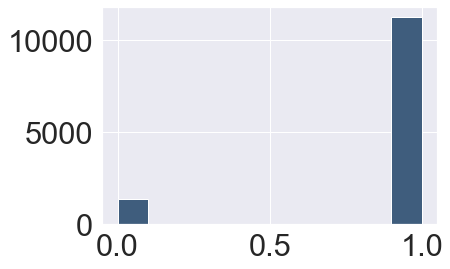

In [37]:
plt.hist(cluster_dataset.is_normal, color='#3F5D7D');

In [38]:
abnormal_dataset = cluster_dataset[cluster_dataset.is_normal == 0]
dataset = abnormal_dataset.drop(columns=["is_normal"])

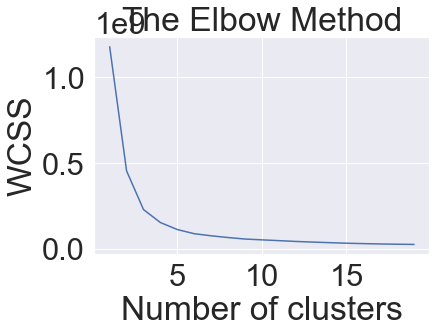

In [39]:
from sklearn.cluster import KMeans
wcss = []
total_test = 20
for i in range(1, total_test):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, total_test), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

## Training the K-Means model on the dataset

In [40]:
no_cluster = 4
kmeans = KMeans(n_clusters = no_cluster, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset)

## Change to 2 dimention for ploting

In [41]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')   # we can use kerenal to improve the perfomance
test_dataset = kpca.fit_transform(dataset)

## Visualising the clusters

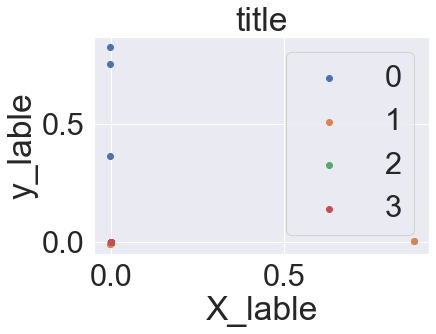

In [42]:
for i in range(no_cluster):
    plt.scatter(test_dataset[y_kmeans == i , 0] , test_dataset[y_kmeans == i , 1],  label = i)
    
plt.title('title')
plt.xlabel('X_lable')
plt.ylabel('y_lable')
plt.legend();

In [43]:
abnormal_dataset = abnormal_dataset.drop(columns=["is_normal"])
abnormal_dataset["is_normal"] = y_kmeans.tolist()

In [44]:
abnormal_dataset.head()

,T_rms_mean,T_rms_std,T_zcr_mean,F_mel_mean,F_mel_std,F_mel_rms_mean,F_mel_rms_std,F_mfcc_mean,F_mfcc_std,F_flatness_mean,F_bandwidth_mean,F_bandwidth_std,F_contrast_mean,F_rolloff_mean,F_rolloff_std,is_normal
0,0.012497,0.005714,0.103556,0.038337,0.061072,0.007550,0.003713,0.415885,2.155657,0.029981,1610.933357,151.745597,15.943189,2974.540735,559.438575,3
1,0.012792,0.005098,0.126817,0.040090,0.059717,0.007731,0.003367,0.368102,2.164471,0.062612,1796.437902,251.053851,15.520992,3682.333267,941.671955,1
2,0.011871,0.003497,0.100751,0.038190,0.052424,0.007174,0.002440,0.707360,1.867119,0.030634,1607.281122,135.964807,15.264451,2970.297524,455.254023,3
3,0.012309,0.005092,0.098201,0.039015,0.057805,0.007455,0.003315,0.752885,1.992444,0.029826,1601.738958,154.796347,15.358550,2939.496805,502.969920,3
4,0.013240,0.004242,0.098981,0.042505,0.059668,0.008016,0.002878,0.707843,2.147740,0.028244,1568.230910,129.651706,15.120233,2861.396765,434.689661,3


In [45]:
for i in range(no_cluster):
    print(i,": ",abnormal_dataset[abnormal_dataset.is_normal == i].shape)

0 :  (204, 16)
1 :  (501, 16)
2 :  (281, 16)
3 :  (382, 16)


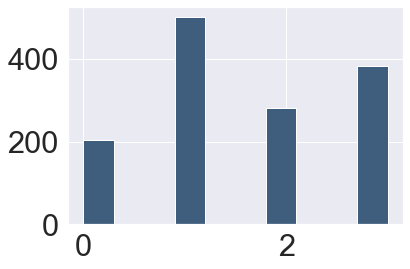

In [46]:
plt.hist(abnormal_dataset.is_normal, color='#3F5D7D');

## Split data

In [47]:
X = abnormal_dataset.drop("is_normal", axis=1)
y = abnormal_dataset.is_normal

from sklearn.model_selection import train_test_split

X_model, X_val, y_model, y_val  = train_test_split(X, y, test_size=0.1, random_state=1) # 0.25 x 0.8 = 0.2

In [48]:
print(X_model.shape)
print(y_model.shape)

(1231, 15)
(1231,)


## Resample over sample

In [49]:
from imblearn.over_sampling import BorderlineSMOTE
X_resample, y_resample = BorderlineSMOTE().fit_resample(X_model, y_model.ravel())

y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=1)

[1 2 3 0]


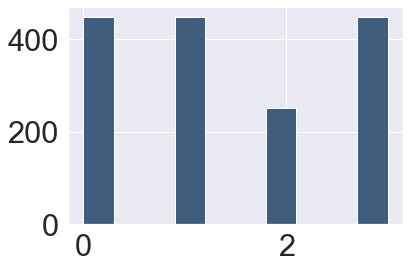

In [50]:
print(y_resample[0].unique())
plt.hist(y_resample, color='#3F5D7D');

## Feature Scaling 

In [51]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
# reassingn index and columns
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train_scaled = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test_scaled = X_test2

## Logical Regression (Default)

In [52]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0)
LR_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = LR_classifier.predict(X_test_scaled)

results = perfomance_check('Logical Regression (Default)')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 3       0.95      1.00      0.97        94
     class 1       0.97      0.95      0.96        80
     class 2       1.00      0.98      0.99        53
     class 0       0.96      0.94      0.95        93

    accuracy                           0.97       320
   macro avg       0.97      0.97      0.97       320
weighted avg       0.97      0.97      0.97       320



## Logical Regression

In [53]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0, penalty = 'l1', solver='saga')
LR_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = LR_classifier.predict(X_test_scaled)

results = perfomance_check('Logical Regression (Lasso)')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 3       0.95      1.00      0.97        94
     class 1       0.99      0.96      0.97        80
     class 2       0.98      1.00      0.99        53
     class 0       0.98      0.94      0.96        93

    accuracy                           0.97       320
   macro avg       0.97      0.97      0.97       320
weighted avg       0.97      0.97      0.97       320



## KNN (K-Nearest Neighbours)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
no_neighbor = 5
for i in range(2,no_neighbor+1):
    KNN_classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
    KNN_classifier.fit(X_train_scaled, y_train.values.ravel())

    y_pred = KNN_classifier.predict(X_test_scaled)

    results = perfomance_check(f'K-Nearest Neighbours {i}')
    
    class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 3       0.97      1.00      0.98        94
     class 1       0.90      0.95      0.93        80
     class 2       1.00      0.92      0.96        53
     class 0       0.96      0.92      0.94        93

    accuracy                           0.95       320
   macro avg       0.96      0.95      0.95       320
weighted avg       0.95      0.95      0.95       320

              precision    recall  f1-score   support

     class 3       0.98      1.00      0.99        94
     class 1       0.92      0.89      0.90        80
     class 2       0.98      0.92      0.95        53
     class 0       0.92      0.96      0.94        93

    accuracy                           0.95       320
   macro avg       0.95      0.94      0.95       320
weighted avg       0.95      0.95      0.95       320

              precision    recall  f1-score   support

     class 3       0.95      1.00      0.97        94
     class 1       0.

## SVM

from sklearn.svm import SVC
SVML_classifier = SVC(random_state = 0, kernel = 'linear')
SVML_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = SVML_classifier.predict(X_test_scaled)

results = perfomance_check('SVM (Linear)')

class_report(y_pred)

## Kernal SVM

In [55]:
from sklearn.svm import SVC
K_SVM_classifier = SVC(random_state=0, kernel = 'rbf')
K_SVM_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = K_SVM_classifier.predict(X_test_scaled)

results = perfomance_check('SVM (RBF)')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 3       0.95      1.00      0.97        94
     class 1       0.95      0.93      0.94        80
     class 2       1.00      0.96      0.98        53
     class 0       0.93      0.92      0.93        93

    accuracy                           0.95       320
   macro avg       0.96      0.95      0.96       320
weighted avg       0.95      0.95      0.95       320



## Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train.values.ravel())

y_pred = NB_classifier.predict(X_test_scaled)

results = perfomance_check('Naive Bayes')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 3       0.02      0.02      0.02        94
     class 1       0.00      0.00      0.00        80
     class 2       0.29      0.92      0.44        53
     class 0       0.62      0.40      0.48        93

    accuracy                           0.28       320
   macro avg       0.23      0.34      0.24       320
weighted avg       0.23      0.28      0.22       320



## Decision Tree Classification

In [57]:
from sklearn.tree import DecisionTreeClassifier
DTC_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTC_classifier.fit(X_train, y_train.values.ravel())

y_pred = DTC_classifier.predict(X_test)

results = perfomance_check('Decision Tree Classification')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 3       0.99      1.00      0.99        94
     class 1       1.00      0.99      0.99        80
     class 2       0.98      1.00      0.99        53
     class 0       1.00      0.99      0.99        93

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



## Random Forest Classification

In [58]:
from sklearn.ensemble import RandomForestClassifier

no_estimators = 100

RF_classifier = RandomForestClassifier(random_state = 0, n_estimators = no_estimators, criterion = 'entropy')
RF_classifier.fit(X_train, y_train.values.ravel())
y_pred = RF_classifier.predict(X_test)

results = perfomance_check(f'Random Forest (n={no_estimators})')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 3       0.99      1.00      0.99        94
     class 1       0.99      0.99      0.99        80
     class 2       0.98      0.98      0.98        53
     class 0       1.00      0.99      0.99        93

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



## XGBoost Classifier

In [59]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train.values.ravel())

y_pred = xgb_classifier.predict(X_test)

results = perfomance_check('XGBoost ')

class_report(y_test, y_pred)

[10:09:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

     class 3       0.99      1.00      0.99        94
     class 1       1.00      0.99      0.99        80
     class 2       0.98      1.00      0.99        53
     class 0       1.00      0.99      0.99        93

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



## CatBoost Classifier

In [60]:
from catboost import CatBoostClassifier
CB_classifier = CatBoostClassifier()
CB_classifier.fit(X_train, y_train.values.ravel())

y_pred = CB_classifier.predict(X_test)

results = perfomance_check('CatBoost')

class_report(y_test, y_pred)

Learning rate set to 0.080116
0:	learn: 1.1931801	total: 15.1ms	remaining: 15s
1:	learn: 1.0473153	total: 29ms	remaining: 14.5s
2:	learn: 0.9322605	total: 43.1ms	remaining: 14.3s
3:	learn: 0.8329211	total: 56.3ms	remaining: 14s
4:	learn: 0.7497726	total: 70.3ms	remaining: 14s
5:	learn: 0.6764841	total: 82.9ms	remaining: 13.7s
6:	learn: 0.6139297	total: 95.9ms	remaining: 13.6s
7:	learn: 0.5634816	total: 110ms	remaining: 13.7s
8:	learn: 0.5133390	total: 124ms	remaining: 13.6s
9:	learn: 0.4708127	total: 138ms	remaining: 13.7s
10:	learn: 0.4327891	total: 155ms	remaining: 13.9s
11:	learn: 0.4001803	total: 171ms	remaining: 14.1s
12:	learn: 0.3686216	total: 187ms	remaining: 14.2s
13:	learn: 0.3414565	total: 201ms	remaining: 14.1s
14:	learn: 0.3166693	total: 215ms	remaining: 14.1s
15:	learn: 0.2935348	total: 228ms	remaining: 14s
16:	learn: 0.2722884	total: 244ms	remaining: 14.1s
17:	learn: 0.2543714	total: 259ms	remaining: 14.1s
18:	learn: 0.2381349	total: 275ms	remaining: 14.2s
19:	learn: 0.2

171:	learn: 0.0117301	total: 2.54s	remaining: 12.2s
172:	learn: 0.0116457	total: 2.56s	remaining: 12.2s
173:	learn: 0.0115808	total: 2.58s	remaining: 12.2s
174:	learn: 0.0114478	total: 2.59s	remaining: 12.2s
175:	learn: 0.0113696	total: 2.61s	remaining: 12.2s
176:	learn: 0.0112866	total: 2.62s	remaining: 12.2s
177:	learn: 0.0111302	total: 2.63s	remaining: 12.2s
178:	learn: 0.0110228	total: 2.65s	remaining: 12.2s
179:	learn: 0.0108812	total: 2.66s	remaining: 12.1s
180:	learn: 0.0107402	total: 2.68s	remaining: 12.1s
181:	learn: 0.0106564	total: 2.69s	remaining: 12.1s
182:	learn: 0.0105960	total: 2.71s	remaining: 12.1s
183:	learn: 0.0105844	total: 2.72s	remaining: 12.1s
184:	learn: 0.0105228	total: 2.74s	remaining: 12.1s
185:	learn: 0.0104898	total: 2.76s	remaining: 12.1s
186:	learn: 0.0103868	total: 2.77s	remaining: 12s
187:	learn: 0.0103361	total: 2.78s	remaining: 12s
188:	learn: 0.0102937	total: 2.81s	remaining: 12s
189:	learn: 0.0102836	total: 2.82s	remaining: 12s
190:	learn: 0.010229

336:	learn: 0.0052088	total: 5.09s	remaining: 10s
337:	learn: 0.0051899	total: 5.11s	remaining: 10s
338:	learn: 0.0051862	total: 5.13s	remaining: 9.99s
339:	learn: 0.0051823	total: 5.14s	remaining: 9.98s
340:	learn: 0.0051672	total: 5.15s	remaining: 9.96s
341:	learn: 0.0051407	total: 5.17s	remaining: 9.94s
342:	learn: 0.0051128	total: 5.18s	remaining: 9.92s
343:	learn: 0.0051091	total: 5.2s	remaining: 9.92s
344:	learn: 0.0050965	total: 5.22s	remaining: 9.9s
345:	learn: 0.0050920	total: 5.23s	remaining: 9.89s
346:	learn: 0.0050784	total: 5.25s	remaining: 9.87s
347:	learn: 0.0050515	total: 5.26s	remaining: 9.86s
348:	learn: 0.0050486	total: 5.28s	remaining: 9.84s
349:	learn: 0.0050250	total: 5.29s	remaining: 9.83s
350:	learn: 0.0049894	total: 5.31s	remaining: 9.81s
351:	learn: 0.0049728	total: 5.32s	remaining: 9.79s
352:	learn: 0.0049597	total: 5.33s	remaining: 9.78s
353:	learn: 0.0049573	total: 5.35s	remaining: 9.77s
354:	learn: 0.0049547	total: 5.37s	remaining: 9.76s
355:	learn: 0.0049

497:	learn: 0.0033448	total: 7.68s	remaining: 7.75s
498:	learn: 0.0033287	total: 7.7s	remaining: 7.73s
499:	learn: 0.0033233	total: 7.72s	remaining: 7.72s
500:	learn: 0.0033177	total: 7.74s	remaining: 7.71s
501:	learn: 0.0033037	total: 7.76s	remaining: 7.7s
502:	learn: 0.0032985	total: 7.78s	remaining: 7.69s
503:	learn: 0.0032936	total: 7.8s	remaining: 7.67s
504:	learn: 0.0032772	total: 7.82s	remaining: 7.66s
505:	learn: 0.0032664	total: 7.83s	remaining: 7.65s
506:	learn: 0.0032635	total: 7.86s	remaining: 7.64s
507:	learn: 0.0032552	total: 7.88s	remaining: 7.63s
508:	learn: 0.0032528	total: 7.89s	remaining: 7.61s
509:	learn: 0.0032401	total: 7.91s	remaining: 7.6s
510:	learn: 0.0032335	total: 7.93s	remaining: 7.58s
511:	learn: 0.0032250	total: 7.95s	remaining: 7.57s
512:	learn: 0.0032207	total: 7.96s	remaining: 7.55s
513:	learn: 0.0032163	total: 7.97s	remaining: 7.54s
514:	learn: 0.0032082	total: 7.99s	remaining: 7.52s
515:	learn: 0.0031975	total: 8s	remaining: 7.5s
516:	learn: 0.003193

669:	learn: 0.0023857	total: 10.2s	remaining: 5.04s
670:	learn: 0.0023852	total: 10.3s	remaining: 5.03s
671:	learn: 0.0023794	total: 10.3s	remaining: 5.01s
672:	learn: 0.0023769	total: 10.3s	remaining: 5s
673:	learn: 0.0023742	total: 10.3s	remaining: 4.98s
674:	learn: 0.0023696	total: 10.3s	remaining: 4.96s
675:	learn: 0.0023631	total: 10.3s	remaining: 4.95s
676:	learn: 0.0023595	total: 10.3s	remaining: 4.93s
677:	learn: 0.0023561	total: 10.3s	remaining: 4.91s
678:	learn: 0.0023523	total: 10.4s	remaining: 4.9s
679:	learn: 0.0023487	total: 10.4s	remaining: 4.88s
680:	learn: 0.0023449	total: 10.4s	remaining: 4.87s
681:	learn: 0.0023403	total: 10.4s	remaining: 4.85s
682:	learn: 0.0023335	total: 10.4s	remaining: 4.83s
683:	learn: 0.0023323	total: 10.4s	remaining: 4.82s
684:	learn: 0.0023280	total: 10.5s	remaining: 4.81s
685:	learn: 0.0023246	total: 10.5s	remaining: 4.79s
686:	learn: 0.0023214	total: 10.5s	remaining: 4.77s
687:	learn: 0.0023150	total: 10.5s	remaining: 4.76s
688:	learn: 0.00

829:	learn: 0.0018819	total: 12.6s	remaining: 2.58s
830:	learn: 0.0018814	total: 12.6s	remaining: 2.56s
831:	learn: 0.0018807	total: 12.6s	remaining: 2.55s
832:	learn: 0.0018774	total: 12.6s	remaining: 2.53s
833:	learn: 0.0018738	total: 12.6s	remaining: 2.52s
834:	learn: 0.0018676	total: 12.7s	remaining: 2.5s
835:	learn: 0.0018628	total: 12.7s	remaining: 2.49s
836:	learn: 0.0018595	total: 12.7s	remaining: 2.47s
837:	learn: 0.0018571	total: 12.7s	remaining: 2.46s
838:	learn: 0.0018536	total: 12.7s	remaining: 2.44s
839:	learn: 0.0018521	total: 12.7s	remaining: 2.42s
840:	learn: 0.0018514	total: 12.7s	remaining: 2.41s
841:	learn: 0.0018487	total: 12.8s	remaining: 2.39s
842:	learn: 0.0018461	total: 12.8s	remaining: 2.38s
843:	learn: 0.0018446	total: 12.8s	remaining: 2.36s
844:	learn: 0.0018432	total: 12.8s	remaining: 2.35s
845:	learn: 0.0018400	total: 12.8s	remaining: 2.33s
846:	learn: 0.0018397	total: 12.8s	remaining: 2.32s
847:	learn: 0.0018377	total: 12.9s	remaining: 2.3s
848:	learn: 0.

994:	learn: 0.0015425	total: 15.1s	remaining: 76.1ms
995:	learn: 0.0015412	total: 15.2s	remaining: 60.9ms
996:	learn: 0.0015360	total: 15.2s	remaining: 45.7ms
997:	learn: 0.0015352	total: 15.2s	remaining: 30.5ms
998:	learn: 0.0015338	total: 15.2s	remaining: 15.2ms
999:	learn: 0.0015324	total: 15.2s	remaining: 0us
              precision    recall  f1-score   support

     class 3       0.99      1.00      0.99        94
     class 1       1.00      0.99      0.99        80
     class 2       0.98      1.00      0.99        53
     class 0       1.00      0.99      0.99        93

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



In [61]:
class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 3       0.99      1.00      0.99        94
     class 1       1.00      0.99      0.99        80
     class 2       0.98      1.00      0.99        53
     class 0       1.00      0.99      0.99        93

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



In [62]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logical Regression (Default),0.822716,0.822716,0.822716,0.822716
1,Logical Regression (Lasso),0.825185,0.825185,0.825185,0.825185
2,K-Nearest Neighbours 2,0.954321,0.954321,0.954321,0.954321
3,K-Nearest Neighbours 3,0.959259,0.959259,0.959259,0.959259
4,K-Nearest Neighbours 4,0.953580,0.953580,0.953580,0.953580
5,K-Nearest Neighbours 5,0.957037,0.957037,0.957037,0.957037
6,SVM (RBF),0.911358,0.911358,0.911358,0.911358
7,Naive Bayes,0.633333,0.633333,0.633333,0.633333
8,Decision Tree Classification,0.933333,0.933333,0.933333,0.933333
9,Random Forest (n=100),0.963210,0.963210,0.963210,0.963210


---
# MODEL SELECTION
---

### K-fold Cross Validation
---
* Conside which model perform the best

In [63]:
from sklearn.model_selection import cross_val_score
model_lst = [LR_classifier,    # 0
             KNN_classifier,   # 1
             K_SVM_classifier, # 2
             NB_classifier,    # 3
             DTC_classifier,   # 4
             RF_classifier,    # 5
             xgb_classifier,   # 6
             CB_classifier]    # 7
#              SVML_classifier,  # 8
msg = []
for i in range(len(model_lst)):
    accuracies = cross_val_score(estimator=model_lst[i] , X = X_train, y = y_train.values.ravel(), cv = 10)
    msg.append(f"Model Accuracy {i}: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))
    
for i in msg:
    print(i)    

[10:31:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:31:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:31:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:31:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

118:	learn: 0.0160999	total: 1.59s	remaining: 11.8s
119:	learn: 0.0158144	total: 1.61s	remaining: 11.8s
120:	learn: 0.0157273	total: 1.62s	remaining: 11.8s
121:	learn: 0.0156097	total: 1.63s	remaining: 11.7s
122:	learn: 0.0154962	total: 1.64s	remaining: 11.7s
123:	learn: 0.0152131	total: 1.66s	remaining: 11.7s
124:	learn: 0.0149822	total: 1.67s	remaining: 11.7s
125:	learn: 0.0149495	total: 1.68s	remaining: 11.7s
126:	learn: 0.0149313	total: 1.7s	remaining: 11.7s
127:	learn: 0.0148317	total: 1.71s	remaining: 11.6s
128:	learn: 0.0146065	total: 1.72s	remaining: 11.6s
129:	learn: 0.0145086	total: 1.73s	remaining: 11.6s
130:	learn: 0.0144080	total: 1.74s	remaining: 11.6s
131:	learn: 0.0143562	total: 1.76s	remaining: 11.6s
132:	learn: 0.0142544	total: 1.77s	remaining: 11.6s
133:	learn: 0.0141811	total: 1.79s	remaining: 11.6s
134:	learn: 0.0140880	total: 1.81s	remaining: 11.6s
135:	learn: 0.0138708	total: 1.82s	remaining: 11.6s
136:	learn: 0.0137005	total: 1.84s	remaining: 11.6s
137:	learn: 0

288:	learn: 0.0058197	total: 3.97s	remaining: 9.76s
289:	learn: 0.0057906	total: 3.98s	remaining: 9.76s
290:	learn: 0.0057853	total: 4s	remaining: 9.75s
291:	learn: 0.0057793	total: 4.01s	remaining: 9.74s
292:	learn: 0.0057747	total: 4.03s	remaining: 9.73s
293:	learn: 0.0057522	total: 4.05s	remaining: 9.73s
294:	learn: 0.0057370	total: 4.07s	remaining: 9.72s
295:	learn: 0.0056940	total: 4.08s	remaining: 9.7s
296:	learn: 0.0056471	total: 4.09s	remaining: 9.69s
297:	learn: 0.0056383	total: 4.11s	remaining: 9.67s
298:	learn: 0.0056101	total: 4.12s	remaining: 9.66s
299:	learn: 0.0056056	total: 4.13s	remaining: 9.65s
300:	learn: 0.0055868	total: 4.15s	remaining: 9.63s
301:	learn: 0.0055745	total: 4.17s	remaining: 9.63s
302:	learn: 0.0055693	total: 4.18s	remaining: 9.63s
303:	learn: 0.0055517	total: 4.2s	remaining: 9.62s
304:	learn: 0.0055333	total: 4.21s	remaining: 9.6s
305:	learn: 0.0055171	total: 4.23s	remaining: 9.59s
306:	learn: 0.0055148	total: 4.24s	remaining: 9.58s
307:	learn: 0.0054

454:	learn: 0.0034520	total: 6.79s	remaining: 8.14s
455:	learn: 0.0034425	total: 6.81s	remaining: 8.12s
456:	learn: 0.0034396	total: 6.82s	remaining: 8.11s
457:	learn: 0.0034346	total: 6.84s	remaining: 8.09s
458:	learn: 0.0034314	total: 6.85s	remaining: 8.07s
459:	learn: 0.0034124	total: 6.86s	remaining: 8.06s
460:	learn: 0.0033987	total: 6.88s	remaining: 8.04s
461:	learn: 0.0033913	total: 6.89s	remaining: 8.03s
462:	learn: 0.0033832	total: 6.91s	remaining: 8.01s
463:	learn: 0.0033753	total: 6.92s	remaining: 8s
464:	learn: 0.0033711	total: 6.95s	remaining: 8s
465:	learn: 0.0033532	total: 6.97s	remaining: 7.99s
466:	learn: 0.0033463	total: 6.99s	remaining: 7.97s
467:	learn: 0.0033299	total: 7s	remaining: 7.96s
468:	learn: 0.0033120	total: 7.02s	remaining: 7.95s
469:	learn: 0.0033061	total: 7.03s	remaining: 7.93s
470:	learn: 0.0033045	total: 7.05s	remaining: 7.92s
471:	learn: 0.0032977	total: 7.06s	remaining: 7.9s
472:	learn: 0.0032959	total: 7.07s	remaining: 7.88s
473:	learn: 0.0032887	

616:	learn: 0.0024239	total: 9.19s	remaining: 5.7s
617:	learn: 0.0024158	total: 9.2s	remaining: 5.69s
618:	learn: 0.0024048	total: 9.22s	remaining: 5.67s
619:	learn: 0.0024037	total: 9.23s	remaining: 5.66s
620:	learn: 0.0023976	total: 9.24s	remaining: 5.64s
621:	learn: 0.0023898	total: 9.25s	remaining: 5.62s
622:	learn: 0.0023830	total: 9.27s	remaining: 5.61s
623:	learn: 0.0023793	total: 9.28s	remaining: 5.59s
624:	learn: 0.0023774	total: 9.29s	remaining: 5.57s
625:	learn: 0.0023740	total: 9.3s	remaining: 5.56s
626:	learn: 0.0023700	total: 9.32s	remaining: 5.54s
627:	learn: 0.0023669	total: 9.33s	remaining: 5.53s
628:	learn: 0.0023661	total: 9.34s	remaining: 5.51s
629:	learn: 0.0023637	total: 9.36s	remaining: 5.5s
630:	learn: 0.0023590	total: 9.37s	remaining: 5.48s
631:	learn: 0.0023552	total: 9.39s	remaining: 5.47s
632:	learn: 0.0023506	total: 9.4s	remaining: 5.45s
633:	learn: 0.0023473	total: 9.42s	remaining: 5.43s
634:	learn: 0.0023427	total: 9.43s	remaining: 5.42s
635:	learn: 0.002

784:	learn: 0.0018581	total: 11.6s	remaining: 3.17s
785:	learn: 0.0018527	total: 11.6s	remaining: 3.15s
786:	learn: 0.0018515	total: 11.6s	remaining: 3.14s
787:	learn: 0.0018499	total: 11.6s	remaining: 3.12s
788:	learn: 0.0018463	total: 11.6s	remaining: 3.1s
789:	learn: 0.0018439	total: 11.6s	remaining: 3.09s
790:	learn: 0.0018419	total: 11.6s	remaining: 3.07s
791:	learn: 0.0018377	total: 11.6s	remaining: 3.06s
792:	learn: 0.0018372	total: 11.7s	remaining: 3.04s
793:	learn: 0.0018326	total: 11.7s	remaining: 3.03s
794:	learn: 0.0018295	total: 11.7s	remaining: 3.01s
795:	learn: 0.0018242	total: 11.7s	remaining: 3s
796:	learn: 0.0018229	total: 11.7s	remaining: 2.98s
797:	learn: 0.0018205	total: 11.7s	remaining: 2.97s
798:	learn: 0.0018193	total: 11.7s	remaining: 2.95s
799:	learn: 0.0018133	total: 11.8s	remaining: 2.94s
800:	learn: 0.0018098	total: 11.8s	remaining: 2.92s
801:	learn: 0.0018075	total: 11.8s	remaining: 2.91s
802:	learn: 0.0018051	total: 11.8s	remaining: 2.89s
803:	learn: 0.00

952:	learn: 0.0015103	total: 13.9s	remaining: 686ms
953:	learn: 0.0015080	total: 13.9s	remaining: 671ms
954:	learn: 0.0015066	total: 13.9s	remaining: 657ms
955:	learn: 0.0015063	total: 14s	remaining: 642ms
956:	learn: 0.0015038	total: 14s	remaining: 627ms
957:	learn: 0.0015034	total: 14s	remaining: 613ms
958:	learn: 0.0015017	total: 14s	remaining: 598ms
959:	learn: 0.0015002	total: 14s	remaining: 584ms
960:	learn: 0.0014998	total: 14s	remaining: 569ms
961:	learn: 0.0014985	total: 14s	remaining: 554ms
962:	learn: 0.0014969	total: 14s	remaining: 540ms
963:	learn: 0.0014966	total: 14.1s	remaining: 525ms
964:	learn: 0.0014943	total: 14.1s	remaining: 510ms
965:	learn: 0.0014930	total: 14.1s	remaining: 496ms
966:	learn: 0.0014915	total: 14.1s	remaining: 481ms
967:	learn: 0.0014896	total: 14.1s	remaining: 467ms
968:	learn: 0.0014868	total: 14.1s	remaining: 452ms
969:	learn: 0.0014847	total: 14.1s	remaining: 438ms
970:	learn: 0.0014832	total: 14.2s	remaining: 423ms
971:	learn: 0.0014828	total:

118:	learn: 0.0192419	total: 1.66s	remaining: 12.3s
119:	learn: 0.0190156	total: 1.68s	remaining: 12.3s
120:	learn: 0.0187583	total: 1.69s	remaining: 12.3s
121:	learn: 0.0185357	total: 1.7s	remaining: 12.3s
122:	learn: 0.0184670	total: 1.72s	remaining: 12.2s
123:	learn: 0.0181958	total: 1.73s	remaining: 12.2s
124:	learn: 0.0180262	total: 1.74s	remaining: 12.2s
125:	learn: 0.0180051	total: 1.75s	remaining: 12.2s
126:	learn: 0.0179446	total: 1.77s	remaining: 12.1s
127:	learn: 0.0176493	total: 1.78s	remaining: 12.1s
128:	learn: 0.0173827	total: 1.79s	remaining: 12.1s
129:	learn: 0.0172059	total: 1.8s	remaining: 12.1s
130:	learn: 0.0170306	total: 1.81s	remaining: 12s
131:	learn: 0.0169942	total: 1.83s	remaining: 12s
132:	learn: 0.0169005	total: 1.84s	remaining: 12s
133:	learn: 0.0167480	total: 1.86s	remaining: 12s
134:	learn: 0.0166292	total: 1.88s	remaining: 12s
135:	learn: 0.0163942	total: 1.89s	remaining: 12s
136:	learn: 0.0162698	total: 1.9s	remaining: 12s
137:	learn: 0.0161476	total: 

284:	learn: 0.0072004	total: 4.22s	remaining: 10.6s
285:	learn: 0.0071690	total: 4.24s	remaining: 10.6s
286:	learn: 0.0071364	total: 4.26s	remaining: 10.6s
287:	learn: 0.0071108	total: 4.28s	remaining: 10.6s
288:	learn: 0.0070770	total: 4.29s	remaining: 10.6s
289:	learn: 0.0070574	total: 4.31s	remaining: 10.5s
290:	learn: 0.0070368	total: 4.32s	remaining: 10.5s
291:	learn: 0.0070338	total: 4.34s	remaining: 10.5s
292:	learn: 0.0070106	total: 4.35s	remaining: 10.5s
293:	learn: 0.0069847	total: 4.36s	remaining: 10.5s
294:	learn: 0.0069301	total: 4.38s	remaining: 10.5s
295:	learn: 0.0069018	total: 4.39s	remaining: 10.5s
296:	learn: 0.0068477	total: 4.41s	remaining: 10.4s
297:	learn: 0.0068329	total: 4.43s	remaining: 10.4s
298:	learn: 0.0068091	total: 4.44s	remaining: 10.4s
299:	learn: 0.0068006	total: 4.46s	remaining: 10.4s
300:	learn: 0.0067801	total: 4.47s	remaining: 10.4s
301:	learn: 0.0067642	total: 4.48s	remaining: 10.4s
302:	learn: 0.0067516	total: 4.51s	remaining: 10.4s
303:	learn: 

453:	learn: 0.0041916	total: 6.79s	remaining: 8.17s
454:	learn: 0.0041815	total: 6.81s	remaining: 8.16s
455:	learn: 0.0041732	total: 6.84s	remaining: 8.16s
456:	learn: 0.0041530	total: 6.86s	remaining: 8.15s
457:	learn: 0.0041482	total: 6.87s	remaining: 8.13s
458:	learn: 0.0041401	total: 6.89s	remaining: 8.12s
459:	learn: 0.0041206	total: 6.9s	remaining: 8.1s
460:	learn: 0.0041127	total: 6.92s	remaining: 8.09s
461:	learn: 0.0040970	total: 6.93s	remaining: 8.07s
462:	learn: 0.0040840	total: 6.94s	remaining: 8.05s
463:	learn: 0.0040755	total: 6.96s	remaining: 8.04s
464:	learn: 0.0040607	total: 6.97s	remaining: 8.02s
465:	learn: 0.0040532	total: 6.98s	remaining: 8s
466:	learn: 0.0040478	total: 7.01s	remaining: 8s
467:	learn: 0.0040371	total: 7.03s	remaining: 7.99s
468:	learn: 0.0040304	total: 7.04s	remaining: 7.97s
469:	learn: 0.0040256	total: 7.05s	remaining: 7.95s
470:	learn: 0.0040237	total: 7.07s	remaining: 7.94s
471:	learn: 0.0040223	total: 7.08s	remaining: 7.92s
472:	learn: 0.004018

624:	learn: 0.0029698	total: 9.22s	remaining: 5.53s
625:	learn: 0.0029655	total: 9.24s	remaining: 5.52s
626:	learn: 0.0029585	total: 9.25s	remaining: 5.5s
627:	learn: 0.0029497	total: 9.26s	remaining: 5.49s
628:	learn: 0.0029455	total: 9.28s	remaining: 5.47s
629:	learn: 0.0029416	total: 9.29s	remaining: 5.46s
630:	learn: 0.0029365	total: 9.3s	remaining: 5.44s
631:	learn: 0.0029322	total: 9.31s	remaining: 5.42s
632:	learn: 0.0029268	total: 9.33s	remaining: 5.41s
633:	learn: 0.0029230	total: 9.34s	remaining: 5.39s
634:	learn: 0.0029153	total: 9.35s	remaining: 5.38s
635:	learn: 0.0029107	total: 9.37s	remaining: 5.36s
636:	learn: 0.0029090	total: 9.38s	remaining: 5.34s
637:	learn: 0.0029032	total: 9.39s	remaining: 5.33s
638:	learn: 0.0028895	total: 9.41s	remaining: 5.32s
639:	learn: 0.0028836	total: 9.42s	remaining: 5.3s
640:	learn: 0.0028774	total: 9.44s	remaining: 5.28s
641:	learn: 0.0028763	total: 9.45s	remaining: 5.27s
642:	learn: 0.0028667	total: 9.47s	remaining: 5.26s
643:	learn: 0.0

795:	learn: 0.0022530	total: 11.6s	remaining: 2.97s
796:	learn: 0.0022498	total: 11.6s	remaining: 2.95s
797:	learn: 0.0022477	total: 11.6s	remaining: 2.94s
798:	learn: 0.0022438	total: 11.6s	remaining: 2.92s
799:	learn: 0.0022363	total: 11.6s	remaining: 2.91s
800:	learn: 0.0022297	total: 11.6s	remaining: 2.89s
801:	learn: 0.0022291	total: 11.7s	remaining: 2.88s
802:	learn: 0.0022268	total: 11.7s	remaining: 2.87s
803:	learn: 0.0022195	total: 11.7s	remaining: 2.85s
804:	learn: 0.0022176	total: 11.7s	remaining: 2.83s
805:	learn: 0.0022117	total: 11.7s	remaining: 2.82s
806:	learn: 0.0022082	total: 11.7s	remaining: 2.81s
807:	learn: 0.0022010	total: 11.7s	remaining: 2.79s
808:	learn: 0.0021993	total: 11.8s	remaining: 2.77s
809:	learn: 0.0021965	total: 11.8s	remaining: 2.76s
810:	learn: 0.0021932	total: 11.8s	remaining: 2.75s
811:	learn: 0.0021925	total: 11.8s	remaining: 2.73s
812:	learn: 0.0021914	total: 11.8s	remaining: 2.72s
813:	learn: 0.0021831	total: 11.8s	remaining: 2.7s
814:	learn: 0

959:	learn: 0.0018499	total: 13.8s	remaining: 576ms
960:	learn: 0.0018494	total: 13.8s	remaining: 562ms
961:	learn: 0.0018484	total: 13.9s	remaining: 547ms
962:	learn: 0.0018437	total: 13.9s	remaining: 533ms
963:	learn: 0.0018409	total: 13.9s	remaining: 518ms
964:	learn: 0.0018395	total: 13.9s	remaining: 504ms
965:	learn: 0.0018379	total: 13.9s	remaining: 489ms
966:	learn: 0.0018332	total: 13.9s	remaining: 475ms
967:	learn: 0.0018316	total: 13.9s	remaining: 460ms
968:	learn: 0.0018278	total: 13.9s	remaining: 446ms
969:	learn: 0.0018226	total: 14s	remaining: 432ms
970:	learn: 0.0018209	total: 14s	remaining: 417ms
971:	learn: 0.0018157	total: 14s	remaining: 403ms
972:	learn: 0.0018154	total: 14s	remaining: 388ms
973:	learn: 0.0018152	total: 14s	remaining: 374ms
974:	learn: 0.0018120	total: 14s	remaining: 360ms
975:	learn: 0.0018113	total: 14s	remaining: 345ms
976:	learn: 0.0018105	total: 14s	remaining: 331ms
977:	learn: 0.0018087	total: 14.1s	remaining: 316ms
978:	learn: 0.0018075	total:

123:	learn: 0.0177531	total: 1.79s	remaining: 12.6s
124:	learn: 0.0176429	total: 1.8s	remaining: 12.6s
125:	learn: 0.0175684	total: 1.82s	remaining: 12.6s
126:	learn: 0.0175433	total: 1.83s	remaining: 12.6s
127:	learn: 0.0174680	total: 1.84s	remaining: 12.6s
128:	learn: 0.0172488	total: 1.86s	remaining: 12.5s
129:	learn: 0.0170351	total: 1.87s	remaining: 12.5s
130:	learn: 0.0168178	total: 1.89s	remaining: 12.5s
131:	learn: 0.0167983	total: 1.91s	remaining: 12.5s
132:	learn: 0.0165307	total: 1.92s	remaining: 12.5s
133:	learn: 0.0163034	total: 1.93s	remaining: 12.5s
134:	learn: 0.0162235	total: 1.95s	remaining: 12.5s
135:	learn: 0.0159679	total: 1.96s	remaining: 12.5s
136:	learn: 0.0158294	total: 1.97s	remaining: 12.4s
137:	learn: 0.0157838	total: 1.99s	remaining: 12.4s
138:	learn: 0.0156687	total: 2.01s	remaining: 12.4s
139:	learn: 0.0154816	total: 2.02s	remaining: 12.4s
140:	learn: 0.0153954	total: 2.03s	remaining: 12.4s
141:	learn: 0.0153232	total: 2.05s	remaining: 12.4s
142:	learn: 0

292:	learn: 0.0064674	total: 4.41s	remaining: 10.6s
293:	learn: 0.0064397	total: 4.43s	remaining: 10.6s
294:	learn: 0.0064118	total: 4.45s	remaining: 10.6s
295:	learn: 0.0063881	total: 4.46s	remaining: 10.6s
296:	learn: 0.0063724	total: 4.48s	remaining: 10.6s
297:	learn: 0.0063347	total: 4.5s	remaining: 10.6s
298:	learn: 0.0063239	total: 4.51s	remaining: 10.6s
299:	learn: 0.0063142	total: 4.53s	remaining: 10.6s
300:	learn: 0.0062946	total: 4.55s	remaining: 10.6s
301:	learn: 0.0062626	total: 4.57s	remaining: 10.6s
302:	learn: 0.0062600	total: 4.59s	remaining: 10.6s
303:	learn: 0.0062378	total: 4.6s	remaining: 10.5s
304:	learn: 0.0061772	total: 4.62s	remaining: 10.5s
305:	learn: 0.0061573	total: 4.64s	remaining: 10.5s
306:	learn: 0.0061539	total: 4.66s	remaining: 10.5s
307:	learn: 0.0061277	total: 4.67s	remaining: 10.5s
308:	learn: 0.0061169	total: 4.68s	remaining: 10.5s
309:	learn: 0.0061030	total: 4.7s	remaining: 10.5s
310:	learn: 0.0060595	total: 4.71s	remaining: 10.4s
311:	learn: 0.0

460:	learn: 0.0038771	total: 7.01s	remaining: 8.19s
461:	learn: 0.0038596	total: 7.03s	remaining: 8.18s
462:	learn: 0.0038445	total: 7.04s	remaining: 8.17s
463:	learn: 0.0038286	total: 7.06s	remaining: 8.15s
464:	learn: 0.0038219	total: 7.08s	remaining: 8.15s
465:	learn: 0.0038031	total: 7.09s	remaining: 8.13s
466:	learn: 0.0037974	total: 7.12s	remaining: 8.13s
467:	learn: 0.0037889	total: 7.14s	remaining: 8.12s
468:	learn: 0.0037691	total: 7.16s	remaining: 8.11s
469:	learn: 0.0037601	total: 7.18s	remaining: 8.09s
470:	learn: 0.0037585	total: 7.19s	remaining: 8.08s
471:	learn: 0.0037516	total: 7.22s	remaining: 8.07s
472:	learn: 0.0037477	total: 7.25s	remaining: 8.07s
473:	learn: 0.0037402	total: 7.26s	remaining: 8.06s
474:	learn: 0.0037390	total: 7.28s	remaining: 8.05s
475:	learn: 0.0037344	total: 7.3s	remaining: 8.03s
476:	learn: 0.0037280	total: 7.31s	remaining: 8.02s
477:	learn: 0.0037070	total: 7.33s	remaining: 8s
478:	learn: 0.0036902	total: 7.34s	remaining: 7.99s
479:	learn: 0.00

624:	learn: 0.0027582	total: 9.64s	remaining: 5.78s
625:	learn: 0.0027492	total: 9.66s	remaining: 5.77s
626:	learn: 0.0027459	total: 9.68s	remaining: 5.76s
627:	learn: 0.0027368	total: 9.69s	remaining: 5.74s
628:	learn: 0.0027334	total: 9.7s	remaining: 5.72s
629:	learn: 0.0027292	total: 9.72s	remaining: 5.71s
630:	learn: 0.0027257	total: 9.73s	remaining: 5.69s
631:	learn: 0.0027201	total: 9.75s	remaining: 5.67s
632:	learn: 0.0027160	total: 9.76s	remaining: 5.66s
633:	learn: 0.0027086	total: 9.77s	remaining: 5.64s
634:	learn: 0.0027041	total: 9.79s	remaining: 5.63s
635:	learn: 0.0027010	total: 9.8s	remaining: 5.61s
636:	learn: 0.0026998	total: 9.82s	remaining: 5.59s
637:	learn: 0.0026954	total: 9.83s	remaining: 5.58s
638:	learn: 0.0026914	total: 9.85s	remaining: 5.56s
639:	learn: 0.0026898	total: 9.86s	remaining: 5.55s
640:	learn: 0.0026877	total: 9.88s	remaining: 5.53s
641:	learn: 0.0026837	total: 9.89s	remaining: 5.52s
642:	learn: 0.0026794	total: 9.91s	remaining: 5.5s
643:	learn: 0.0

783:	learn: 0.0021223	total: 12s	remaining: 3.31s
784:	learn: 0.0021204	total: 12s	remaining: 3.29s
785:	learn: 0.0021195	total: 12s	remaining: 3.28s
786:	learn: 0.0021164	total: 12.1s	remaining: 3.26s
787:	learn: 0.0021146	total: 12.1s	remaining: 3.25s
788:	learn: 0.0021096	total: 12.1s	remaining: 3.23s
789:	learn: 0.0021066	total: 12.1s	remaining: 3.22s
790:	learn: 0.0021050	total: 12.1s	remaining: 3.2s
791:	learn: 0.0021009	total: 12.1s	remaining: 3.19s
792:	learn: 0.0020999	total: 12.2s	remaining: 3.17s
793:	learn: 0.0020941	total: 12.2s	remaining: 3.16s
794:	learn: 0.0020878	total: 12.2s	remaining: 3.14s
795:	learn: 0.0020849	total: 12.2s	remaining: 3.13s
796:	learn: 0.0020824	total: 12.2s	remaining: 3.11s
797:	learn: 0.0020755	total: 12.2s	remaining: 3.09s
798:	learn: 0.0020749	total: 12.2s	remaining: 3.08s
799:	learn: 0.0020684	total: 12.3s	remaining: 3.06s
800:	learn: 0.0020630	total: 12.3s	remaining: 3.05s
801:	learn: 0.0020626	total: 12.3s	remaining: 3.03s
802:	learn: 0.00205

948:	learn: 0.0017265	total: 14.6s	remaining: 784ms
949:	learn: 0.0017262	total: 14.6s	remaining: 768ms
950:	learn: 0.0017214	total: 14.6s	remaining: 753ms
951:	learn: 0.0017192	total: 14.6s	remaining: 738ms
952:	learn: 0.0017188	total: 14.6s	remaining: 722ms
953:	learn: 0.0017180	total: 14.7s	remaining: 707ms
954:	learn: 0.0017163	total: 14.7s	remaining: 691ms
955:	learn: 0.0017160	total: 14.7s	remaining: 676ms
956:	learn: 0.0017147	total: 14.7s	remaining: 660ms
957:	learn: 0.0017131	total: 14.7s	remaining: 645ms
958:	learn: 0.0017107	total: 14.7s	remaining: 629ms
959:	learn: 0.0017090	total: 14.7s	remaining: 614ms
960:	learn: 0.0017061	total: 14.8s	remaining: 599ms
961:	learn: 0.0017047	total: 14.8s	remaining: 583ms
962:	learn: 0.0017021	total: 14.8s	remaining: 568ms
963:	learn: 0.0017010	total: 14.8s	remaining: 553ms
964:	learn: 0.0016995	total: 14.8s	remaining: 537ms
965:	learn: 0.0016983	total: 14.8s	remaining: 522ms
966:	learn: 0.0016962	total: 14.8s	remaining: 507ms
967:	learn: 

109:	learn: 0.0223062	total: 1.58s	remaining: 12.8s
110:	learn: 0.0219292	total: 1.6s	remaining: 12.8s
111:	learn: 0.0216289	total: 1.61s	remaining: 12.8s
112:	learn: 0.0214702	total: 1.63s	remaining: 12.8s
113:	learn: 0.0214455	total: 1.64s	remaining: 12.8s
114:	learn: 0.0210420	total: 1.65s	remaining: 12.7s
115:	learn: 0.0208328	total: 1.67s	remaining: 12.7s
116:	learn: 0.0204711	total: 1.68s	remaining: 12.7s
117:	learn: 0.0201566	total: 1.69s	remaining: 12.6s
118:	learn: 0.0199827	total: 1.71s	remaining: 12.6s
119:	learn: 0.0197470	total: 1.72s	remaining: 12.6s
120:	learn: 0.0193721	total: 1.73s	remaining: 12.6s
121:	learn: 0.0192521	total: 1.74s	remaining: 12.6s
122:	learn: 0.0191901	total: 1.76s	remaining: 12.5s
123:	learn: 0.0189029	total: 1.77s	remaining: 12.5s
124:	learn: 0.0187142	total: 1.78s	remaining: 12.5s
125:	learn: 0.0185766	total: 1.79s	remaining: 12.5s
126:	learn: 0.0185402	total: 1.81s	remaining: 12.4s
127:	learn: 0.0182989	total: 1.83s	remaining: 12.5s
128:	learn: 0

268:	learn: 0.0080155	total: 3.75s	remaining: 10.2s
269:	learn: 0.0079855	total: 3.76s	remaining: 10.2s
270:	learn: 0.0079595	total: 3.77s	remaining: 10.2s
271:	learn: 0.0079223	total: 3.79s	remaining: 10.1s
272:	learn: 0.0078950	total: 3.8s	remaining: 10.1s
273:	learn: 0.0078698	total: 3.81s	remaining: 10.1s
274:	learn: 0.0078238	total: 3.83s	remaining: 10.1s
275:	learn: 0.0077666	total: 3.84s	remaining: 10.1s
276:	learn: 0.0077633	total: 3.86s	remaining: 10.1s
277:	learn: 0.0077600	total: 3.87s	remaining: 10.1s
278:	learn: 0.0077216	total: 3.89s	remaining: 10.1s
279:	learn: 0.0077148	total: 3.92s	remaining: 10.1s
280:	learn: 0.0076795	total: 3.93s	remaining: 10.1s
281:	learn: 0.0076467	total: 3.96s	remaining: 10.1s
282:	learn: 0.0075956	total: 3.98s	remaining: 10.1s
283:	learn: 0.0075495	total: 3.99s	remaining: 10.1s
284:	learn: 0.0075134	total: 4.01s	remaining: 10.1s
285:	learn: 0.0074557	total: 4.02s	remaining: 10s
286:	learn: 0.0074400	total: 4.03s	remaining: 10s
287:	learn: 0.007

434:	learn: 0.0045048	total: 6.11s	remaining: 7.94s
435:	learn: 0.0044963	total: 6.14s	remaining: 7.95s
436:	learn: 0.0044764	total: 6.16s	remaining: 7.93s
437:	learn: 0.0044702	total: 6.17s	remaining: 7.92s
438:	learn: 0.0044510	total: 6.18s	remaining: 7.9s
439:	learn: 0.0044227	total: 6.2s	remaining: 7.89s
440:	learn: 0.0044006	total: 6.21s	remaining: 7.87s
441:	learn: 0.0043861	total: 6.22s	remaining: 7.86s
442:	learn: 0.0043750	total: 6.24s	remaining: 7.84s
443:	learn: 0.0043665	total: 6.25s	remaining: 7.82s
444:	learn: 0.0043641	total: 6.26s	remaining: 7.81s
445:	learn: 0.0043541	total: 6.28s	remaining: 7.8s
446:	learn: 0.0043408	total: 6.29s	remaining: 7.78s
447:	learn: 0.0043214	total: 6.3s	remaining: 7.77s
448:	learn: 0.0043114	total: 6.33s	remaining: 7.76s
449:	learn: 0.0042993	total: 6.34s	remaining: 7.75s
450:	learn: 0.0042746	total: 6.35s	remaining: 7.73s
451:	learn: 0.0042697	total: 6.37s	remaining: 7.72s
452:	learn: 0.0042600	total: 6.38s	remaining: 7.7s
453:	learn: 0.004

596:	learn: 0.0031067	total: 8.79s	remaining: 5.93s
597:	learn: 0.0030928	total: 8.8s	remaining: 5.92s
598:	learn: 0.0030868	total: 8.82s	remaining: 5.9s
599:	learn: 0.0030860	total: 8.83s	remaining: 5.89s
600:	learn: 0.0030809	total: 8.85s	remaining: 5.87s
601:	learn: 0.0030754	total: 8.87s	remaining: 5.87s
602:	learn: 0.0030653	total: 8.89s	remaining: 5.85s
603:	learn: 0.0030646	total: 8.9s	remaining: 5.84s
604:	learn: 0.0030634	total: 8.92s	remaining: 5.82s
605:	learn: 0.0030603	total: 8.93s	remaining: 5.81s
606:	learn: 0.0030539	total: 8.95s	remaining: 5.79s
607:	learn: 0.0030427	total: 8.96s	remaining: 5.78s
608:	learn: 0.0030381	total: 8.97s	remaining: 5.76s
609:	learn: 0.0030321	total: 8.99s	remaining: 5.75s
610:	learn: 0.0030253	total: 9s	remaining: 5.73s
611:	learn: 0.0030189	total: 9.02s	remaining: 5.72s
612:	learn: 0.0030179	total: 9.03s	remaining: 5.7s
613:	learn: 0.0030139	total: 9.04s	remaining: 5.69s
614:	learn: 0.0030049	total: 9.06s	remaining: 5.67s
615:	learn: 0.00300

762:	learn: 0.0023490	total: 11.2s	remaining: 3.47s
763:	learn: 0.0023484	total: 11.2s	remaining: 3.45s
764:	learn: 0.0023465	total: 11.2s	remaining: 3.44s
765:	learn: 0.0023455	total: 11.2s	remaining: 3.42s
766:	learn: 0.0023410	total: 11.2s	remaining: 3.41s
767:	learn: 0.0023379	total: 11.2s	remaining: 3.4s
768:	learn: 0.0023305	total: 11.3s	remaining: 3.38s
769:	learn: 0.0023274	total: 11.3s	remaining: 3.37s
770:	learn: 0.0023270	total: 11.3s	remaining: 3.35s
771:	learn: 0.0023241	total: 11.3s	remaining: 3.34s
772:	learn: 0.0023180	total: 11.3s	remaining: 3.32s
773:	learn: 0.0023167	total: 11.3s	remaining: 3.31s
774:	learn: 0.0023137	total: 11.3s	remaining: 3.29s
775:	learn: 0.0023081	total: 11.4s	remaining: 3.28s
776:	learn: 0.0022995	total: 11.4s	remaining: 3.26s
777:	learn: 0.0022966	total: 11.4s	remaining: 3.25s
778:	learn: 0.0022942	total: 11.4s	remaining: 3.23s
779:	learn: 0.0022914	total: 11.4s	remaining: 3.22s
780:	learn: 0.0022898	total: 11.4s	remaining: 3.2s
781:	learn: 0.

928:	learn: 0.0018840	total: 13.6s	remaining: 1.04s
929:	learn: 0.0018831	total: 13.6s	remaining: 1.02s
930:	learn: 0.0018792	total: 13.6s	remaining: 1.01s
931:	learn: 0.0018737	total: 13.6s	remaining: 993ms
932:	learn: 0.0018732	total: 13.6s	remaining: 978ms
933:	learn: 0.0018723	total: 13.6s	remaining: 963ms
934:	learn: 0.0018676	total: 13.6s	remaining: 949ms
935:	learn: 0.0018626	total: 13.7s	remaining: 934ms
936:	learn: 0.0018599	total: 13.7s	remaining: 920ms
937:	learn: 0.0018560	total: 13.7s	remaining: 905ms
938:	learn: 0.0018509	total: 13.7s	remaining: 890ms
939:	learn: 0.0018460	total: 13.7s	remaining: 876ms
940:	learn: 0.0018449	total: 13.7s	remaining: 861ms
941:	learn: 0.0018445	total: 13.8s	remaining: 847ms
942:	learn: 0.0018395	total: 13.8s	remaining: 832ms
943:	learn: 0.0018391	total: 13.8s	remaining: 818ms
944:	learn: 0.0018372	total: 13.8s	remaining: 803ms
945:	learn: 0.0018317	total: 13.8s	remaining: 789ms
946:	learn: 0.0018254	total: 13.8s	remaining: 774ms
947:	learn: 

95:	learn: 0.0240895	total: 1.39s	remaining: 13.1s
96:	learn: 0.0240479	total: 1.41s	remaining: 13.1s
97:	learn: 0.0239167	total: 1.43s	remaining: 13.2s
98:	learn: 0.0237196	total: 1.44s	remaining: 13.1s
99:	learn: 0.0236247	total: 1.46s	remaining: 13.1s
100:	learn: 0.0232851	total: 1.47s	remaining: 13.1s
101:	learn: 0.0231488	total: 1.48s	remaining: 13.1s
102:	learn: 0.0229325	total: 1.5s	remaining: 13s
103:	learn: 0.0227865	total: 1.51s	remaining: 13s
104:	learn: 0.0225968	total: 1.52s	remaining: 13s
105:	learn: 0.0221320	total: 1.54s	remaining: 13s
106:	learn: 0.0220825	total: 1.55s	remaining: 12.9s
107:	learn: 0.0220506	total: 1.56s	remaining: 12.9s
108:	learn: 0.0218485	total: 1.58s	remaining: 12.9s
109:	learn: 0.0216629	total: 1.59s	remaining: 12.9s
110:	learn: 0.0212647	total: 1.61s	remaining: 12.9s
111:	learn: 0.0209748	total: 1.62s	remaining: 12.9s
112:	learn: 0.0207735	total: 1.64s	remaining: 12.8s
113:	learn: 0.0207377	total: 1.65s	remaining: 12.9s
114:	learn: 0.0203723	tota

267:	learn: 0.0079406	total: 3.77s	remaining: 10.3s
268:	learn: 0.0079355	total: 3.79s	remaining: 10.3s
269:	learn: 0.0079035	total: 3.8s	remaining: 10.3s
270:	learn: 0.0078696	total: 3.82s	remaining: 10.3s
271:	learn: 0.0078388	total: 3.83s	remaining: 10.3s
272:	learn: 0.0078190	total: 3.84s	remaining: 10.2s
273:	learn: 0.0077749	total: 3.85s	remaining: 10.2s
274:	learn: 0.0077239	total: 3.87s	remaining: 10.2s
275:	learn: 0.0076681	total: 3.88s	remaining: 10.2s
276:	learn: 0.0076445	total: 3.89s	remaining: 10.2s
277:	learn: 0.0076026	total: 3.9s	remaining: 10.1s
278:	learn: 0.0075781	total: 3.92s	remaining: 10.1s
279:	learn: 0.0075558	total: 3.93s	remaining: 10.1s
280:	learn: 0.0075193	total: 3.94s	remaining: 10.1s
281:	learn: 0.0074840	total: 3.95s	remaining: 10.1s
282:	learn: 0.0074295	total: 3.97s	remaining: 10.1s
283:	learn: 0.0074101	total: 3.98s	remaining: 10s
284:	learn: 0.0073722	total: 4s	remaining: 10s
285:	learn: 0.0073092	total: 4.02s	remaining: 10s
286:	learn: 0.0072834	t

428:	learn: 0.0045693	total: 6.13s	remaining: 8.16s
429:	learn: 0.0045456	total: 6.16s	remaining: 8.17s
430:	learn: 0.0045343	total: 6.17s	remaining: 8.15s
431:	learn: 0.0045310	total: 6.19s	remaining: 8.14s
432:	learn: 0.0045120	total: 6.21s	remaining: 8.13s
433:	learn: 0.0044809	total: 6.23s	remaining: 8.12s
434:	learn: 0.0044643	total: 6.25s	remaining: 8.12s
435:	learn: 0.0044556	total: 6.27s	remaining: 8.11s
436:	learn: 0.0044499	total: 6.28s	remaining: 8.09s
437:	learn: 0.0044389	total: 6.29s	remaining: 8.07s
438:	learn: 0.0044242	total: 6.31s	remaining: 8.06s
439:	learn: 0.0044166	total: 6.33s	remaining: 8.05s
440:	learn: 0.0043963	total: 6.34s	remaining: 8.04s
441:	learn: 0.0043796	total: 6.35s	remaining: 8.02s
442:	learn: 0.0043611	total: 6.37s	remaining: 8.01s
443:	learn: 0.0043506	total: 6.38s	remaining: 7.99s
444:	learn: 0.0043434	total: 6.39s	remaining: 7.97s
445:	learn: 0.0043345	total: 6.41s	remaining: 7.96s
446:	learn: 0.0043099	total: 6.42s	remaining: 7.94s
447:	learn: 

591:	learn: 0.0031063	total: 8.9s	remaining: 6.14s
592:	learn: 0.0031043	total: 8.92s	remaining: 6.12s
593:	learn: 0.0030985	total: 8.95s	remaining: 6.12s
594:	learn: 0.0030977	total: 8.96s	remaining: 6.1s
595:	learn: 0.0030968	total: 8.98s	remaining: 6.08s
596:	learn: 0.0030843	total: 8.99s	remaining: 6.07s
597:	learn: 0.0030742	total: 9s	remaining: 6.05s
598:	learn: 0.0030606	total: 9.02s	remaining: 6.04s
599:	learn: 0.0030488	total: 9.03s	remaining: 6.02s
600:	learn: 0.0030460	total: 9.05s	remaining: 6s
601:	learn: 0.0030334	total: 9.06s	remaining: 5.99s
602:	learn: 0.0030275	total: 9.07s	remaining: 5.97s
603:	learn: 0.0030220	total: 9.1s	remaining: 5.96s
604:	learn: 0.0030205	total: 9.11s	remaining: 5.95s
605:	learn: 0.0030190	total: 9.13s	remaining: 5.93s
606:	learn: 0.0030117	total: 9.15s	remaining: 5.92s
607:	learn: 0.0029987	total: 9.16s	remaining: 5.91s
608:	learn: 0.0029972	total: 9.17s	remaining: 5.89s
609:	learn: 0.0029922	total: 9.19s	remaining: 5.87s
610:	learn: 0.0029856

751:	learn: 0.0023079	total: 11.3s	remaining: 3.71s
752:	learn: 0.0022986	total: 11.3s	remaining: 3.7s
753:	learn: 0.0022957	total: 11.3s	remaining: 3.68s
754:	learn: 0.0022890	total: 11.3s	remaining: 3.67s
755:	learn: 0.0022844	total: 11.3s	remaining: 3.65s
756:	learn: 0.0022840	total: 11.3s	remaining: 3.64s
757:	learn: 0.0022760	total: 11.3s	remaining: 3.62s
758:	learn: 0.0022727	total: 11.4s	remaining: 3.6s
759:	learn: 0.0022650	total: 11.4s	remaining: 3.59s
760:	learn: 0.0022580	total: 11.4s	remaining: 3.57s
761:	learn: 0.0022562	total: 11.4s	remaining: 3.56s
762:	learn: 0.0022532	total: 11.4s	remaining: 3.54s
763:	learn: 0.0022510	total: 11.4s	remaining: 3.53s
764:	learn: 0.0022491	total: 11.4s	remaining: 3.51s
765:	learn: 0.0022485	total: 11.4s	remaining: 3.5s
766:	learn: 0.0022437	total: 11.5s	remaining: 3.48s
767:	learn: 0.0022410	total: 11.5s	remaining: 3.47s
768:	learn: 0.0022318	total: 11.5s	remaining: 3.45s
769:	learn: 0.0022295	total: 11.5s	remaining: 3.44s
770:	learn: 0.0

911:	learn: 0.0018700	total: 13.4s	remaining: 1.29s
912:	learn: 0.0018684	total: 13.4s	remaining: 1.28s
913:	learn: 0.0018654	total: 13.5s	remaining: 1.27s
914:	learn: 0.0018627	total: 13.5s	remaining: 1.25s
915:	learn: 0.0018623	total: 13.5s	remaining: 1.24s
916:	learn: 0.0018611	total: 13.5s	remaining: 1.22s
917:	learn: 0.0018557	total: 13.5s	remaining: 1.21s
918:	learn: 0.0018553	total: 13.5s	remaining: 1.19s
919:	learn: 0.0018549	total: 13.5s	remaining: 1.18s
920:	learn: 0.0018536	total: 13.6s	remaining: 1.16s
921:	learn: 0.0018529	total: 13.6s	remaining: 1.15s
922:	learn: 0.0018508	total: 13.6s	remaining: 1.13s
923:	learn: 0.0018490	total: 13.6s	remaining: 1.12s
924:	learn: 0.0018485	total: 13.6s	remaining: 1.1s
925:	learn: 0.0018439	total: 13.6s	remaining: 1.09s
926:	learn: 0.0018417	total: 13.6s	remaining: 1.07s
927:	learn: 0.0018374	total: 13.6s	remaining: 1.06s
928:	learn: 0.0018318	total: 13.7s	remaining: 1.04s
929:	learn: 0.0018314	total: 13.7s	remaining: 1.03s
930:	learn: 0

82:	learn: 0.0294880	total: 1.11s	remaining: 12.3s
83:	learn: 0.0291066	total: 1.13s	remaining: 12.3s
84:	learn: 0.0288284	total: 1.14s	remaining: 12.3s
85:	learn: 0.0285171	total: 1.16s	remaining: 12.3s
86:	learn: 0.0280685	total: 1.17s	remaining: 12.3s
87:	learn: 0.0277390	total: 1.18s	remaining: 12.3s
88:	learn: 0.0276324	total: 1.19s	remaining: 12.2s
89:	learn: 0.0269990	total: 1.21s	remaining: 12.2s
90:	learn: 0.0265551	total: 1.22s	remaining: 12.2s
91:	learn: 0.0261235	total: 1.23s	remaining: 12.2s
92:	learn: 0.0256929	total: 1.24s	remaining: 12.1s
93:	learn: 0.0255165	total: 1.26s	remaining: 12.1s
94:	learn: 0.0248788	total: 1.27s	remaining: 12.1s
95:	learn: 0.0244573	total: 1.28s	remaining: 12.1s
96:	learn: 0.0243832	total: 1.29s	remaining: 12.1s
97:	learn: 0.0242782	total: 1.31s	remaining: 12.1s
98:	learn: 0.0236787	total: 1.33s	remaining: 12.1s
99:	learn: 0.0236212	total: 1.34s	remaining: 12.1s
100:	learn: 0.0232141	total: 1.36s	remaining: 12.1s
101:	learn: 0.0229964	total: 1

250:	learn: 0.0087009	total: 3.47s	remaining: 10.4s
251:	learn: 0.0086448	total: 3.48s	remaining: 10.3s
252:	learn: 0.0086405	total: 3.5s	remaining: 10.3s
253:	learn: 0.0086257	total: 3.51s	remaining: 10.3s
254:	learn: 0.0085790	total: 3.52s	remaining: 10.3s
255:	learn: 0.0085391	total: 3.54s	remaining: 10.3s
256:	learn: 0.0085167	total: 3.55s	remaining: 10.3s
257:	learn: 0.0084989	total: 3.57s	remaining: 10.3s
258:	learn: 0.0084194	total: 3.58s	remaining: 10.3s
259:	learn: 0.0083506	total: 3.6s	remaining: 10.2s
260:	learn: 0.0083146	total: 3.61s	remaining: 10.2s
261:	learn: 0.0082942	total: 3.62s	remaining: 10.2s
262:	learn: 0.0082595	total: 3.64s	remaining: 10.2s
263:	learn: 0.0082264	total: 3.65s	remaining: 10.2s
264:	learn: 0.0081823	total: 3.67s	remaining: 10.2s
265:	learn: 0.0081446	total: 3.68s	remaining: 10.1s
266:	learn: 0.0080988	total: 3.7s	remaining: 10.2s
267:	learn: 0.0080465	total: 3.71s	remaining: 10.1s
268:	learn: 0.0080422	total: 3.72s	remaining: 10.1s
269:	learn: 0.0

420:	learn: 0.0048387	total: 6s	remaining: 8.26s
421:	learn: 0.0048373	total: 6.02s	remaining: 8.24s
422:	learn: 0.0048352	total: 6.03s	remaining: 8.23s
423:	learn: 0.0048097	total: 6.04s	remaining: 8.21s
424:	learn: 0.0047929	total: 6.06s	remaining: 8.2s
425:	learn: 0.0047765	total: 6.08s	remaining: 8.19s
426:	learn: 0.0047676	total: 6.09s	remaining: 8.17s
427:	learn: 0.0047602	total: 6.1s	remaining: 8.16s
428:	learn: 0.0047408	total: 6.12s	remaining: 8.15s
429:	learn: 0.0047145	total: 6.14s	remaining: 8.14s
430:	learn: 0.0047061	total: 6.16s	remaining: 8.13s
431:	learn: 0.0046956	total: 6.17s	remaining: 8.12s
432:	learn: 0.0046722	total: 6.19s	remaining: 8.11s
433:	learn: 0.0046500	total: 6.21s	remaining: 8.09s
434:	learn: 0.0046371	total: 6.22s	remaining: 8.08s
435:	learn: 0.0046332	total: 6.24s	remaining: 8.07s
436:	learn: 0.0046261	total: 6.25s	remaining: 8.06s
437:	learn: 0.0046209	total: 6.27s	remaining: 8.04s
438:	learn: 0.0046071	total: 6.28s	remaining: 8.03s
439:	learn: 0.004

580:	learn: 0.0033353	total: 8.38s	remaining: 6.04s
581:	learn: 0.0033345	total: 8.4s	remaining: 6.03s
582:	learn: 0.0033334	total: 8.41s	remaining: 6.01s
583:	learn: 0.0033273	total: 8.43s	remaining: 6s
584:	learn: 0.0033201	total: 8.44s	remaining: 5.99s
585:	learn: 0.0033139	total: 8.45s	remaining: 5.97s
586:	learn: 0.0033087	total: 8.47s	remaining: 5.96s
587:	learn: 0.0033077	total: 8.48s	remaining: 5.95s
588:	learn: 0.0033040	total: 8.5s	remaining: 5.93s
589:	learn: 0.0032952	total: 8.53s	remaining: 5.92s
590:	learn: 0.0032841	total: 8.54s	remaining: 5.91s
591:	learn: 0.0032804	total: 8.56s	remaining: 5.9s
592:	learn: 0.0032795	total: 8.57s	remaining: 5.88s
593:	learn: 0.0032744	total: 8.59s	remaining: 5.87s
594:	learn: 0.0032712	total: 8.6s	remaining: 5.85s
595:	learn: 0.0032706	total: 8.61s	remaining: 5.84s
596:	learn: 0.0032580	total: 8.66s	remaining: 5.84s
597:	learn: 0.0032439	total: 8.67s	remaining: 5.83s
598:	learn: 0.0032404	total: 8.68s	remaining: 5.81s
599:	learn: 0.00323

743:	learn: 0.0025315	total: 11s	remaining: 3.78s
744:	learn: 0.0025310	total: 11s	remaining: 3.77s
745:	learn: 0.0025306	total: 11s	remaining: 3.75s
746:	learn: 0.0025290	total: 11s	remaining: 3.74s
747:	learn: 0.0025257	total: 11s	remaining: 3.72s
748:	learn: 0.0025229	total: 11.1s	remaining: 3.71s
749:	learn: 0.0025150	total: 11.1s	remaining: 3.69s
750:	learn: 0.0025116	total: 11.1s	remaining: 3.67s
751:	learn: 0.0025080	total: 11.1s	remaining: 3.66s
752:	learn: 0.0025036	total: 11.1s	remaining: 3.64s
753:	learn: 0.0024993	total: 11.1s	remaining: 3.63s
754:	learn: 0.0024887	total: 11.1s	remaining: 3.61s
755:	learn: 0.0024838	total: 11.2s	remaining: 3.6s
756:	learn: 0.0024827	total: 11.2s	remaining: 3.58s
757:	learn: 0.0024810	total: 11.2s	remaining: 3.57s
758:	learn: 0.0024779	total: 11.2s	remaining: 3.56s
759:	learn: 0.0024711	total: 11.2s	remaining: 3.54s
760:	learn: 0.0024633	total: 11.2s	remaining: 3.52s
761:	learn: 0.0024570	total: 11.2s	remaining: 3.51s
762:	learn: 0.0024464	t

908:	learn: 0.0020140	total: 13.4s	remaining: 1.34s
909:	learn: 0.0020124	total: 13.4s	remaining: 1.32s
910:	learn: 0.0020114	total: 13.4s	remaining: 1.31s
911:	learn: 0.0020094	total: 13.4s	remaining: 1.29s
912:	learn: 0.0020029	total: 13.4s	remaining: 1.28s
913:	learn: 0.0020001	total: 13.4s	remaining: 1.26s
914:	learn: 0.0019980	total: 13.5s	remaining: 1.25s
915:	learn: 0.0019974	total: 13.5s	remaining: 1.24s
916:	learn: 0.0019954	total: 13.5s	remaining: 1.22s
917:	learn: 0.0019904	total: 13.5s	remaining: 1.21s
918:	learn: 0.0019900	total: 13.5s	remaining: 1.19s
919:	learn: 0.0019894	total: 13.5s	remaining: 1.18s
920:	learn: 0.0019887	total: 13.5s	remaining: 1.16s
921:	learn: 0.0019880	total: 13.6s	remaining: 1.15s
922:	learn: 0.0019854	total: 13.6s	remaining: 1.13s
923:	learn: 0.0019832	total: 13.6s	remaining: 1.12s
924:	learn: 0.0019829	total: 13.6s	remaining: 1.1s
925:	learn: 0.0019772	total: 13.6s	remaining: 1.09s
926:	learn: 0.0019760	total: 13.6s	remaining: 1.07s
927:	learn: 0

78:	learn: 0.0303803	total: 1.09s	remaining: 12.7s
79:	learn: 0.0300299	total: 1.11s	remaining: 12.7s
80:	learn: 0.0297594	total: 1.12s	remaining: 12.7s
81:	learn: 0.0294537	total: 1.13s	remaining: 12.7s
82:	learn: 0.0289398	total: 1.15s	remaining: 12.7s
83:	learn: 0.0283282	total: 1.16s	remaining: 12.7s
84:	learn: 0.0280306	total: 1.17s	remaining: 12.6s
85:	learn: 0.0277127	total: 1.19s	remaining: 12.6s
86:	learn: 0.0272428	total: 1.2s	remaining: 12.6s
87:	learn: 0.0270121	total: 1.21s	remaining: 12.6s
88:	learn: 0.0267589	total: 1.23s	remaining: 12.5s
89:	learn: 0.0261049	total: 1.24s	remaining: 12.5s
90:	learn: 0.0256631	total: 1.25s	remaining: 12.5s
91:	learn: 0.0252067	total: 1.26s	remaining: 12.5s
92:	learn: 0.0248127	total: 1.28s	remaining: 12.5s
93:	learn: 0.0246448	total: 1.3s	remaining: 12.5s
94:	learn: 0.0242994	total: 1.31s	remaining: 12.5s
95:	learn: 0.0239864	total: 1.32s	remaining: 12.5s
96:	learn: 0.0232959	total: 1.34s	remaining: 12.5s
97:	learn: 0.0231150	total: 1.35s

243:	learn: 0.0082703	total: 3.26s	remaining: 10.1s
244:	learn: 0.0081857	total: 3.28s	remaining: 10.1s
245:	learn: 0.0081783	total: 3.29s	remaining: 10.1s
246:	learn: 0.0081090	total: 3.3s	remaining: 10.1s
247:	learn: 0.0080787	total: 3.31s	remaining: 10.1s
248:	learn: 0.0080703	total: 3.33s	remaining: 10s
249:	learn: 0.0080182	total: 3.34s	remaining: 10s
250:	learn: 0.0080009	total: 3.35s	remaining: 10s
251:	learn: 0.0079646	total: 3.37s	remaining: 9.99s
252:	learn: 0.0078852	total: 3.38s	remaining: 9.98s
253:	learn: 0.0078716	total: 3.39s	remaining: 9.97s
254:	learn: 0.0078338	total: 3.41s	remaining: 9.95s
255:	learn: 0.0078287	total: 3.42s	remaining: 9.94s
256:	learn: 0.0077939	total: 3.43s	remaining: 9.92s
257:	learn: 0.0077686	total: 3.45s	remaining: 9.92s
258:	learn: 0.0077216	total: 3.47s	remaining: 9.92s
259:	learn: 0.0076456	total: 3.48s	remaining: 9.9s
260:	learn: 0.0076109	total: 3.49s	remaining: 9.89s
261:	learn: 0.0075754	total: 3.5s	remaining: 9.87s
262:	learn: 0.0075377

406:	learn: 0.0045686	total: 5.42s	remaining: 7.9s
407:	learn: 0.0045615	total: 5.44s	remaining: 7.89s
408:	learn: 0.0045490	total: 5.45s	remaining: 7.88s
409:	learn: 0.0045190	total: 5.46s	remaining: 7.86s
410:	learn: 0.0045062	total: 5.48s	remaining: 7.85s
411:	learn: 0.0044969	total: 5.49s	remaining: 7.84s
412:	learn: 0.0044855	total: 5.51s	remaining: 7.83s
413:	learn: 0.0044839	total: 5.52s	remaining: 7.81s
414:	learn: 0.0044638	total: 5.53s	remaining: 7.79s
415:	learn: 0.0044596	total: 5.54s	remaining: 7.78s
416:	learn: 0.0044302	total: 5.55s	remaining: 7.77s
417:	learn: 0.0044137	total: 5.57s	remaining: 7.75s
418:	learn: 0.0044111	total: 5.58s	remaining: 7.74s
419:	learn: 0.0043876	total: 5.59s	remaining: 7.72s
420:	learn: 0.0043700	total: 5.61s	remaining: 7.71s
421:	learn: 0.0043670	total: 5.63s	remaining: 7.71s
422:	learn: 0.0043559	total: 5.64s	remaining: 7.7s
423:	learn: 0.0043300	total: 5.66s	remaining: 7.68s
424:	learn: 0.0043220	total: 5.67s	remaining: 7.67s
425:	learn: 0.

578:	learn: 0.0028670	total: 7.83s	remaining: 5.7s
579:	learn: 0.0028506	total: 7.85s	remaining: 5.68s
580:	learn: 0.0028446	total: 7.86s	remaining: 5.67s
581:	learn: 0.0028428	total: 7.88s	remaining: 5.66s
582:	learn: 0.0028385	total: 7.89s	remaining: 5.64s
583:	learn: 0.0028369	total: 7.9s	remaining: 5.63s
584:	learn: 0.0028351	total: 7.92s	remaining: 5.62s
585:	learn: 0.0028324	total: 7.93s	remaining: 5.6s
586:	learn: 0.0028314	total: 7.94s	remaining: 5.59s
587:	learn: 0.0028304	total: 7.96s	remaining: 5.58s
588:	learn: 0.0028224	total: 7.97s	remaining: 5.56s
589:	learn: 0.0028192	total: 7.99s	remaining: 5.55s
590:	learn: 0.0028098	total: 8.07s	remaining: 5.59s
591:	learn: 0.0028028	total: 8.1s	remaining: 5.58s
592:	learn: 0.0027979	total: 8.11s	remaining: 5.57s
593:	learn: 0.0027952	total: 8.13s	remaining: 5.56s
594:	learn: 0.0027824	total: 8.14s	remaining: 5.54s
595:	learn: 0.0027770	total: 8.16s	remaining: 5.53s
596:	learn: 0.0027727	total: 8.17s	remaining: 5.51s
597:	learn: 0.00

746:	learn: 0.0021432	total: 10.5s	remaining: 3.54s
747:	learn: 0.0021360	total: 10.5s	remaining: 3.53s
748:	learn: 0.0021320	total: 10.5s	remaining: 3.52s
749:	learn: 0.0021296	total: 10.5s	remaining: 3.5s
750:	learn: 0.0021245	total: 10.5s	remaining: 3.49s
751:	learn: 0.0021227	total: 10.5s	remaining: 3.47s
752:	learn: 0.0021188	total: 10.6s	remaining: 3.46s
753:	learn: 0.0021168	total: 10.6s	remaining: 3.45s
754:	learn: 0.0021145	total: 10.6s	remaining: 3.43s
755:	learn: 0.0021141	total: 10.6s	remaining: 3.42s
756:	learn: 0.0021043	total: 10.6s	remaining: 3.41s
757:	learn: 0.0021010	total: 10.6s	remaining: 3.39s
758:	learn: 0.0020978	total: 10.7s	remaining: 3.38s
759:	learn: 0.0020973	total: 10.7s	remaining: 3.37s
760:	learn: 0.0020941	total: 10.7s	remaining: 3.35s
761:	learn: 0.0020922	total: 10.7s	remaining: 3.34s
762:	learn: 0.0020917	total: 10.7s	remaining: 3.33s
763:	learn: 0.0020893	total: 10.7s	remaining: 3.31s
764:	learn: 0.0020857	total: 10.7s	remaining: 3.3s
765:	learn: 0.

909:	learn: 0.0016608	total: 12.8s	remaining: 1.26s
910:	learn: 0.0016585	total: 12.8s	remaining: 1.25s
911:	learn: 0.0016583	total: 12.8s	remaining: 1.24s
912:	learn: 0.0016579	total: 12.8s	remaining: 1.22s
913:	learn: 0.0016571	total: 12.8s	remaining: 1.21s
914:	learn: 0.0016543	total: 12.9s	remaining: 1.19s
915:	learn: 0.0016536	total: 12.9s	remaining: 1.18s
916:	learn: 0.0016512	total: 12.9s	remaining: 1.17s
917:	learn: 0.0016495	total: 12.9s	remaining: 1.15s
918:	learn: 0.0016448	total: 12.9s	remaining: 1.14s
919:	learn: 0.0016434	total: 12.9s	remaining: 1.12s
920:	learn: 0.0016406	total: 12.9s	remaining: 1.11s
921:	learn: 0.0016402	total: 12.9s	remaining: 1.09s
922:	learn: 0.0016390	total: 13s	remaining: 1.08s
923:	learn: 0.0016346	total: 13s	remaining: 1.07s
924:	learn: 0.0016305	total: 13s	remaining: 1.05s
925:	learn: 0.0016298	total: 13s	remaining: 1.04s
926:	learn: 0.0016286	total: 13s	remaining: 1.02s
927:	learn: 0.0016251	total: 13s	remaining: 1.01s
928:	learn: 0.0016208	to

77:	learn: 0.0302194	total: 1.08s	remaining: 12.8s
78:	learn: 0.0298200	total: 1.09s	remaining: 12.8s
79:	learn: 0.0293741	total: 1.11s	remaining: 12.8s
80:	learn: 0.0291546	total: 1.13s	remaining: 12.8s
81:	learn: 0.0284865	total: 1.14s	remaining: 12.8s
82:	learn: 0.0281418	total: 1.15s	remaining: 12.7s
83:	learn: 0.0276162	total: 1.17s	remaining: 12.7s
84:	learn: 0.0273245	total: 1.18s	remaining: 12.7s
85:	learn: 0.0268709	total: 1.19s	remaining: 12.7s
86:	learn: 0.0263766	total: 1.2s	remaining: 12.6s
87:	learn: 0.0260691	total: 1.22s	remaining: 12.7s
88:	learn: 0.0257488	total: 1.23s	remaining: 12.6s
89:	learn: 0.0252167	total: 1.25s	remaining: 12.7s
90:	learn: 0.0246676	total: 1.27s	remaining: 12.6s
91:	learn: 0.0239953	total: 1.28s	remaining: 12.7s
92:	learn: 0.0235319	total: 1.3s	remaining: 12.7s
93:	learn: 0.0230708	total: 1.31s	remaining: 12.7s
94:	learn: 0.0228510	total: 1.33s	remaining: 12.7s
95:	learn: 0.0224123	total: 1.34s	remaining: 12.6s
96:	learn: 0.0220013	total: 1.35s

236:	learn: 0.0062836	total: 3.24s	remaining: 10.4s
237:	learn: 0.0062476	total: 3.26s	remaining: 10.4s
238:	learn: 0.0062230	total: 3.3s	remaining: 10.5s
239:	learn: 0.0061711	total: 3.31s	remaining: 10.5s
240:	learn: 0.0061370	total: 3.33s	remaining: 10.5s
241:	learn: 0.0061139	total: 3.34s	remaining: 10.5s
242:	learn: 0.0061015	total: 3.35s	remaining: 10.5s
243:	learn: 0.0060373	total: 3.37s	remaining: 10.4s
244:	learn: 0.0059716	total: 3.38s	remaining: 10.4s
245:	learn: 0.0059228	total: 3.4s	remaining: 10.4s
246:	learn: 0.0058639	total: 3.41s	remaining: 10.4s
247:	learn: 0.0058033	total: 3.42s	remaining: 10.4s
248:	learn: 0.0057605	total: 3.44s	remaining: 10.4s
249:	learn: 0.0057576	total: 3.45s	remaining: 10.3s
250:	learn: 0.0057294	total: 3.47s	remaining: 10.3s
251:	learn: 0.0057063	total: 3.48s	remaining: 10.3s
252:	learn: 0.0056842	total: 3.5s	remaining: 10.3s
253:	learn: 0.0056592	total: 3.51s	remaining: 10.3s
254:	learn: 0.0056045	total: 3.52s	remaining: 10.3s
255:	learn: 0.0

396:	learn: 0.0034461	total: 5.41s	remaining: 8.21s
397:	learn: 0.0034134	total: 5.42s	remaining: 8.2s
398:	learn: 0.0034058	total: 5.43s	remaining: 8.19s
399:	learn: 0.0033929	total: 5.45s	remaining: 8.17s
400:	learn: 0.0033748	total: 5.46s	remaining: 8.15s
401:	learn: 0.0033671	total: 5.47s	remaining: 8.14s
402:	learn: 0.0033639	total: 5.48s	remaining: 8.12s
403:	learn: 0.0033444	total: 5.5s	remaining: 8.11s
404:	learn: 0.0033376	total: 5.51s	remaining: 8.09s
405:	learn: 0.0033326	total: 5.52s	remaining: 8.07s
406:	learn: 0.0033208	total: 5.53s	remaining: 8.06s
407:	learn: 0.0033158	total: 5.54s	remaining: 8.04s
408:	learn: 0.0033099	total: 5.56s	remaining: 8.03s
409:	learn: 0.0033034	total: 5.57s	remaining: 8.02s
410:	learn: 0.0032992	total: 5.58s	remaining: 8s
411:	learn: 0.0032955	total: 5.6s	remaining: 7.99s
412:	learn: 0.0032879	total: 5.62s	remaining: 7.98s
413:	learn: 0.0032816	total: 5.63s	remaining: 7.97s
414:	learn: 0.0032784	total: 5.64s	remaining: 7.95s
415:	learn: 0.0032

559:	learn: 0.0022434	total: 7.55s	remaining: 5.93s
560:	learn: 0.0022392	total: 7.57s	remaining: 5.92s
561:	learn: 0.0022364	total: 7.58s	remaining: 5.91s
562:	learn: 0.0022336	total: 7.59s	remaining: 5.89s
563:	learn: 0.0022303	total: 7.61s	remaining: 5.88s
564:	learn: 0.0022297	total: 7.62s	remaining: 5.87s
565:	learn: 0.0022280	total: 7.63s	remaining: 5.85s
566:	learn: 0.0022271	total: 7.64s	remaining: 5.84s
567:	learn: 0.0022227	total: 7.66s	remaining: 5.82s
568:	learn: 0.0022170	total: 7.67s	remaining: 5.81s
569:	learn: 0.0022132	total: 7.68s	remaining: 5.79s
570:	learn: 0.0022079	total: 7.69s	remaining: 5.78s
571:	learn: 0.0022056	total: 7.71s	remaining: 5.77s
572:	learn: 0.0021997	total: 7.72s	remaining: 5.76s
573:	learn: 0.0021923	total: 7.75s	remaining: 5.75s
574:	learn: 0.0021889	total: 7.76s	remaining: 5.74s
575:	learn: 0.0021841	total: 7.78s	remaining: 5.73s
576:	learn: 0.0021818	total: 7.8s	remaining: 5.72s
577:	learn: 0.0021757	total: 7.81s	remaining: 5.7s
578:	learn: 0.

728:	learn: 0.0016811	total: 9.96s	remaining: 3.7s
729:	learn: 0.0016775	total: 9.98s	remaining: 3.69s
730:	learn: 0.0016743	total: 9.99s	remaining: 3.68s
731:	learn: 0.0016728	total: 10s	remaining: 3.66s
732:	learn: 0.0016715	total: 10s	remaining: 3.65s
733:	learn: 0.0016700	total: 10s	remaining: 3.64s
734:	learn: 0.0016680	total: 10s	remaining: 3.62s
735:	learn: 0.0016654	total: 10.1s	remaining: 3.61s
736:	learn: 0.0016630	total: 10.1s	remaining: 3.6s
737:	learn: 0.0016592	total: 10.1s	remaining: 3.58s
738:	learn: 0.0016569	total: 10.1s	remaining: 3.57s
739:	learn: 0.0016560	total: 10.1s	remaining: 3.55s
740:	learn: 0.0016509	total: 10.1s	remaining: 3.54s
741:	learn: 0.0016505	total: 10.1s	remaining: 3.52s
742:	learn: 0.0016451	total: 10.2s	remaining: 3.51s
743:	learn: 0.0016437	total: 10.2s	remaining: 3.5s
744:	learn: 0.0016394	total: 10.2s	remaining: 3.49s
745:	learn: 0.0016367	total: 10.2s	remaining: 3.47s
746:	learn: 0.0016348	total: 10.2s	remaining: 3.46s
747:	learn: 0.0016300	t

900:	learn: 0.0012949	total: 12.6s	remaining: 1.38s
901:	learn: 0.0012936	total: 12.6s	remaining: 1.36s
902:	learn: 0.0012916	total: 12.6s	remaining: 1.35s
903:	learn: 0.0012911	total: 12.6s	remaining: 1.34s
904:	learn: 0.0012898	total: 12.6s	remaining: 1.32s
905:	learn: 0.0012895	total: 12.6s	remaining: 1.31s
906:	learn: 0.0012871	total: 12.6s	remaining: 1.3s
907:	learn: 0.0012844	total: 12.7s	remaining: 1.28s
908:	learn: 0.0012814	total: 12.7s	remaining: 1.27s
909:	learn: 0.0012801	total: 12.7s	remaining: 1.25s
910:	learn: 0.0012781	total: 12.7s	remaining: 1.24s
911:	learn: 0.0012772	total: 12.7s	remaining: 1.23s
912:	learn: 0.0012753	total: 12.7s	remaining: 1.21s
913:	learn: 0.0012743	total: 12.7s	remaining: 1.2s
914:	learn: 0.0012727	total: 12.7s	remaining: 1.18s
915:	learn: 0.0012718	total: 12.8s	remaining: 1.17s
916:	learn: 0.0012702	total: 12.8s	remaining: 1.16s
917:	learn: 0.0012685	total: 12.8s	remaining: 1.14s
918:	learn: 0.0012649	total: 12.8s	remaining: 1.13s
919:	learn: 0.

70:	learn: 0.0304059	total: 976ms	remaining: 12.8s
71:	learn: 0.0299882	total: 995ms	remaining: 12.8s
72:	learn: 0.0294642	total: 1.01s	remaining: 12.8s
73:	learn: 0.0292221	total: 1.02s	remaining: 12.8s
74:	learn: 0.0288104	total: 1.03s	remaining: 12.8s
75:	learn: 0.0281965	total: 1.05s	remaining: 12.8s
76:	learn: 0.0273856	total: 1.06s	remaining: 12.7s
77:	learn: 0.0270674	total: 1.07s	remaining: 12.7s
78:	learn: 0.0268163	total: 1.09s	remaining: 12.7s
79:	learn: 0.0264438	total: 1.1s	remaining: 12.7s
80:	learn: 0.0263512	total: 1.11s	remaining: 12.6s
81:	learn: 0.0258784	total: 1.13s	remaining: 12.6s
82:	learn: 0.0254135	total: 1.14s	remaining: 12.6s
83:	learn: 0.0252500	total: 1.15s	remaining: 12.5s
84:	learn: 0.0247175	total: 1.17s	remaining: 12.6s
85:	learn: 0.0243938	total: 1.18s	remaining: 12.6s
86:	learn: 0.0237545	total: 1.2s	remaining: 12.6s
87:	learn: 0.0235520	total: 1.21s	remaining: 12.5s
88:	learn: 0.0233129	total: 1.22s	remaining: 12.5s
89:	learn: 0.0229132	total: 1.24s

244:	learn: 0.0063447	total: 3.35s	remaining: 10.3s
245:	learn: 0.0063402	total: 3.36s	remaining: 10.3s
246:	learn: 0.0063371	total: 3.38s	remaining: 10.3s
247:	learn: 0.0063321	total: 3.39s	remaining: 10.3s
248:	learn: 0.0062955	total: 3.4s	remaining: 10.3s
249:	learn: 0.0062189	total: 3.42s	remaining: 10.3s
250:	learn: 0.0061786	total: 3.43s	remaining: 10.2s
251:	learn: 0.0061512	total: 3.44s	remaining: 10.2s
252:	learn: 0.0061489	total: 3.46s	remaining: 10.2s
253:	learn: 0.0061033	total: 3.47s	remaining: 10.2s
254:	learn: 0.0060982	total: 3.48s	remaining: 10.2s
255:	learn: 0.0060669	total: 3.49s	remaining: 10.2s
256:	learn: 0.0060315	total: 3.51s	remaining: 10.1s
257:	learn: 0.0060123	total: 3.52s	remaining: 10.1s
258:	learn: 0.0059423	total: 3.53s	remaining: 10.1s
259:	learn: 0.0059005	total: 3.55s	remaining: 10.1s
260:	learn: 0.0058580	total: 3.56s	remaining: 10.1s
261:	learn: 0.0058541	total: 3.58s	remaining: 10.1s
262:	learn: 0.0058505	total: 3.6s	remaining: 10.1s
263:	learn: 0.

406:	learn: 0.0036202	total: 5.51s	remaining: 8.03s
407:	learn: 0.0036171	total: 5.53s	remaining: 8.02s
408:	learn: 0.0035982	total: 5.54s	remaining: 8s
409:	learn: 0.0035960	total: 5.55s	remaining: 7.99s
410:	learn: 0.0035912	total: 5.57s	remaining: 7.98s
411:	learn: 0.0035877	total: 5.58s	remaining: 7.96s
412:	learn: 0.0035815	total: 5.59s	remaining: 7.95s
413:	learn: 0.0035736	total: 5.61s	remaining: 7.93s
414:	learn: 0.0035499	total: 5.62s	remaining: 7.92s
415:	learn: 0.0035389	total: 5.63s	remaining: 7.91s
416:	learn: 0.0035216	total: 5.65s	remaining: 7.89s
417:	learn: 0.0035203	total: 5.66s	remaining: 7.88s
418:	learn: 0.0035189	total: 5.67s	remaining: 7.86s
419:	learn: 0.0035170	total: 5.68s	remaining: 7.85s
420:	learn: 0.0035119	total: 5.69s	remaining: 7.83s
421:	learn: 0.0035079	total: 5.71s	remaining: 7.82s
422:	learn: 0.0035010	total: 5.72s	remaining: 7.81s
423:	learn: 0.0034826	total: 5.74s	remaining: 7.8s
424:	learn: 0.0034732	total: 5.75s	remaining: 7.78s
425:	learn: 0.00

570:	learn: 0.0024999	total: 7.67s	remaining: 5.76s
571:	learn: 0.0024889	total: 7.69s	remaining: 5.75s
572:	learn: 0.0024771	total: 7.71s	remaining: 5.74s
573:	learn: 0.0024706	total: 7.72s	remaining: 5.73s
574:	learn: 0.0024696	total: 7.73s	remaining: 5.71s
575:	learn: 0.0024575	total: 7.75s	remaining: 5.7s
576:	learn: 0.0024505	total: 7.77s	remaining: 5.69s
577:	learn: 0.0024499	total: 7.78s	remaining: 5.68s
578:	learn: 0.0024471	total: 7.79s	remaining: 5.67s
579:	learn: 0.0024461	total: 7.8s	remaining: 5.65s
580:	learn: 0.0024444	total: 7.82s	remaining: 5.64s
581:	learn: 0.0024436	total: 7.83s	remaining: 5.62s
582:	learn: 0.0024343	total: 7.84s	remaining: 5.61s
583:	learn: 0.0024332	total: 7.85s	remaining: 5.59s
584:	learn: 0.0024222	total: 7.87s	remaining: 5.58s
585:	learn: 0.0024215	total: 7.88s	remaining: 5.57s
586:	learn: 0.0024207	total: 7.9s	remaining: 5.56s
587:	learn: 0.0024131	total: 7.91s	remaining: 5.54s
588:	learn: 0.0024086	total: 7.92s	remaining: 5.53s
589:	learn: 0.0

731:	learn: 0.0019245	total: 9.86s	remaining: 3.61s
732:	learn: 0.0019221	total: 9.88s	remaining: 3.6s
733:	learn: 0.0019210	total: 9.89s	remaining: 3.58s
734:	learn: 0.0019124	total: 9.91s	remaining: 3.57s
735:	learn: 0.0019120	total: 9.92s	remaining: 3.56s
736:	learn: 0.0019109	total: 9.93s	remaining: 3.54s
737:	learn: 0.0019105	total: 9.94s	remaining: 3.53s
738:	learn: 0.0019082	total: 9.96s	remaining: 3.52s
739:	learn: 0.0018973	total: 9.97s	remaining: 3.5s
740:	learn: 0.0018953	total: 9.98s	remaining: 3.49s
741:	learn: 0.0018947	total: 10s	remaining: 3.48s
742:	learn: 0.0018881	total: 10s	remaining: 3.46s
743:	learn: 0.0018826	total: 10s	remaining: 3.45s
744:	learn: 0.0018807	total: 10s	remaining: 3.44s
745:	learn: 0.0018803	total: 10.1s	remaining: 3.42s
746:	learn: 0.0018776	total: 10.1s	remaining: 3.41s
747:	learn: 0.0018708	total: 10.1s	remaining: 3.4s
748:	learn: 0.0018669	total: 10.1s	remaining: 3.38s
749:	learn: 0.0018642	total: 10.1s	remaining: 3.37s
750:	learn: 0.0018599	t

894:	learn: 0.0015373	total: 12.2s	remaining: 1.43s
895:	learn: 0.0015361	total: 12.2s	remaining: 1.42s
896:	learn: 0.0015349	total: 12.3s	remaining: 1.41s
897:	learn: 0.0015304	total: 12.3s	remaining: 1.39s
898:	learn: 0.0015302	total: 12.3s	remaining: 1.38s
899:	learn: 0.0015299	total: 12.3s	remaining: 1.37s
900:	learn: 0.0015276	total: 12.3s	remaining: 1.35s
901:	learn: 0.0015261	total: 12.3s	remaining: 1.34s
902:	learn: 0.0015238	total: 12.4s	remaining: 1.33s
903:	learn: 0.0015236	total: 12.4s	remaining: 1.31s
904:	learn: 0.0015210	total: 12.4s	remaining: 1.3s
905:	learn: 0.0015207	total: 12.4s	remaining: 1.29s
906:	learn: 0.0015205	total: 12.4s	remaining: 1.27s
907:	learn: 0.0015197	total: 12.4s	remaining: 1.26s
908:	learn: 0.0015179	total: 12.5s	remaining: 1.25s
909:	learn: 0.0015158	total: 12.5s	remaining: 1.23s
910:	learn: 0.0015155	total: 12.5s	remaining: 1.22s
911:	learn: 0.0015140	total: 12.5s	remaining: 1.21s
912:	learn: 0.0015137	total: 12.5s	remaining: 1.19s
913:	learn: 0

57:	learn: 0.0440731	total: 785ms	remaining: 12.7s
58:	learn: 0.0434834	total: 802ms	remaining: 12.8s
59:	learn: 0.0422859	total: 814ms	remaining: 12.8s
60:	learn: 0.0413022	total: 827ms	remaining: 12.7s
61:	learn: 0.0407295	total: 839ms	remaining: 12.7s
62:	learn: 0.0396209	total: 852ms	remaining: 12.7s
63:	learn: 0.0388170	total: 871ms	remaining: 12.7s
64:	learn: 0.0379668	total: 884ms	remaining: 12.7s
65:	learn: 0.0367972	total: 896ms	remaining: 12.7s
66:	learn: 0.0360319	total: 910ms	remaining: 12.7s
67:	learn: 0.0353697	total: 922ms	remaining: 12.6s
68:	learn: 0.0349206	total: 934ms	remaining: 12.6s
69:	learn: 0.0338538	total: 947ms	remaining: 12.6s
70:	learn: 0.0331336	total: 961ms	remaining: 12.6s
71:	learn: 0.0326271	total: 979ms	remaining: 12.6s
72:	learn: 0.0317126	total: 998ms	remaining: 12.7s
73:	learn: 0.0314445	total: 1.01s	remaining: 12.7s
74:	learn: 0.0307298	total: 1.02s	remaining: 12.6s
75:	learn: 0.0301160	total: 1.04s	remaining: 12.6s
76:	learn: 0.0294310	total: 1.0

231:	learn: 0.0083798	total: 3.15s	remaining: 10.4s
232:	learn: 0.0083708	total: 3.16s	remaining: 10.4s
233:	learn: 0.0083380	total: 3.18s	remaining: 10.4s
234:	learn: 0.0082710	total: 3.19s	remaining: 10.4s
235:	learn: 0.0082018	total: 3.2s	remaining: 10.4s
236:	learn: 0.0081693	total: 3.21s	remaining: 10.4s
237:	learn: 0.0081401	total: 3.23s	remaining: 10.3s
238:	learn: 0.0081078	total: 3.24s	remaining: 10.3s
239:	learn: 0.0080379	total: 3.25s	remaining: 10.3s
240:	learn: 0.0080174	total: 3.27s	remaining: 10.3s
241:	learn: 0.0079998	total: 3.28s	remaining: 10.3s
242:	learn: 0.0079757	total: 3.29s	remaining: 10.3s
243:	learn: 0.0079637	total: 3.31s	remaining: 10.2s
244:	learn: 0.0079082	total: 3.32s	remaining: 10.2s
245:	learn: 0.0079004	total: 3.34s	remaining: 10.2s
246:	learn: 0.0078656	total: 3.36s	remaining: 10.2s
247:	learn: 0.0078594	total: 3.37s	remaining: 10.2s
248:	learn: 0.0078332	total: 3.38s	remaining: 10.2s
249:	learn: 0.0077490	total: 3.4s	remaining: 10.2s
250:	learn: 0.

390:	learn: 0.0043764	total: 5.29s	remaining: 8.25s
391:	learn: 0.0043643	total: 5.32s	remaining: 8.24s
392:	learn: 0.0043564	total: 5.33s	remaining: 8.23s
393:	learn: 0.0043538	total: 5.34s	remaining: 8.22s
394:	learn: 0.0043440	total: 5.35s	remaining: 8.2s
395:	learn: 0.0043308	total: 5.37s	remaining: 8.19s
396:	learn: 0.0043253	total: 5.38s	remaining: 8.17s
397:	learn: 0.0043172	total: 5.39s	remaining: 8.15s
398:	learn: 0.0042942	total: 5.4s	remaining: 8.14s
399:	learn: 0.0042734	total: 5.41s	remaining: 8.12s
400:	learn: 0.0042611	total: 5.42s	remaining: 8.1s
401:	learn: 0.0042562	total: 5.44s	remaining: 8.09s
402:	learn: 0.0042395	total: 5.45s	remaining: 8.07s
403:	learn: 0.0042304	total: 5.46s	remaining: 8.06s
404:	learn: 0.0042228	total: 5.47s	remaining: 8.04s
405:	learn: 0.0042211	total: 5.49s	remaining: 8.03s
406:	learn: 0.0042142	total: 5.5s	remaining: 8.02s
407:	learn: 0.0042058	total: 5.52s	remaining: 8.01s
408:	learn: 0.0041873	total: 5.54s	remaining: 8s
409:	learn: 0.00418

555:	learn: 0.0029950	total: 7.47s	remaining: 5.97s
556:	learn: 0.0029857	total: 7.5s	remaining: 5.96s
557:	learn: 0.0029754	total: 7.51s	remaining: 5.95s
558:	learn: 0.0029688	total: 7.52s	remaining: 5.93s
559:	learn: 0.0029561	total: 7.53s	remaining: 5.92s
560:	learn: 0.0029529	total: 7.54s	remaining: 5.9s
561:	learn: 0.0029402	total: 7.56s	remaining: 5.89s
562:	learn: 0.0029394	total: 7.57s	remaining: 5.88s
563:	learn: 0.0029387	total: 7.58s	remaining: 5.86s
564:	learn: 0.0029335	total: 7.59s	remaining: 5.85s
565:	learn: 0.0029279	total: 7.61s	remaining: 5.83s
566:	learn: 0.0029264	total: 7.62s	remaining: 5.82s
567:	learn: 0.0029237	total: 7.63s	remaining: 5.8s
568:	learn: 0.0029202	total: 7.64s	remaining: 5.79s
569:	learn: 0.0029083	total: 7.66s	remaining: 5.78s
570:	learn: 0.0029075	total: 7.67s	remaining: 5.76s
571:	learn: 0.0029006	total: 7.69s	remaining: 5.75s
572:	learn: 0.0028954	total: 7.7s	remaining: 5.74s
573:	learn: 0.0028834	total: 7.71s	remaining: 5.72s
574:	learn: 0.00

721:	learn: 0.0022422	total: 9.64s	remaining: 3.71s
722:	learn: 0.0022413	total: 9.66s	remaining: 3.7s
723:	learn: 0.0022401	total: 9.67s	remaining: 3.69s
724:	learn: 0.0022396	total: 9.68s	remaining: 3.67s
725:	learn: 0.0022360	total: 9.7s	remaining: 3.66s
726:	learn: 0.0022337	total: 9.71s	remaining: 3.65s
727:	learn: 0.0022305	total: 9.72s	remaining: 3.63s
728:	learn: 0.0022287	total: 9.73s	remaining: 3.62s
729:	learn: 0.0022210	total: 9.75s	remaining: 3.6s
730:	learn: 0.0022189	total: 9.76s	remaining: 3.59s
731:	learn: 0.0022166	total: 9.77s	remaining: 3.58s
732:	learn: 0.0022146	total: 9.78s	remaining: 3.56s
733:	learn: 0.0022137	total: 9.8s	remaining: 3.55s
734:	learn: 0.0022072	total: 9.81s	remaining: 3.54s
735:	learn: 0.0021998	total: 9.82s	remaining: 3.52s
736:	learn: 0.0021955	total: 9.84s	remaining: 3.51s
737:	learn: 0.0021935	total: 9.86s	remaining: 3.5s
738:	learn: 0.0021835	total: 9.87s	remaining: 3.48s
739:	learn: 0.0021818	total: 9.88s	remaining: 3.47s
740:	learn: 0.002

885:	learn: 0.0017894	total: 12s	remaining: 1.55s
886:	learn: 0.0017879	total: 12.1s	remaining: 1.54s
887:	learn: 0.0017874	total: 12.1s	remaining: 1.52s
888:	learn: 0.0017859	total: 12.1s	remaining: 1.51s
889:	learn: 0.0017851	total: 12.1s	remaining: 1.5s
890:	learn: 0.0017850	total: 12.1s	remaining: 1.48s
891:	learn: 0.0017845	total: 12.1s	remaining: 1.47s
892:	learn: 0.0017811	total: 12.1s	remaining: 1.46s
893:	learn: 0.0017787	total: 12.2s	remaining: 1.44s
894:	learn: 0.0017773	total: 12.2s	remaining: 1.43s
895:	learn: 0.0017758	total: 12.2s	remaining: 1.42s
896:	learn: 0.0017744	total: 12.2s	remaining: 1.4s
897:	learn: 0.0017705	total: 12.2s	remaining: 1.39s
898:	learn: 0.0017702	total: 12.2s	remaining: 1.38s
899:	learn: 0.0017696	total: 12.3s	remaining: 1.36s
900:	learn: 0.0017679	total: 12.3s	remaining: 1.35s
901:	learn: 0.0017665	total: 12.3s	remaining: 1.33s
902:	learn: 0.0017651	total: 12.3s	remaining: 1.32s
903:	learn: 0.0017636	total: 12.3s	remaining: 1.31s
904:	learn: 0.00

In [64]:
for i in msg:
    print(i)

Model Accuracy 0: 0.821 (+/- 0.087)
Model Accuracy 1: 0.990 (+/- 0.023)
Model Accuracy 2: 0.934 (+/- 0.049)
Model Accuracy 3: 0.913 (+/- 0.059)
Model Accuracy 4: 0.991 (+/- 0.015)
Model Accuracy 5: 0.992 (+/- 0.017)
Model Accuracy 6: 0.995 (+/- 0.013)
Model Accuracy 7: 0.995 (+/- 0.010)


## validation 
---
* use the model with highest k-fold model accuracy 

In [65]:
print("************************  Test ************************")
y_pred = xgb_classifier.predict(X_test)
class_report(y_test, y_pred)

print("************************  Validation ************************")
y_val_pred = xgb_classifier.predict(X_val)
class_report(y_val, y_val_pred)

************************  Test ************************
              precision    recall  f1-score   support

     class 3       0.99      1.00      0.99        94
     class 1       1.00      0.99      0.99        80
     class 2       0.98      1.00      0.99        53
     class 0       1.00      0.99      0.99        93

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

************************  Validation ************************
              precision    recall  f1-score   support

     class 3       0.95      0.95      0.95        20
     class 1       1.00      1.00      1.00        53
     class 2       1.00      1.00      1.00        29
     class 0       0.97      0.97      0.97        35

    accuracy                           0.99       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137

